# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
import os

## Load All the Data

In [6]:
path = './'
files = os.listdir(path)
files.remove('accuracy.ipynb')
files.remove('Hasil Eksperimen.xlsx')
files.remove('Hasil Eksperimen - 1.xlsx')
files.remove('Hasil Eksperimen-2.xlsx')
files.remove('accuracy copy.ipynb')
files.remove('accuracy ver 2.ipynb')
files.remove('score_bi-lstm_http_0.0.xlsx')
files.remove('score_lstm_http_0.0.xlsx')
files.remove('.DS_Store')
print(files)
df_preds = dict()
for file in files:
    df_preds[file] = pd.read_csv(file, names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])
df_truth = pd.read_csv('../NUSW-NB15_GT.csv')

['result-lstm-tcp80-hl2-seq5-do0.2-oov1500-combined-00080.pcap.csv', 'result-bi-lstm-tcp80-hl2-seq3-do0.2-oov1000-combined-00080.pcap.csv', 'result-lstm-tcp80-hl2-seq4-do0.2-oov1500-combined-00080.pcap.csv', 'result-lstm-tcp80-hl2-seq2-do0.2-oov1500-combined-00080.pcap.csv', 'result-lstm-tcp80-hl2-seq3-do0.2-oov1500-combined-00080.pcap.csv', 'result-lstm-tcp80-hl2-seq3-do0.2-oov1000-combined-00080.pcap.csv', 'result-lstm-tcp80-hl2-seq2-do0.2-oov1000-combined-00080.pcap.csv', 'result-bi-lstm-tcp80-hl2-seq5-do0.2-oov1500-combined-00080.pcap.csv', 'result-lstm-tcp80-hl2-seq4-do0.2-oov1000-combined-00080.pcap.csv', 'result-lstm-tcp80-hl2-seq5-do0.2-oov1000-combined-00080.pcap.csv', 'result-lstm-tcp80-hl2-seq4-do0.2-oov2500-combined-00080.pcap.csv', 'result-lstm-tcp80-hl2-seq3-do0.2-oov3000-combined-00080.pcap.csv', 'result-lstm-tcp80-hl2-seq5-do0.2-oov2500-combined-00080.pcap.csv', 'result-lstm-tcp80-hl2-seq2-do0.2-oov3000-combined-00080.pcap.csv', 'result-lstm-tcp80-hl2-seq3-do0.2-oov2500

In [7]:
df_preds[files[0]].head()

id  binary_error  b_mean  b_iqr  \
0   175.45.176.1-4657-149.171.126.18-80-tcp      0.122549       1      1   
1  175.45.176.3-32473-149.171.126.18-80-tcp      0.102564       0      1   
2  175.45.176.0-21873-149.171.126.14-80-tcp      0.067039       0      1   
3  175.45.176.0-49194-149.171.126.17-80-tcp      0.135135       1      1   
4  175.45.176.1-51435-149.171.126.14-80-tcp      0.137931       1      1   

   b_zscore  floatin_error  f_mean  f_iqr  f_zscore  
0         1   15945.311558       0      0         0  
1         1   15691.429104       0      0         0  
2         1    8360.555241       0      0         0  
3         1   17628.427778       0      0         0  
4         1   18770.863905       0      0         0

In [8]:
df_truth.head()

Start time   Last time Attack category   Attack subcategory Protocol  \
0  1421927414  1421927416  Reconnaissance                 HTTP      tcp   
1  1421927415  1421927415        Exploits     Unix 'r' Service      udp   
2  1421927416  1421927416        Exploits              Browser      tcp   
3  1421927417  1421927417        Exploits  Miscellaneous Batch      tcp   
4  1421927418  1421927418        Exploits           Cisco IOS       tcp   

      Source IP  Source Port  Destination IP  Destination Port  \
0  175.45.176.0        13284  149.171.126.16                80   
1  175.45.176.3        21223  149.171.126.18             32780   
2  175.45.176.2        23357  149.171.126.16                80   
3  175.45.176.2        13792  149.171.126.16              5555   
4  175.45.176.2        26939  149.171.126.10                80   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerability (ht...   
2  Windows Metafile (WMF) SetAbortProc() Code Exe...   
3  HP Data Protector Backup (https://strikecenter...   
4  Cisco IOS HTTP Authentication Bypass Level 64 ...   

                                    Attack Reference  .  
0                                                  -  .  
1  CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...  .  
2  CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...  .  
3  CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...  .  
4  CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...  .

## Exploratory Data Analysis

In [9]:
for key, val in df_preds.items():
    print(val[['b_iqr']].value_counts())

b_iqr
0        120655
1         33677
Name: count, dtype: int64
b_iqr
0        152759
1          1573
Name: count, dtype: int64
b_iqr
0        118226
1         36106
Name: count, dtype: int64
b_iqr
0        113309
1         41023
Name: count, dtype: int64
b_iqr
0        123882
1         30450
Name: count, dtype: int64
b_iqr
0        120606
1         33726
Name: count, dtype: int64
b_iqr
0        112873
1         41459
Name: count, dtype: int64
b_iqr
0        113942
1         40390
Name: count, dtype: int64
b_iqr
0        115444
1         38888
Name: count, dtype: int64
b_iqr
0        123099
1         31233
Name: count, dtype: int64
b_iqr
0        122268
1         32064
Name: count, dtype: int64
b_iqr
0        122405
1         31927
Name: count, dtype: int64
b_iqr
0        114252
1         40080
Name: count, dtype: int64
b_iqr
0        113363
1         40969
Name: count, dtype: int64
b_iqr
0        122599
1         31733
Name: count, dtype: int64
b_iqr
0        121841
1         32491
Na

In [10]:
for key, val in df_preds.items():
    print(val[['b_zscore']].value_counts())

b_zscore
0           134509
1            19823
Name: count, dtype: int64
b_zscore
1           154332
Name: count, dtype: int64
b_zscore
0           121604
1            32728
Name: count, dtype: int64
b_zscore
0           113171
1            41161
Name: count, dtype: int64
b_zscore
0           124582
1            29750
Name: count, dtype: int64
b_zscore
0           123149
1            31183
Name: count, dtype: int64
b_zscore
0           113430
1            40902
Name: count, dtype: int64
b_zscore
0           122955
1            31377
Name: count, dtype: int64
b_zscore
0           95818
1           58514
Name: count, dtype: int64
b_zscore
0           123717
1            30615
Name: count, dtype: int64
b_zscore
0           133116
1            21216
Name: count, dtype: int64
b_zscore
0           123348
1            30984
Name: count, dtype: int64
b_zscore
0           115835
1            38497
Name: count, dtype: int64
b_zscore
0           113397
1            40935
Name: count, dtype: int64

In [11]:
df_truth.isnull().sum()

Start time                0
Last time                 0
Attack category           0
Attack subcategory     4097
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               1
Attack Reference      50638
.                         0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [12]:
df_truth['Source Port'] = df_truth['Source Port'].astype(int)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(int)
df_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Start time          174347 non-null  int64 
 1   Last time           174347 non-null  int64 
 2   Attack category     174347 non-null  object
 3   Attack subcategory  170250 non-null  object
 4   Protocol            174347 non-null  object
 5   Source IP           174347 non-null  object
 6   Source Port         174347 non-null  int64 
 7   Destination IP      174347 non-null  object
 8   Destination Port    174347 non-null  int64 
 9   Attack Name         174346 non-null  object
 10  Attack Reference    123709 non-null  object
 11  .                   174347 non-null  object
dtypes: int64(4), object(8)
memory usage: 16.0+ MB


In [13]:
df_truth['Source Port'] = df_truth['Source Port'].astype(str)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(str)
df_truth['id'] = df_truth[['Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol']].apply("-".join, axis=1)

## Making Predictions

In [14]:
for key, df_pred in df_preds.items():
    df_pred["predicted"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

In [15]:
for key, df_pred in df_preds.items():
    print(df_pred[df_pred['predicted']==1])


                                              id  binary_error  b_mean  b_iqr  \
11       175.45.176.0-7302-149.171.126.18-80-tcp      0.096386       0      1   
44      175.45.176.1-20527-149.171.126.19-80-tcp      0.109005       1      1   
45       175.45.176.2-2965-149.171.126.13-80-tcp      0.135870       1      1   
46      175.45.176.0-25947-149.171.126.14-80-tcp      0.142857       1      1   
47      175.45.176.1-50733-149.171.126.15-80-tcp      0.109091       1      1   
...                                          ...           ...     ...    ...   
152652  175.45.176.0-52149-149.171.126.10-80-tcp      0.140351       1      1   
152661  175.45.176.0-18979-149.171.126.12-80-tcp      0.004550       0      1   
152671  175.45.176.0-33654-149.171.126.12-80-tcp      0.004550       0      1   
153419  175.45.176.3-65382-149.171.126.11-80-tcp      0.147583       1      1   
153633  175.45.176.0-44497-149.171.126.14-80-tcp      0.185065       1      1   

        b_zscore  floatin_e

In [16]:
for key, df_pred in df_preds.items():
    print(df_pred[df_pred['predicted']==0])

                                              id  binary_error  b_mean  b_iqr  \
0        175.45.176.1-4657-149.171.126.18-80-tcp      0.122549       1      1   
1       175.45.176.3-32473-149.171.126.18-80-tcp      0.102564       0      1   
2       175.45.176.0-21873-149.171.126.14-80-tcp      0.067039       0      1   
3       175.45.176.0-49194-149.171.126.17-80-tcp      0.135135       1      1   
4       175.45.176.1-51435-149.171.126.14-80-tcp      0.137931       1      1   
...                                          ...           ...     ...    ...   
154327  149.171.126.15-80-175.45.176.2-20096-tcp      0.000000       0      1   
154328     59.166.0.7-25671-149.171.126.9-80-tcp      0.017167       0      0   
154329     59.166.0.6-24097-149.171.126.7-80-tcp      0.021834       0      0   
154330     59.166.0.6-22144-149.171.126.3-80-tcp      0.026201       0      0   
154331     59.166.0.2-36879-149.171.126.7-80-tcp      0.021277       0      0   

        b_zscore  floatin_e

In [17]:
df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv('../mcnemar/ftp/pred_0.0.csv')

## Calculating Score

In [18]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

### Detection Rate

In [19]:
from sklearn.metrics import recall_score

score = dict()
for key, val in df_preds.items():
    score[key] = dict()
    score[key]['Detection Rate'] = dict()
    for method in methods:
        if method == 'binary':
            for i in threshold:
                acc = recall_score(val['predicted'], val[i])
                score[key]['Detection Rate'][i] = acc
                print(f'Recall-{key}-Binary-{i}: {acc}')
        else:
            for i in threshold_2:
                acc = recall_score(val['predicted'], val[i])
                score[key]['Detection Rate'][i] = acc
                print(f'Recall-{key}-Floating-{i}: {acc}')  

Recall-result-lstm-tcp80-hl2-seq5-do0.2-oov1500-combined-00080.pcap.csv-Binary-b_mean: 0.7425023284694194
Recall-result-lstm-tcp80-hl2-seq5-do0.2-oov1500-combined-00080.pcap.csv-Binary-b_iqr: 0.953244334057746
Recall-result-lstm-tcp80-hl2-seq5-do0.2-oov1500-combined-00080.pcap.csv-Binary-b_zscore: 0.9234399254889786
Recall-result-lstm-tcp80-hl2-seq5-do0.2-oov1500-combined-00080.pcap.csv-Floating-f_mean: 0.05246817758460105
Recall-result-lstm-tcp80-hl2-seq5-do0.2-oov1500-combined-00080.pcap.csv-Floating-f_iqr: 0.23706923315740452
Recall-result-lstm-tcp80-hl2-seq5-do0.2-oov1500-combined-00080.pcap.csv-Floating-f_zscore: 0.16914001862775535
Recall-result-bi-lstm-tcp80-hl2-seq3-do0.2-oov1000-combined-00080.pcap.csv-Binary-b_mean: 0.8322881092828314
Recall-result-bi-lstm-tcp80-hl2-seq3-do0.2-oov1000-combined-00080.pcap.csv-Binary-b_iqr: 0.054765600745110214
Recall-result-bi-lstm-tcp80-hl2-seq3-do0.2-oov1000-combined-00080.pcap.csv-Binary-b_zscore: 1.0
Recall-result-bi-lstm-tcp80-hl2-seq3-do

### Confussion Matrix

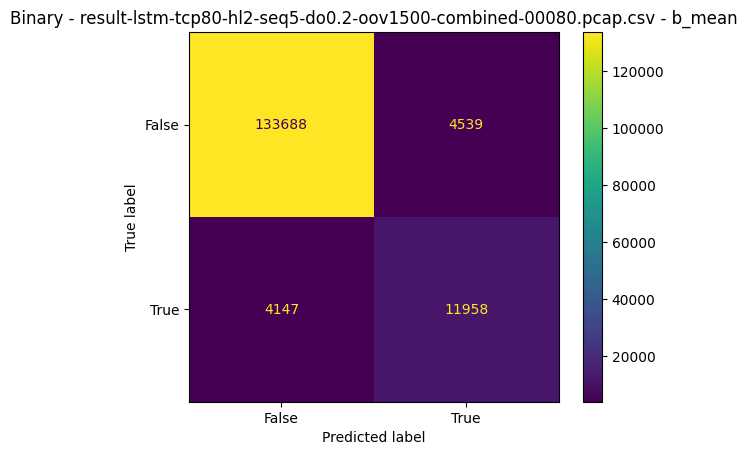

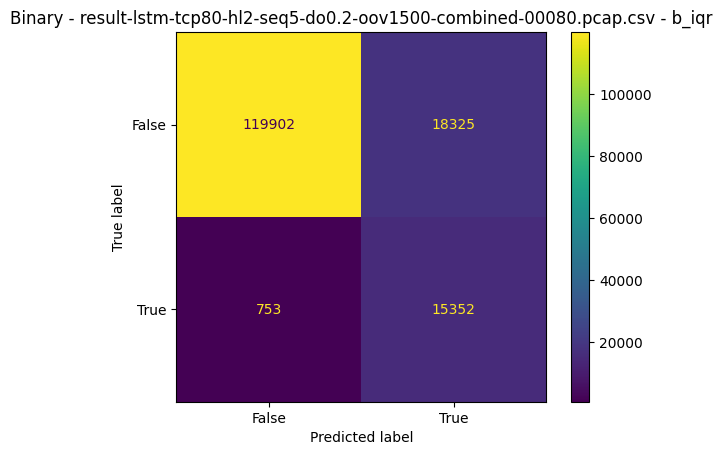

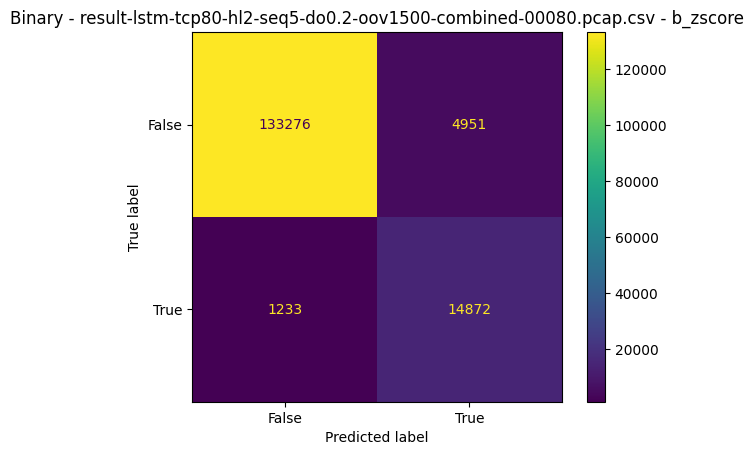

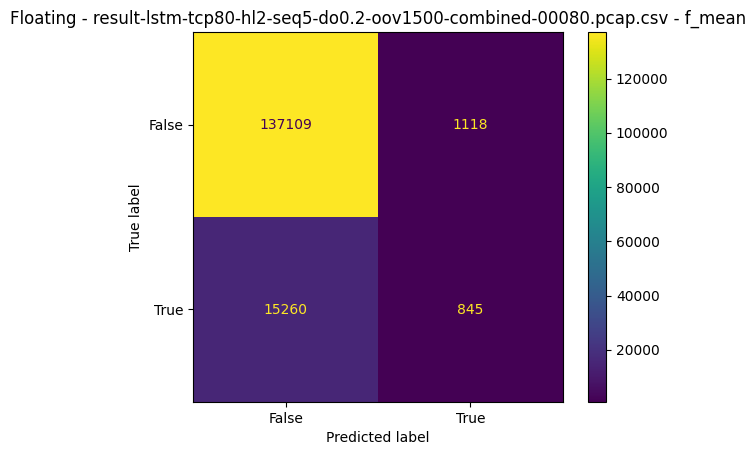

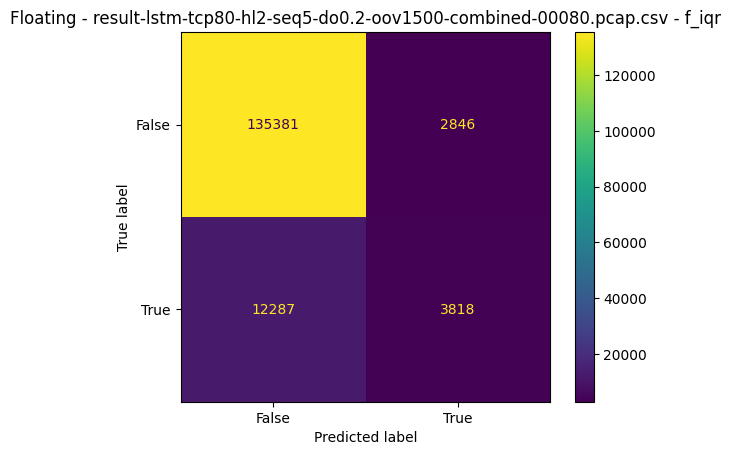

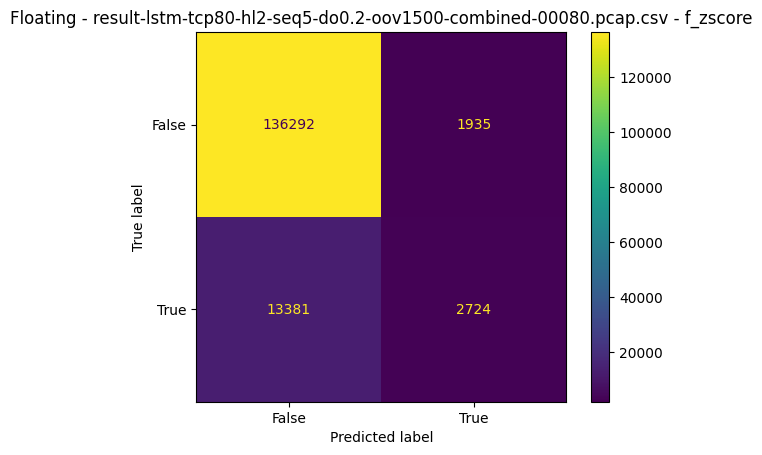

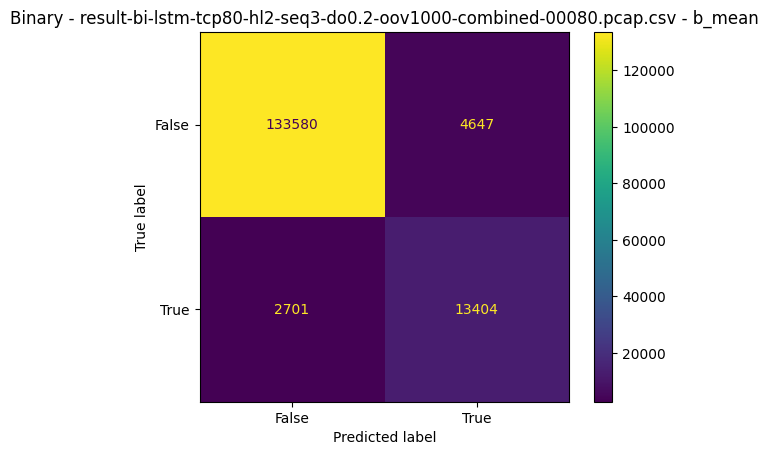

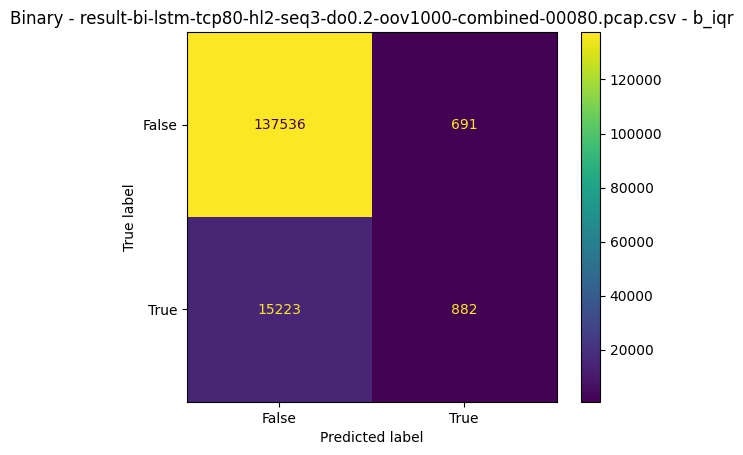

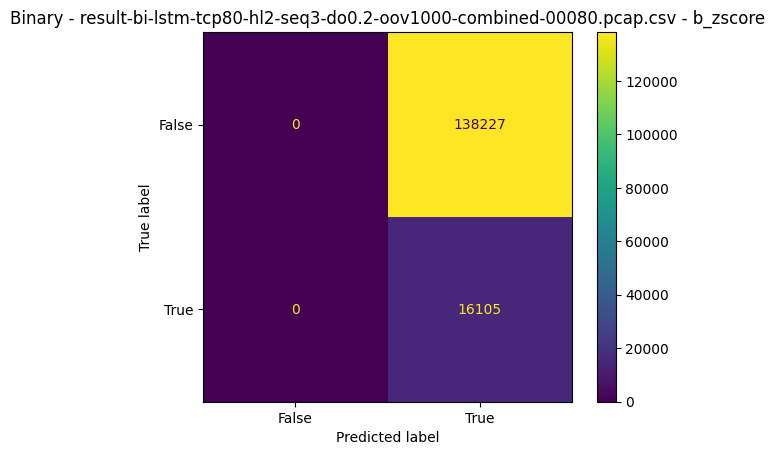

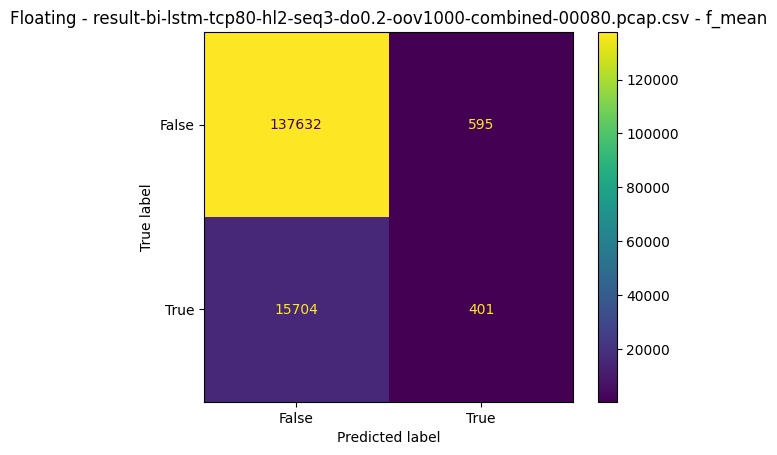

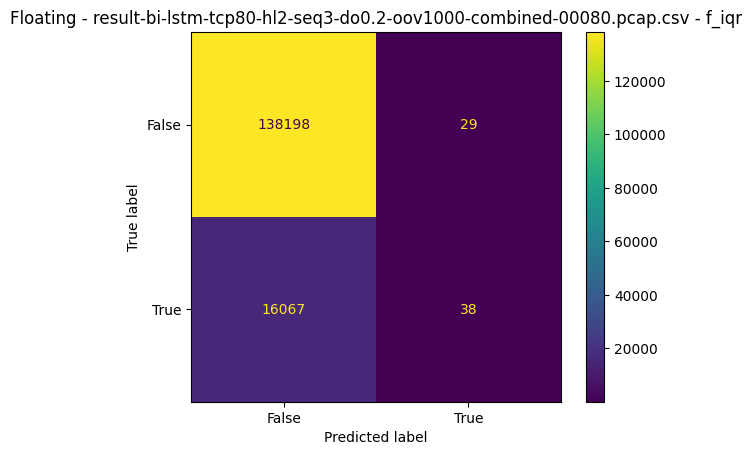

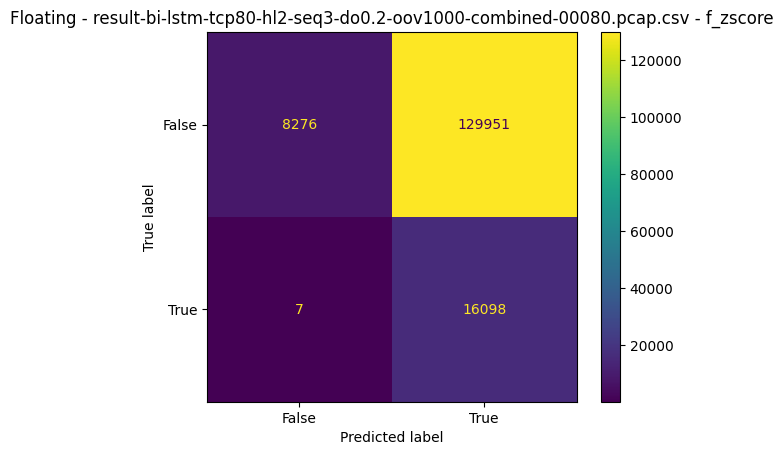

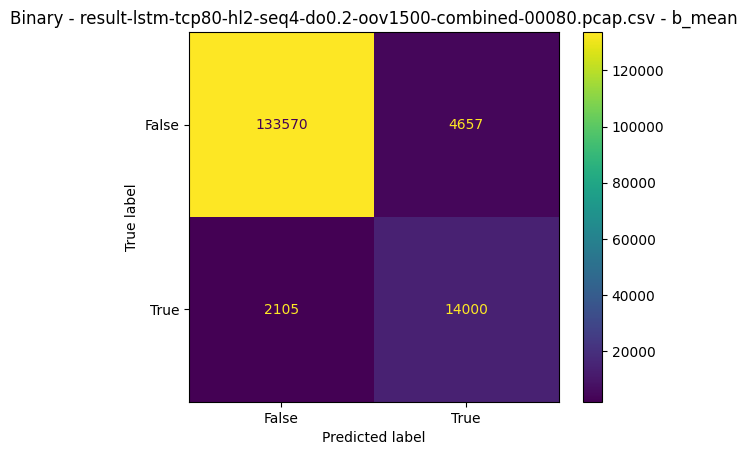

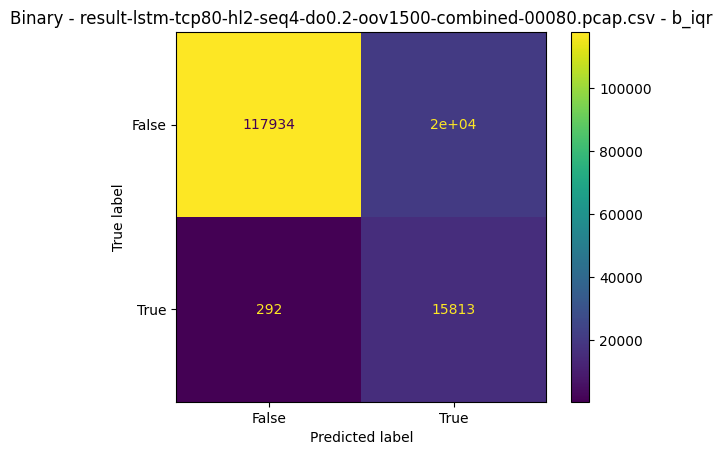

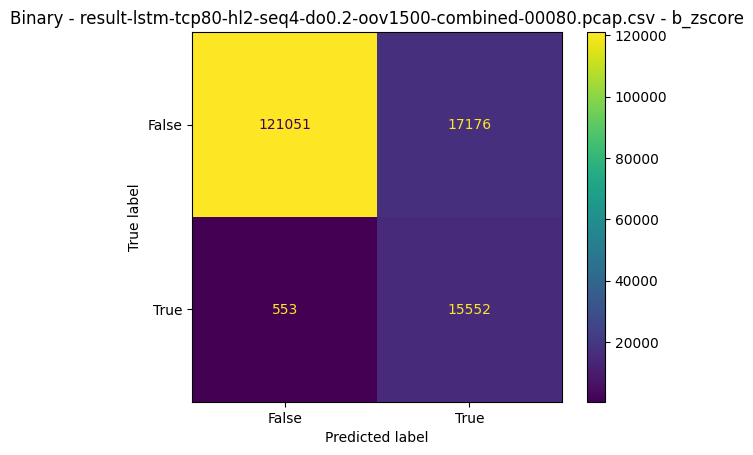

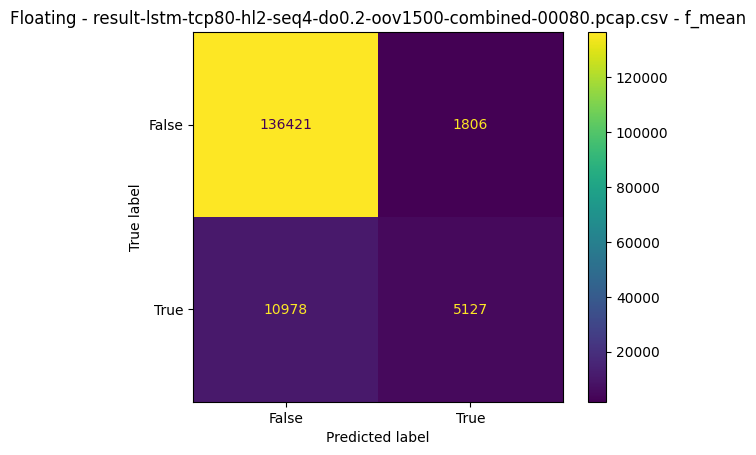

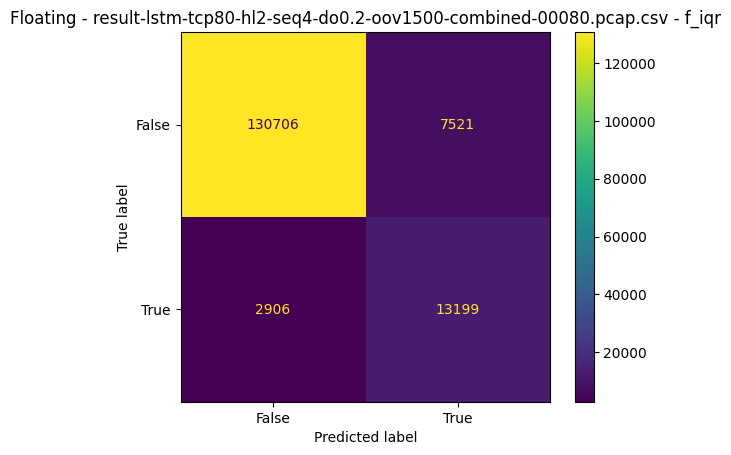

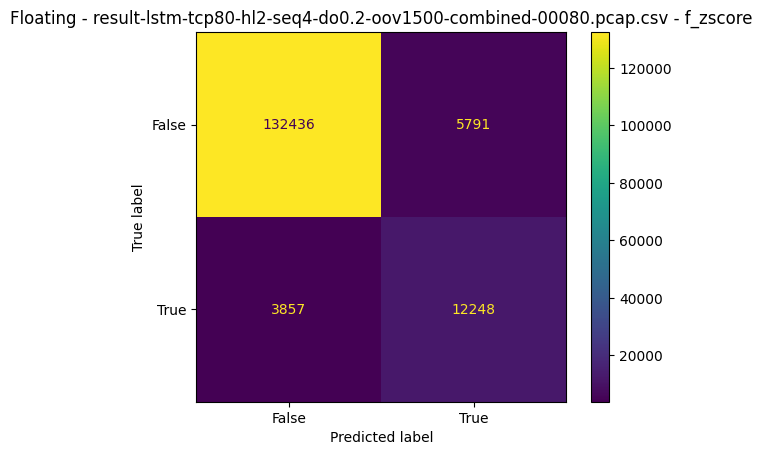

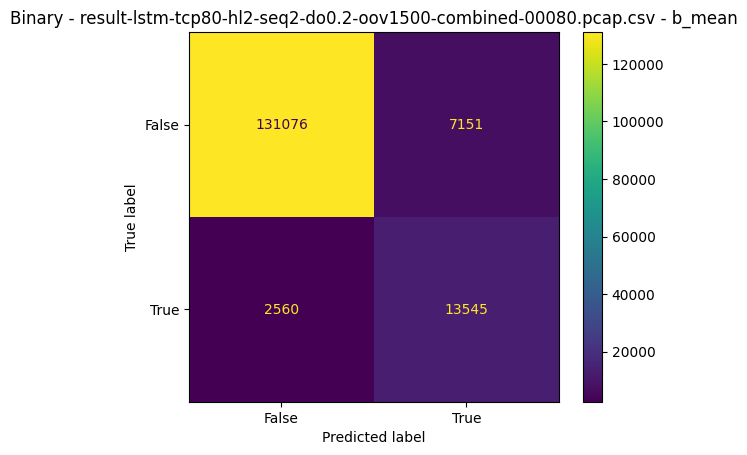

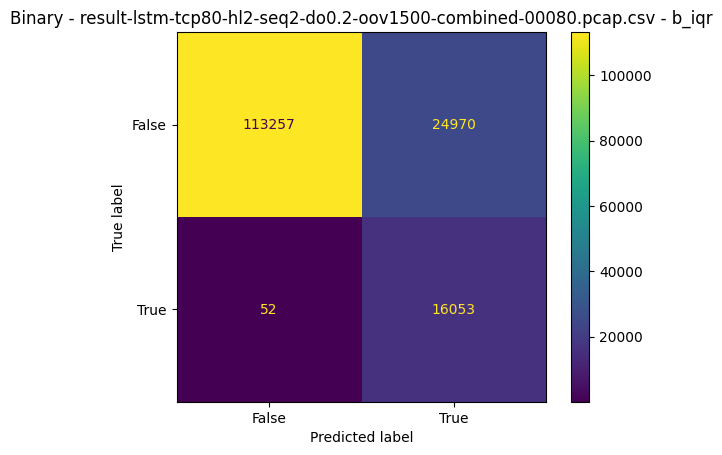

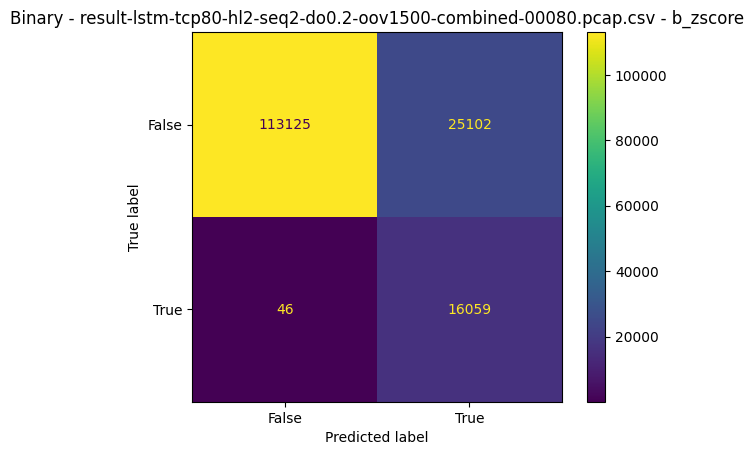

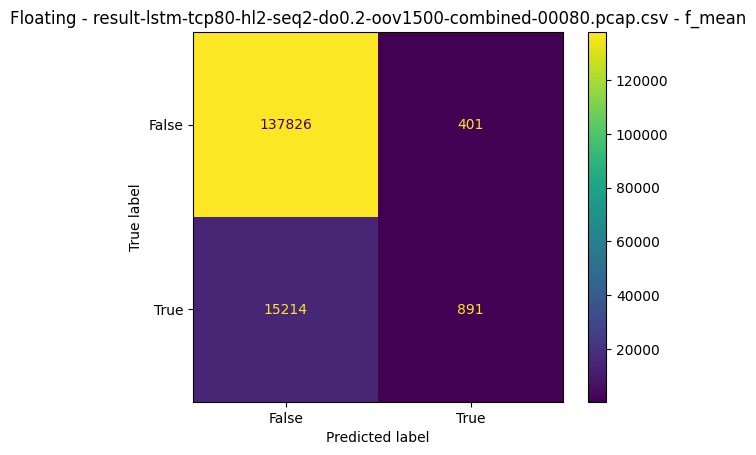

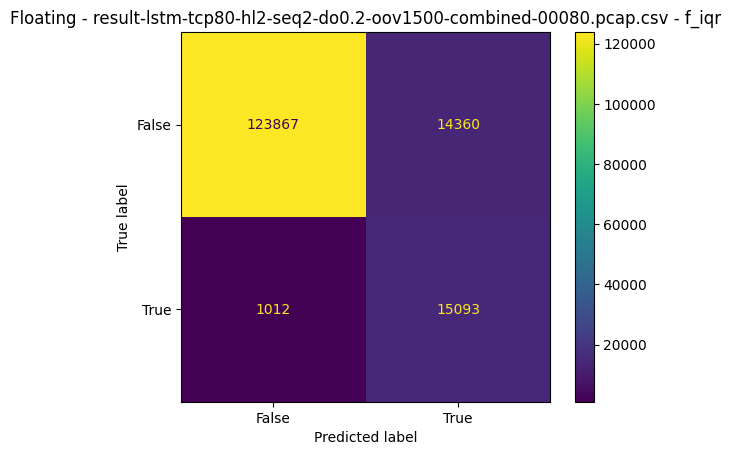

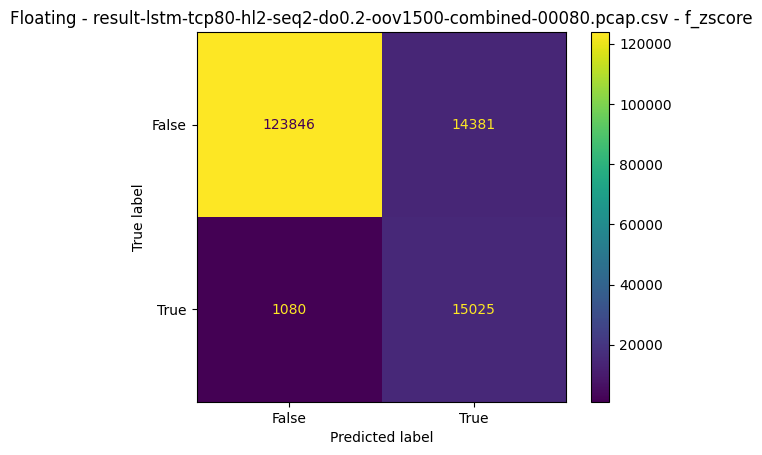

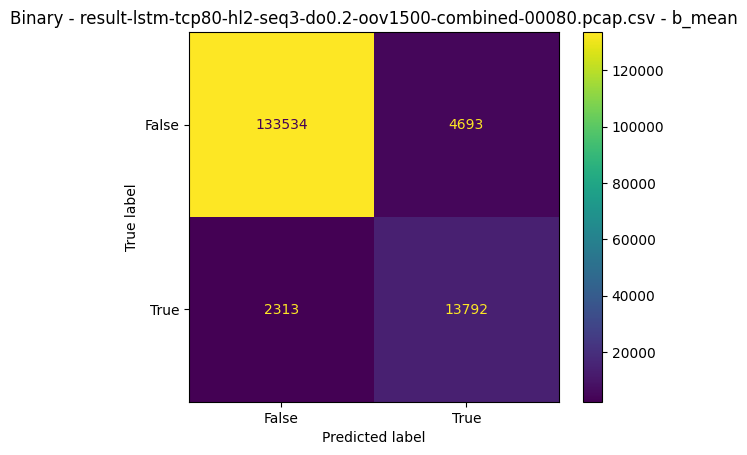

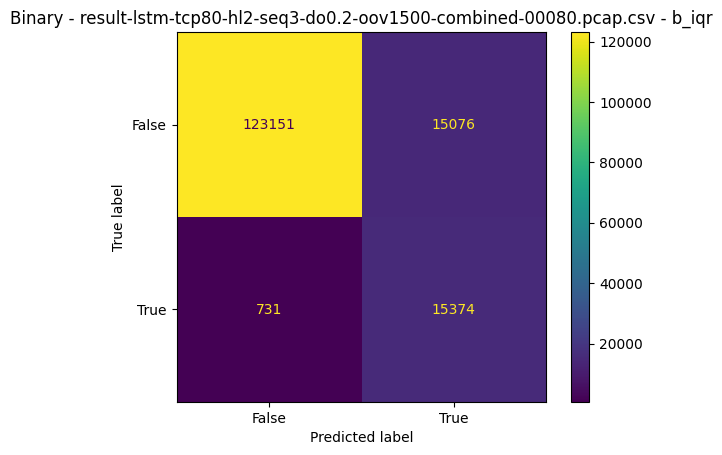

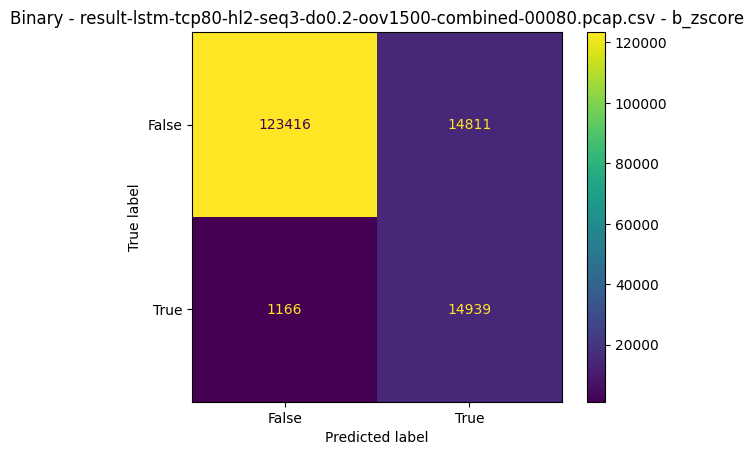

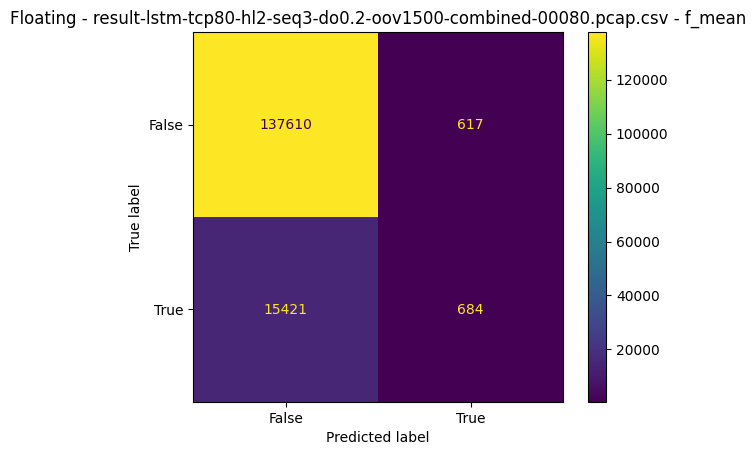

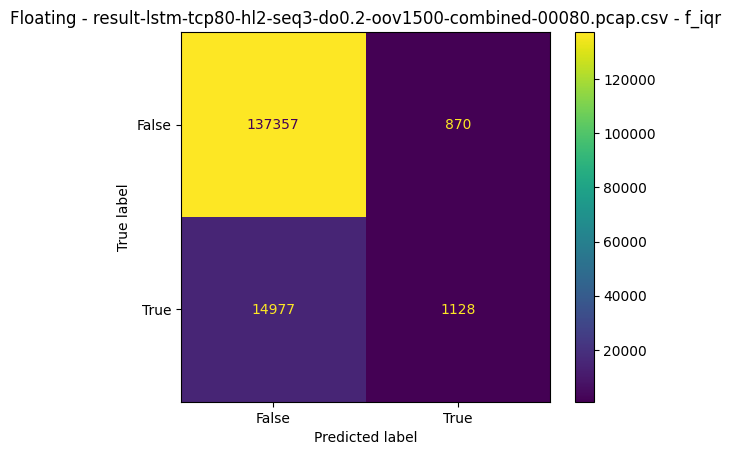

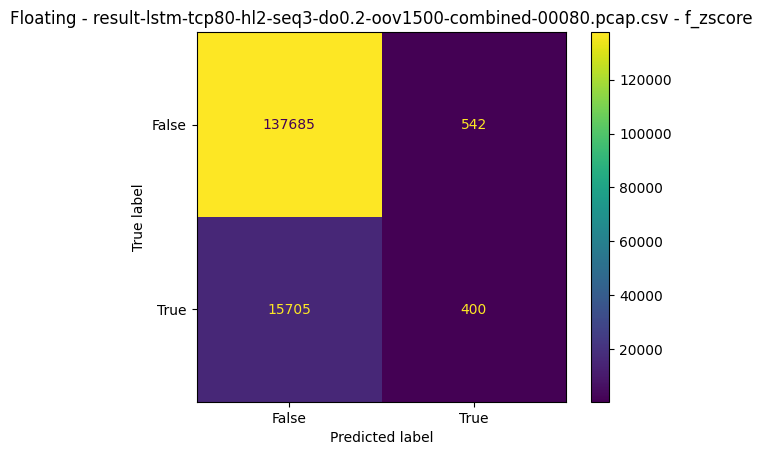

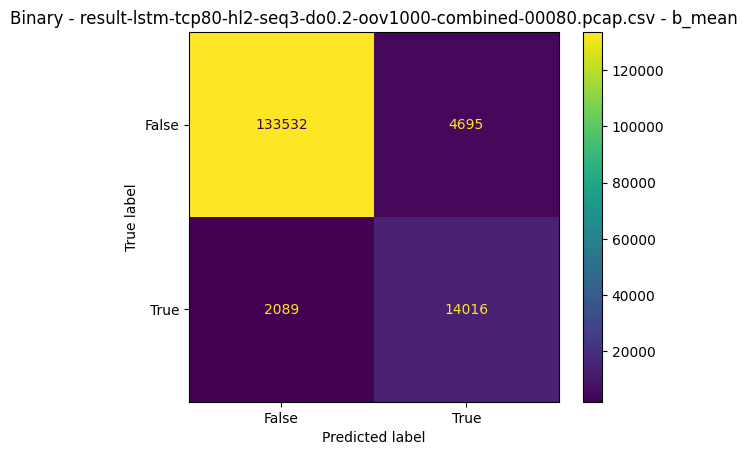

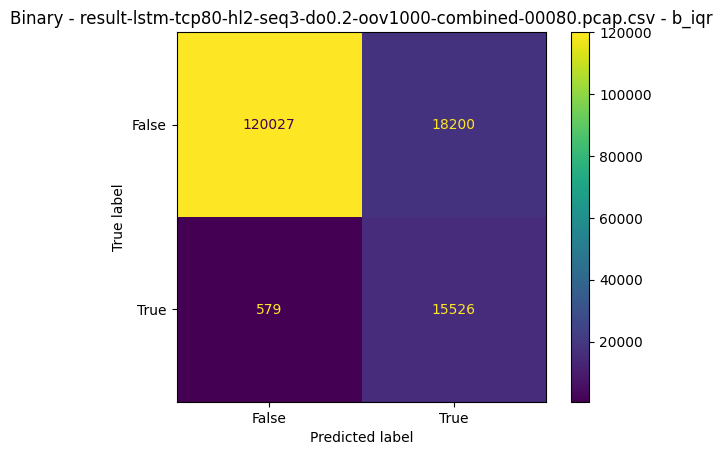

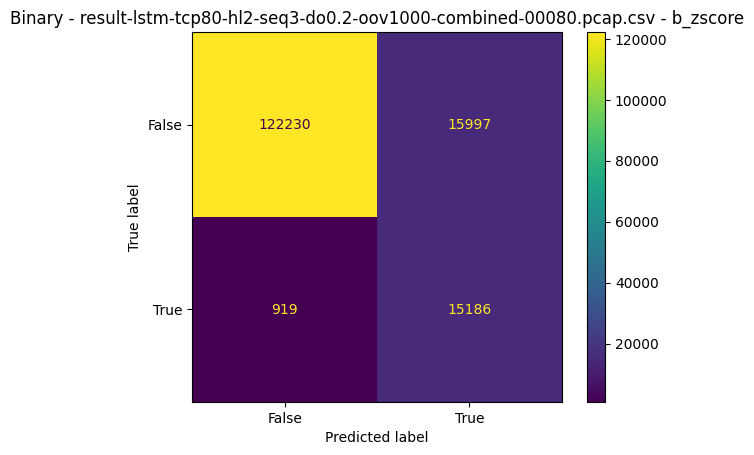

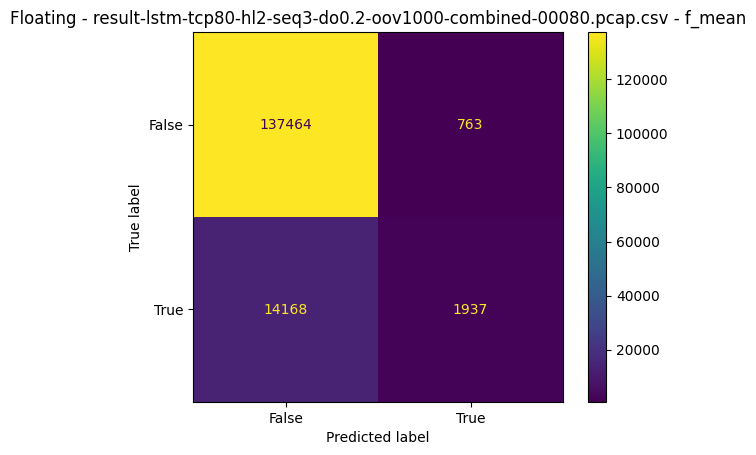

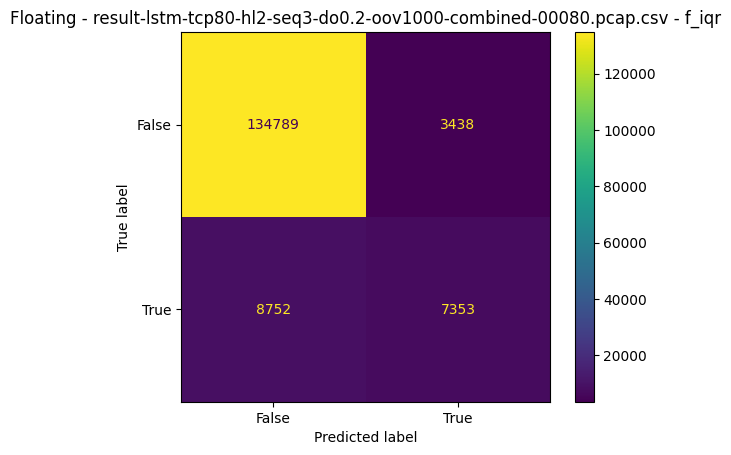

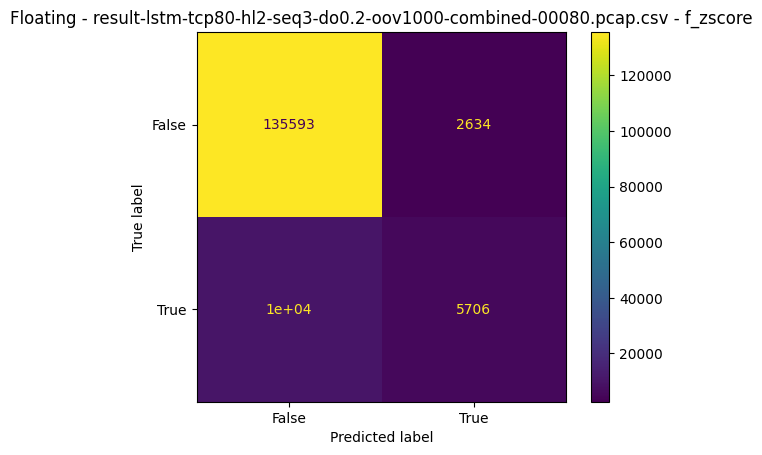

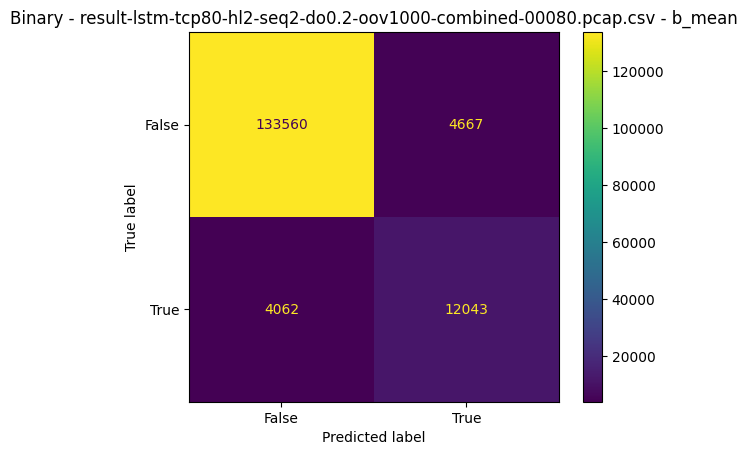

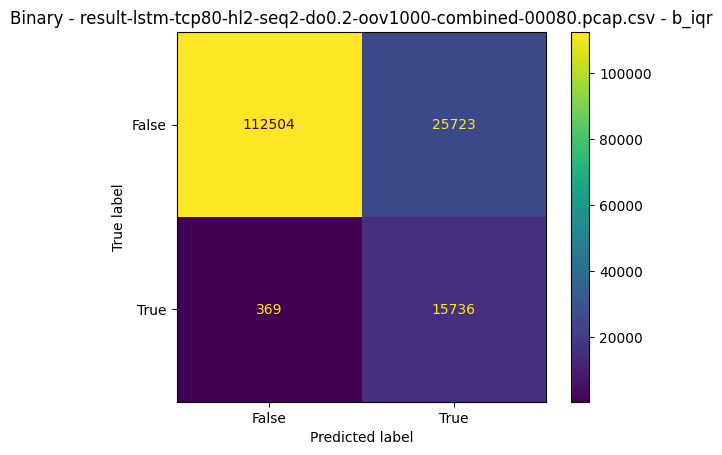

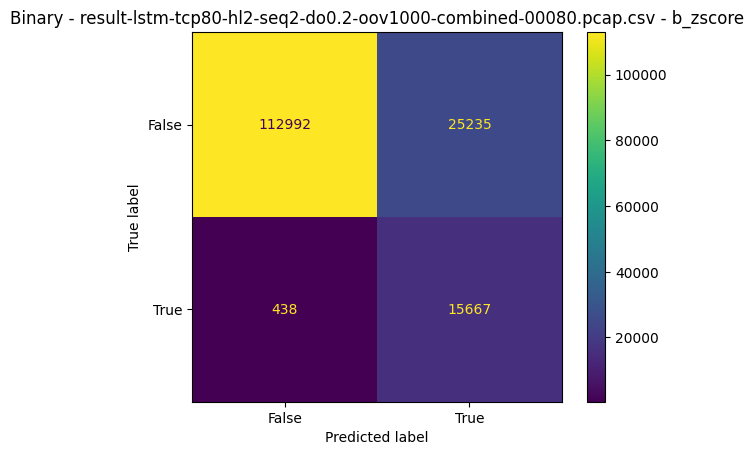

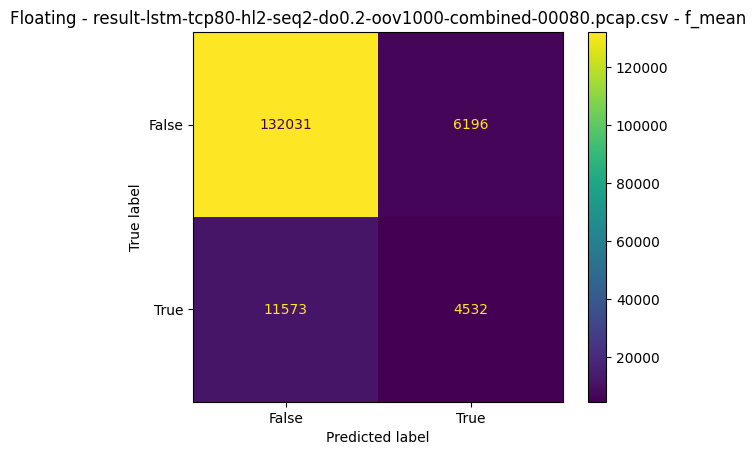

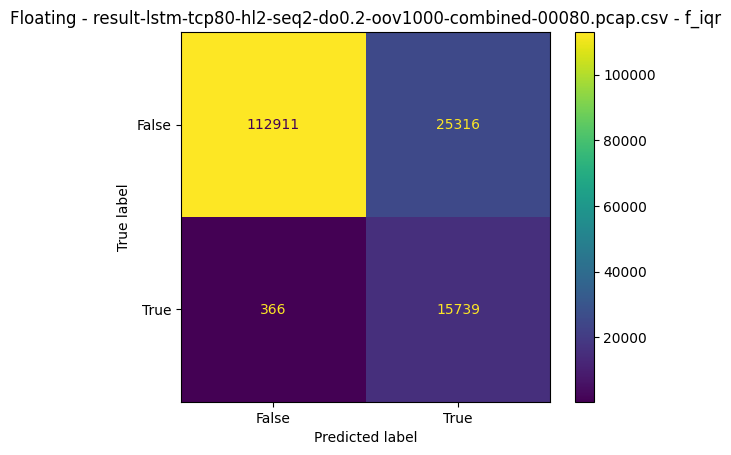

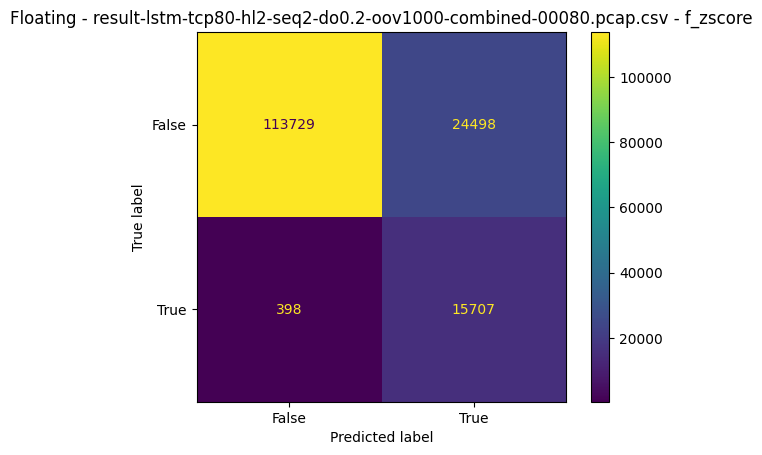

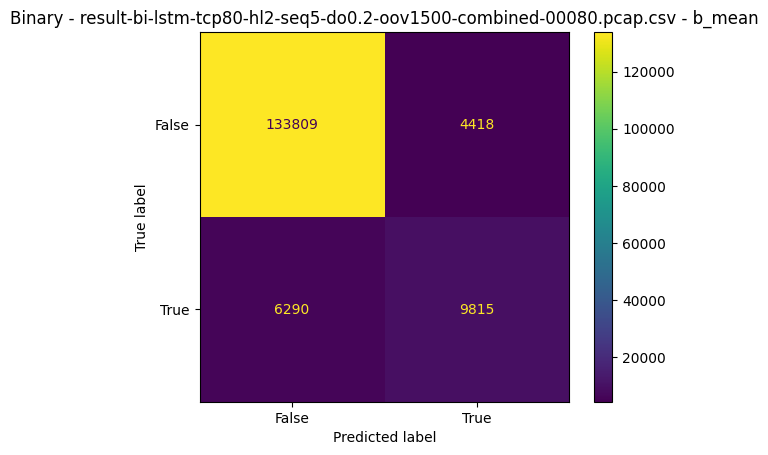

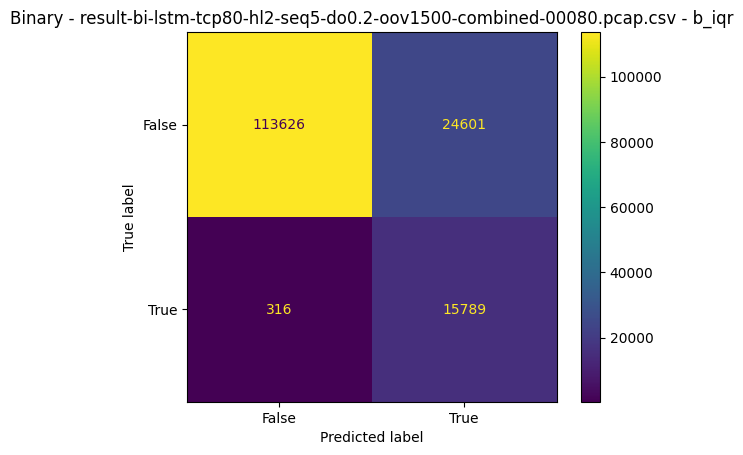

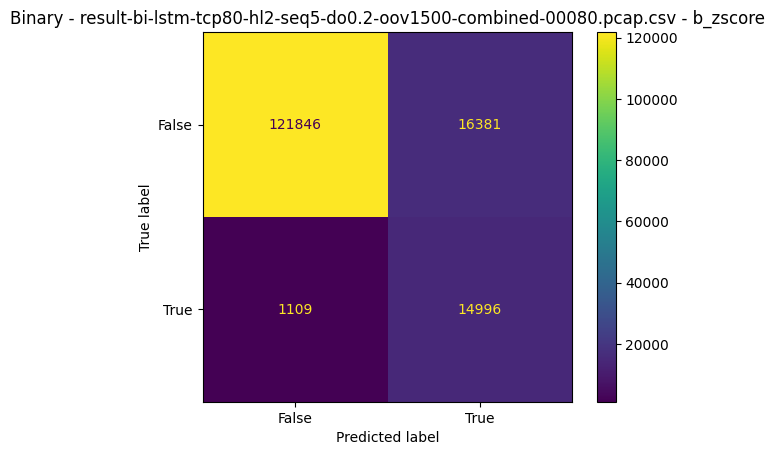

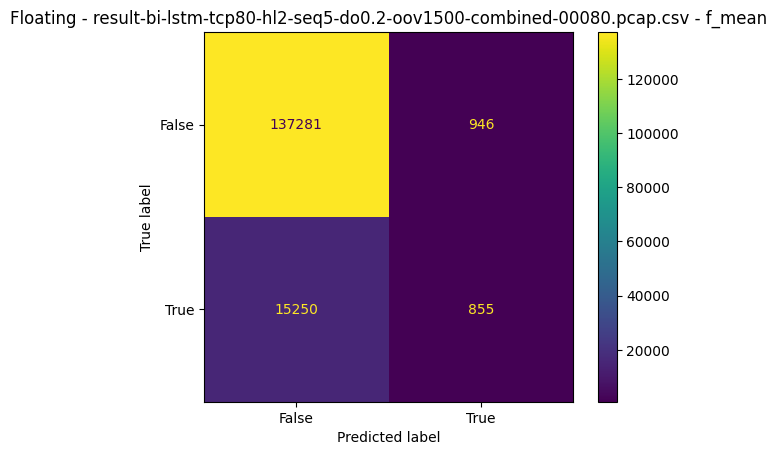

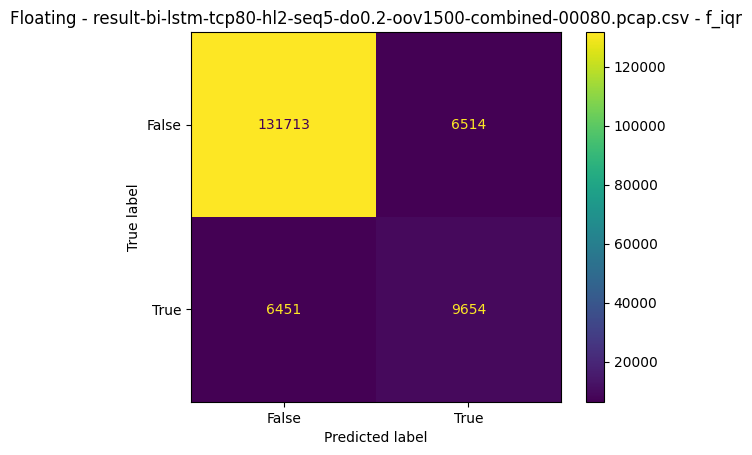

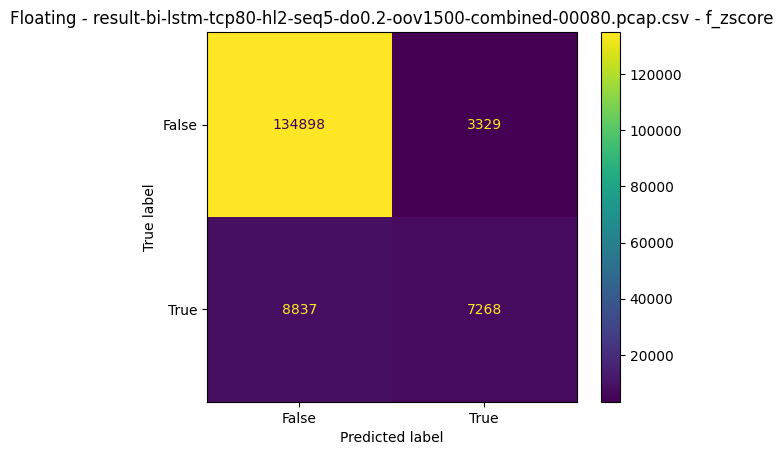

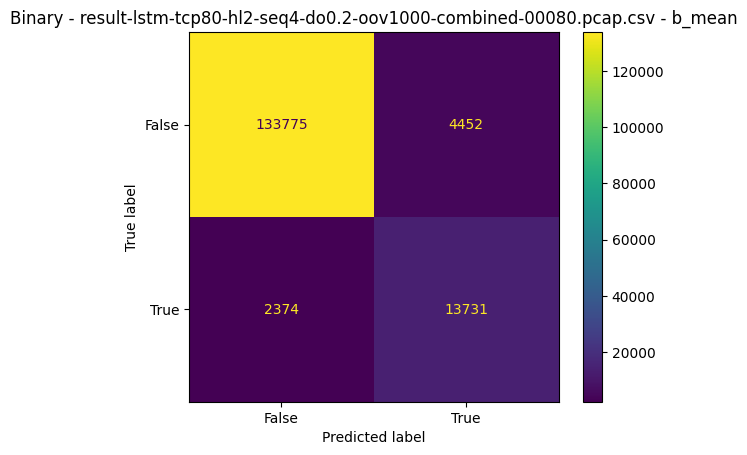

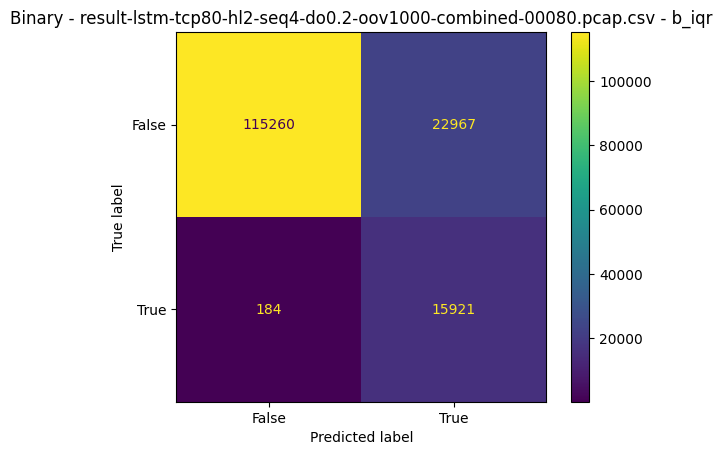

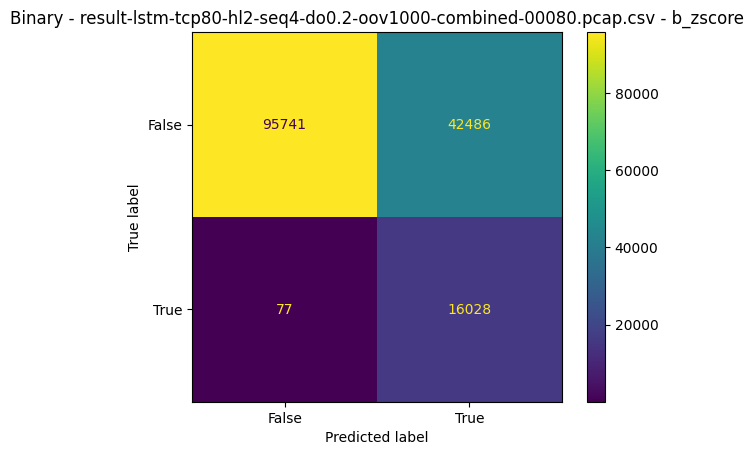

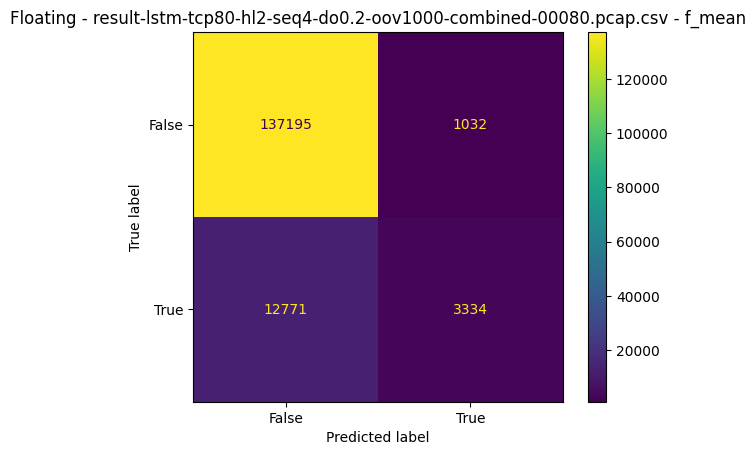

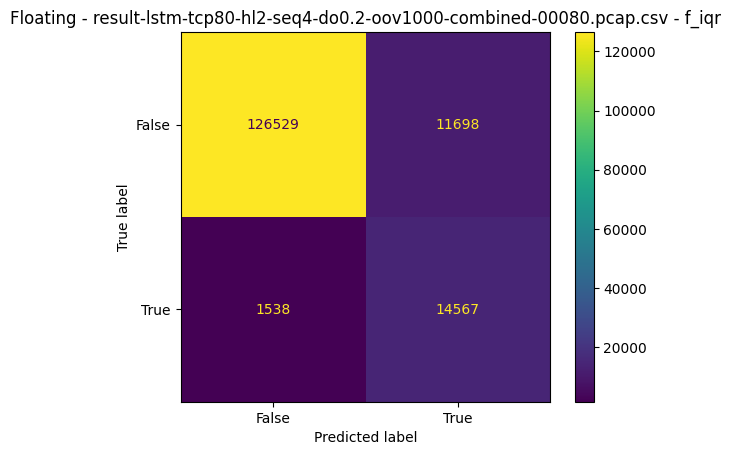

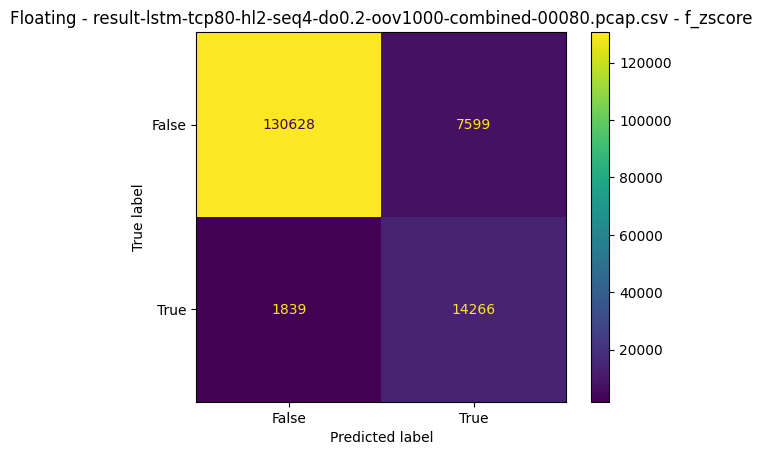

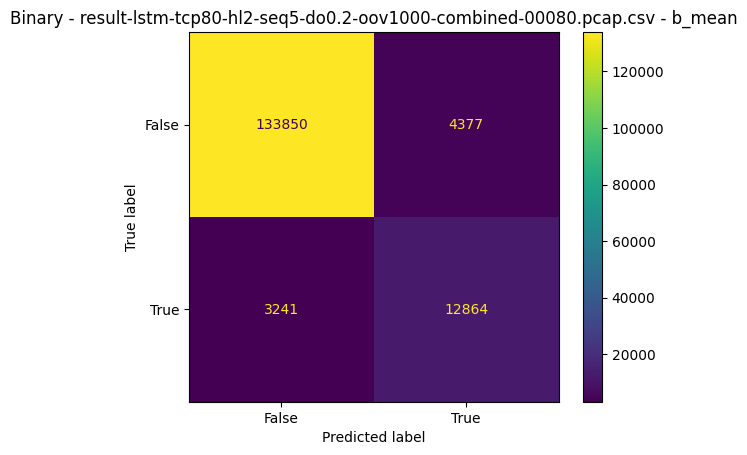

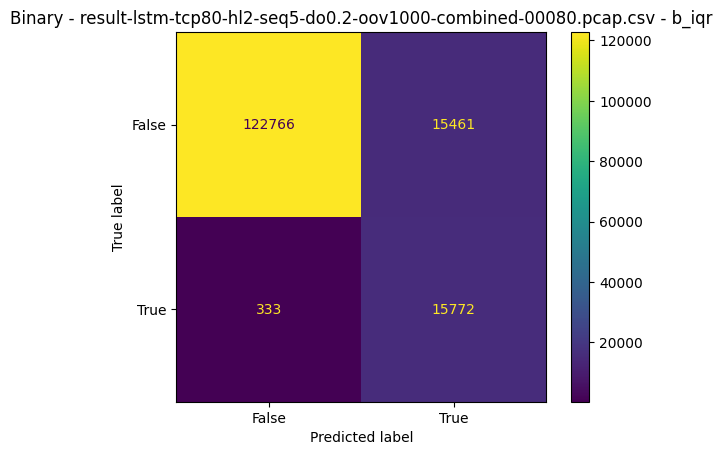

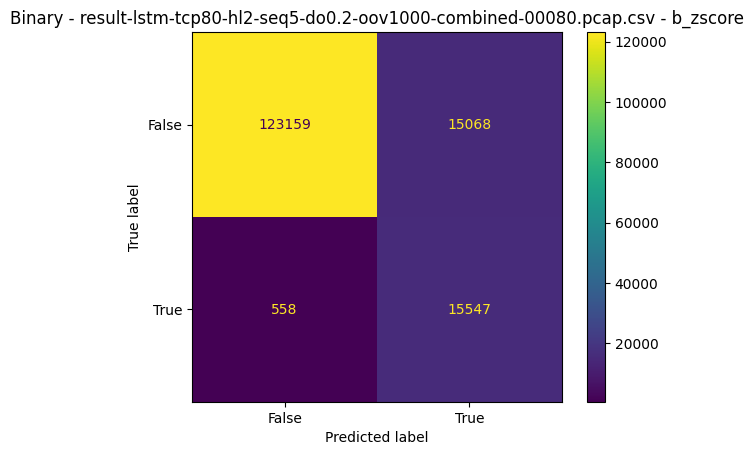

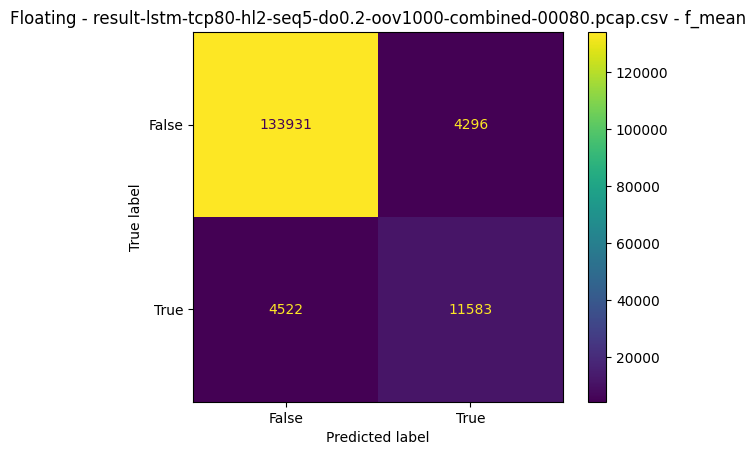

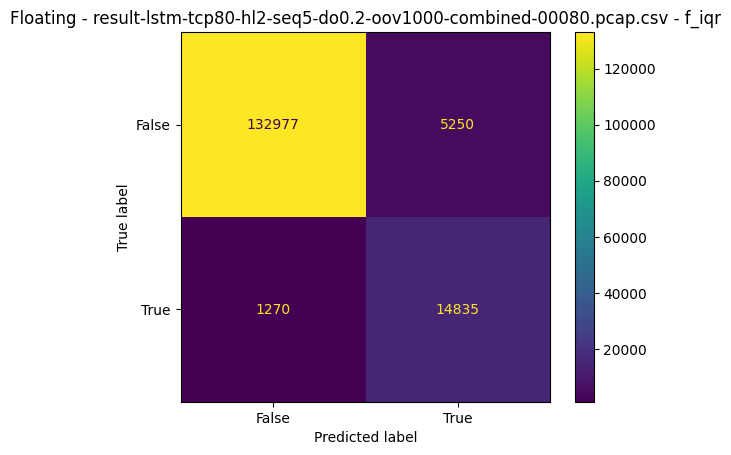

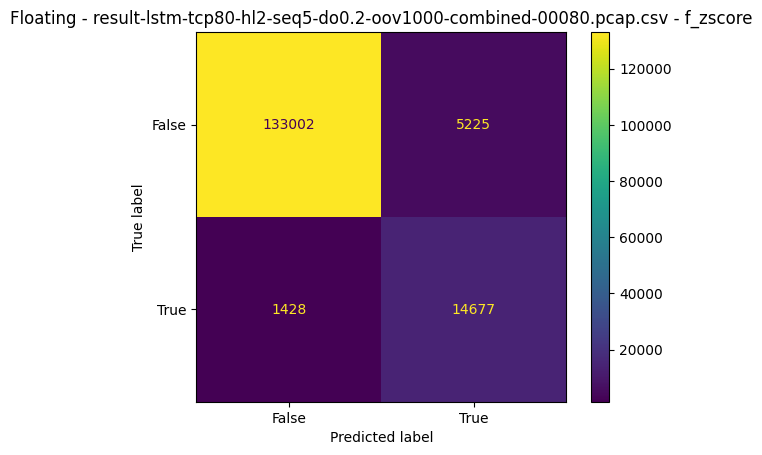

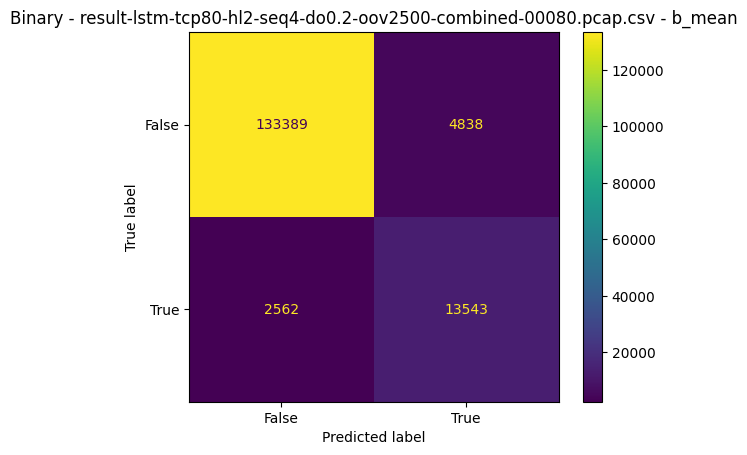

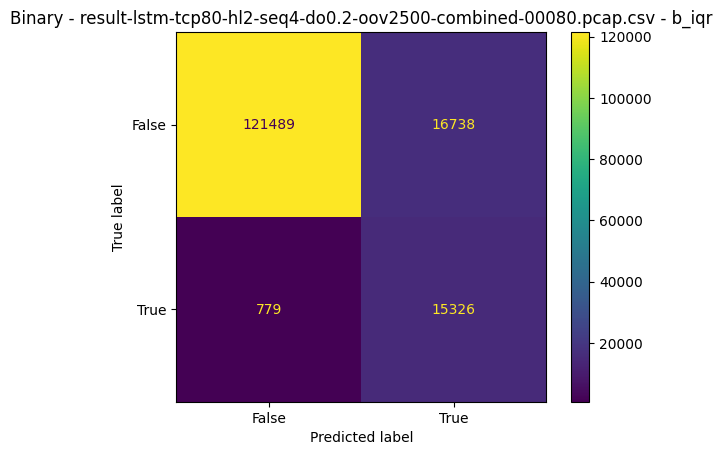

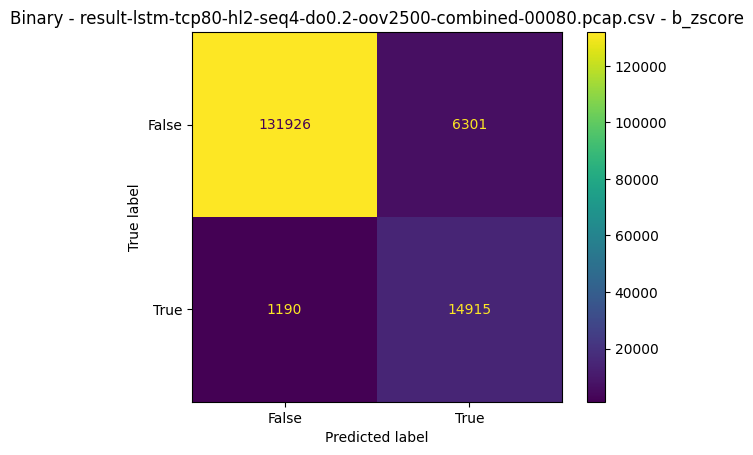

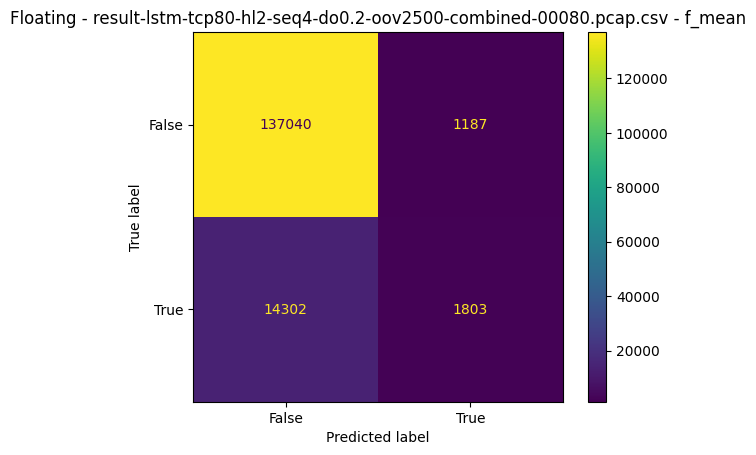

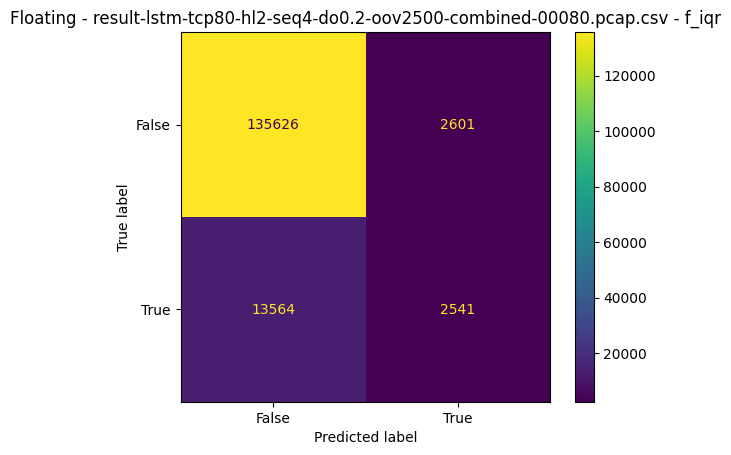

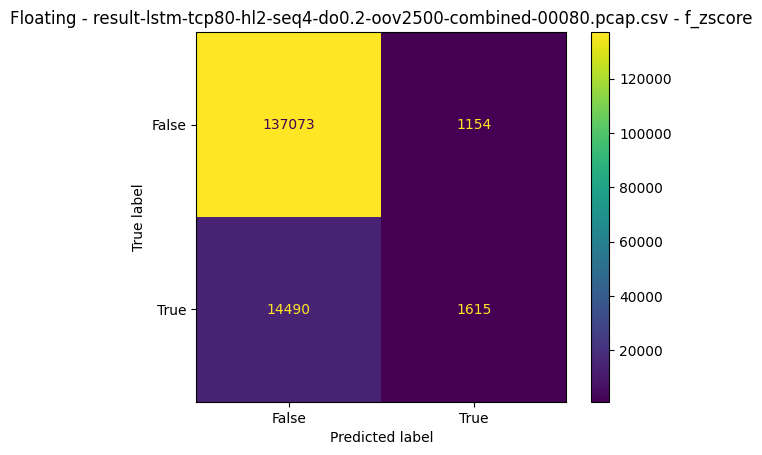

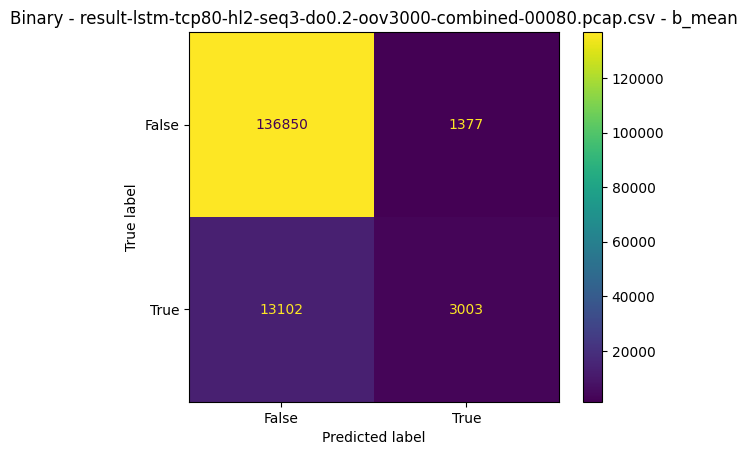

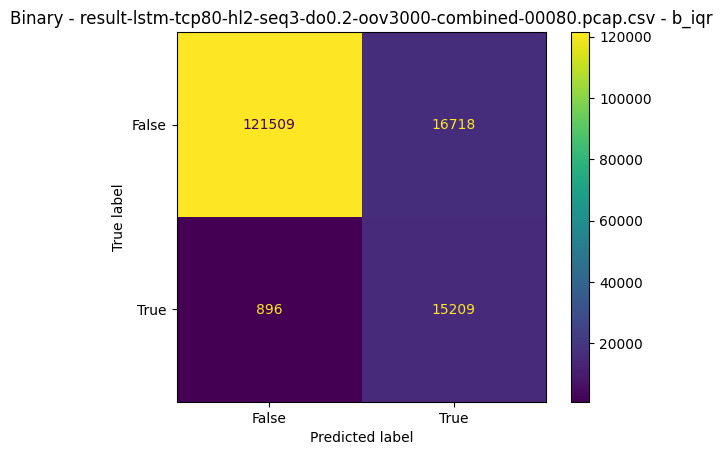

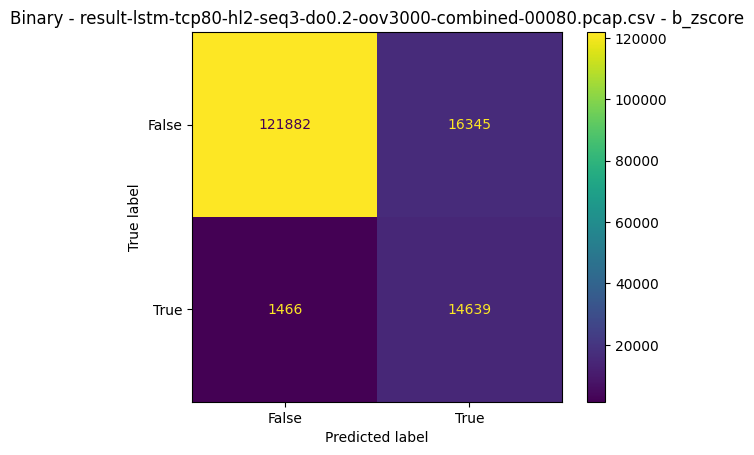

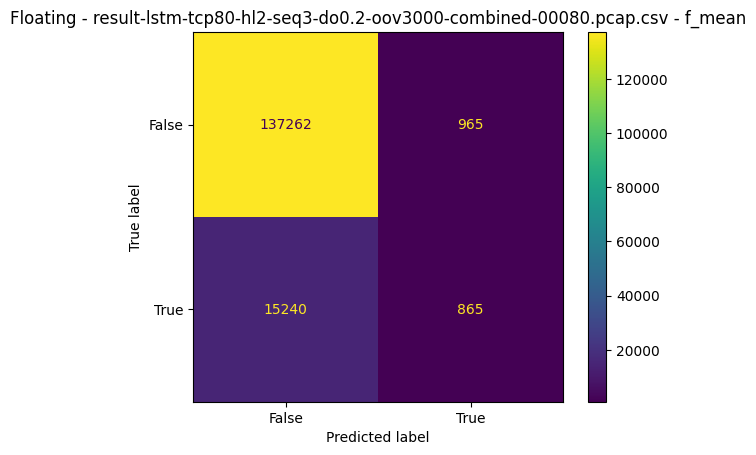

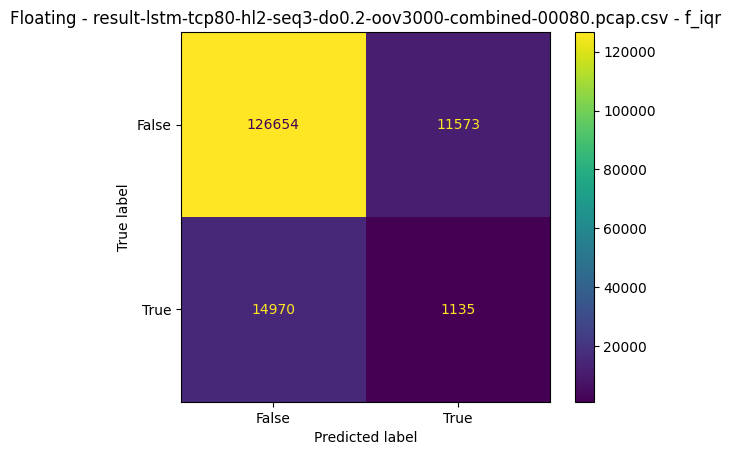

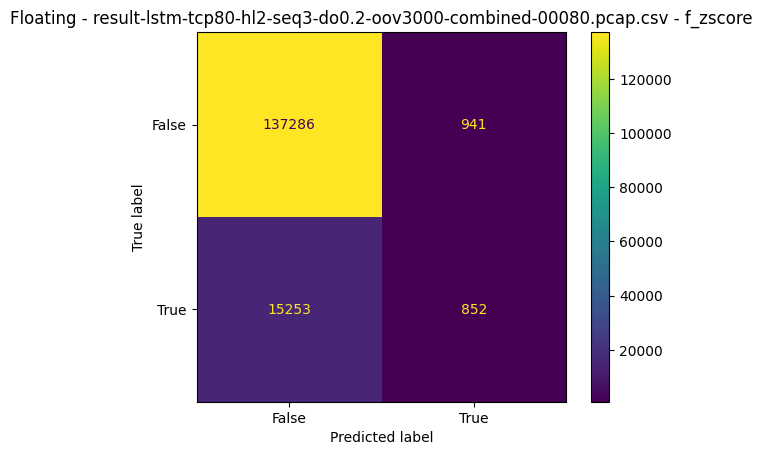

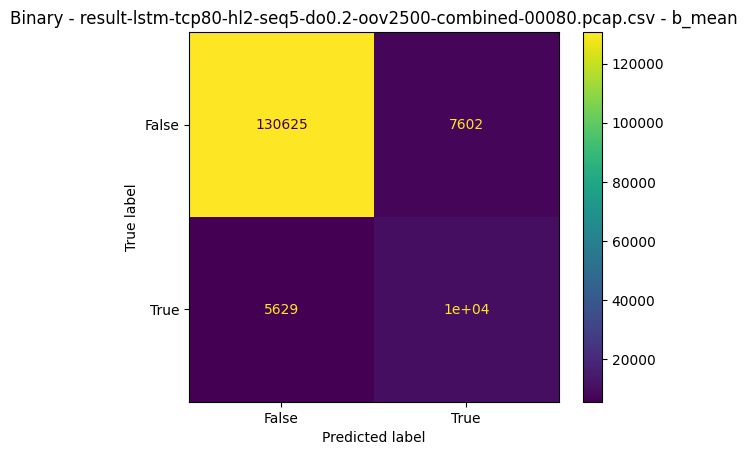

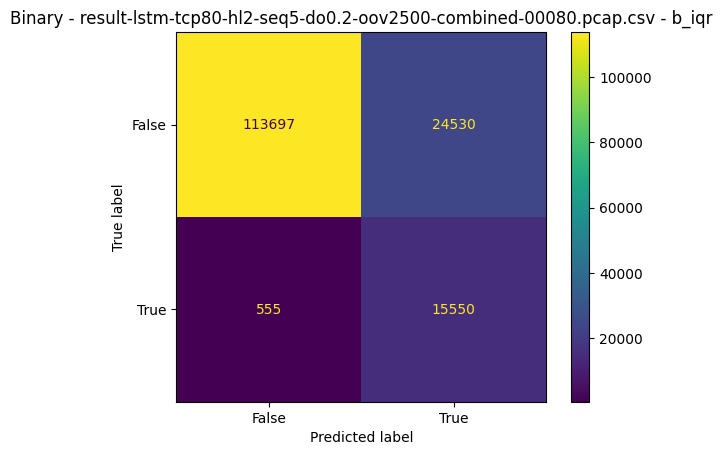

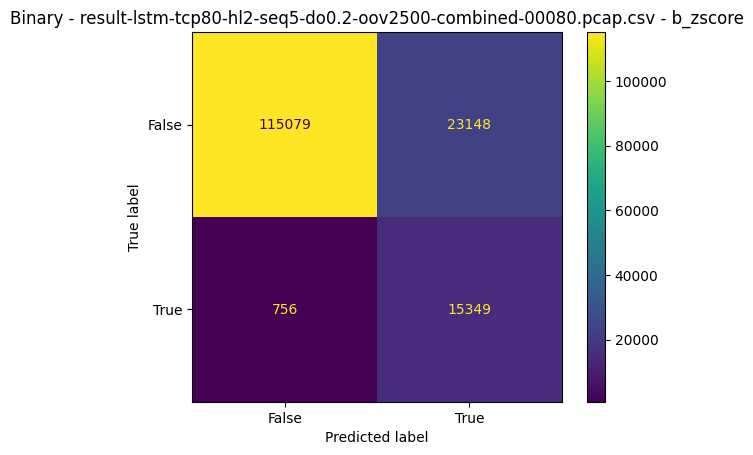

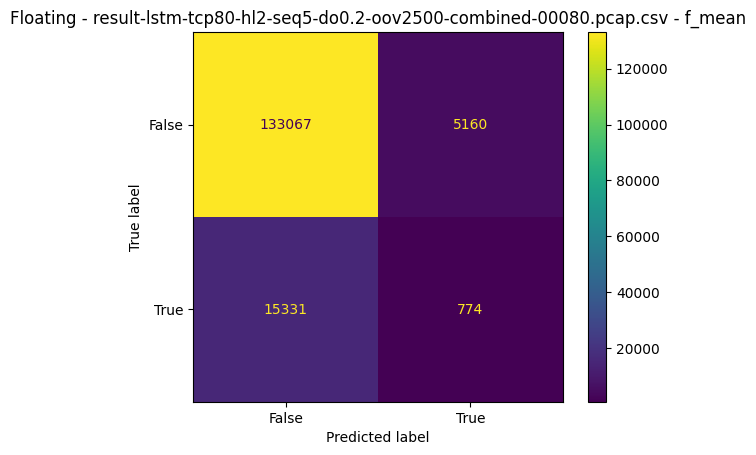

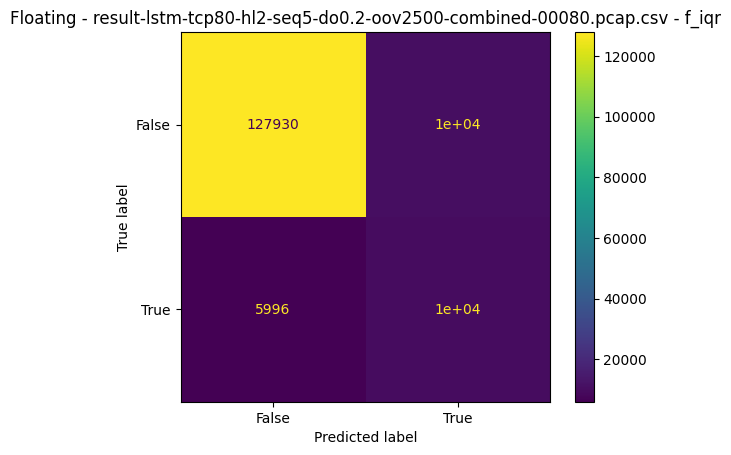

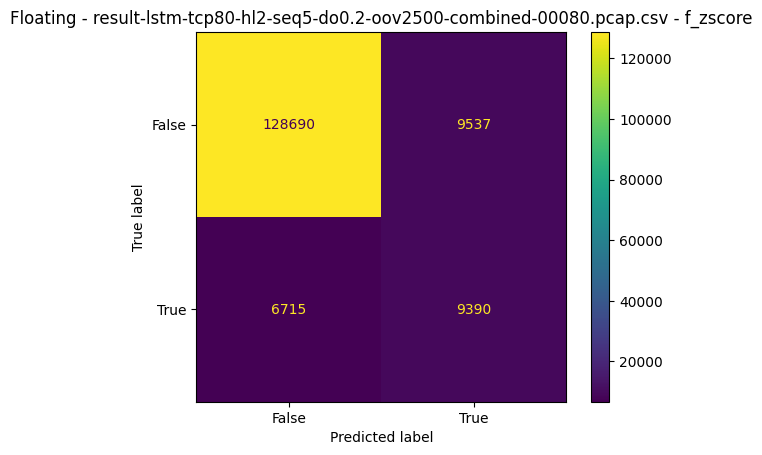

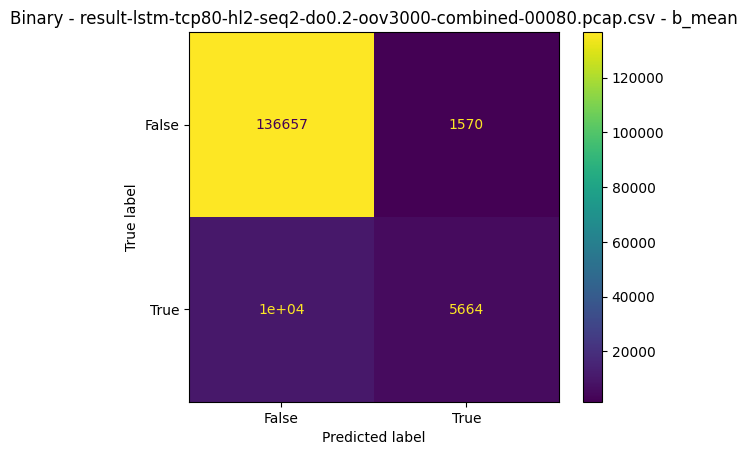

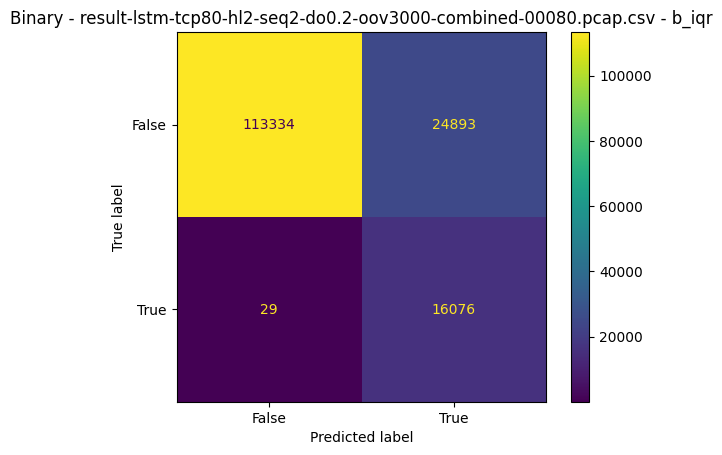

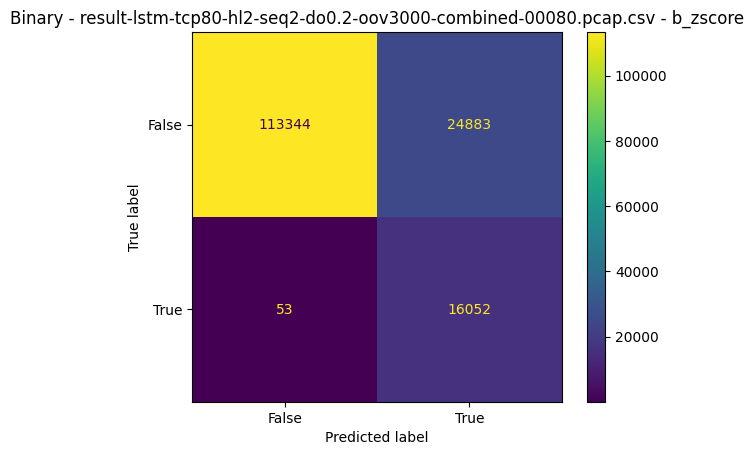

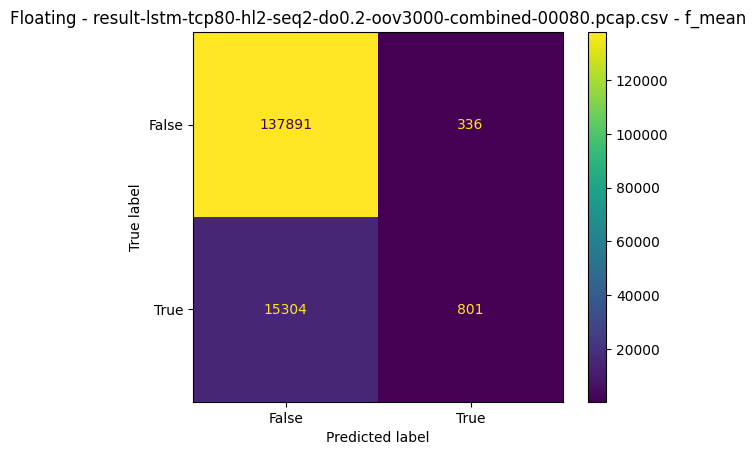

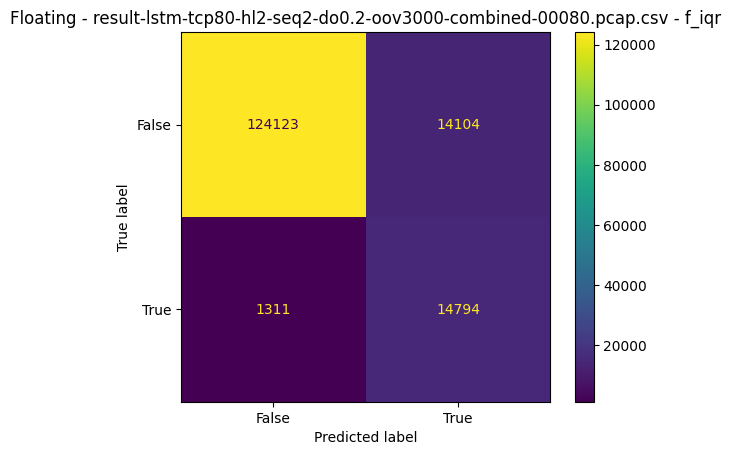

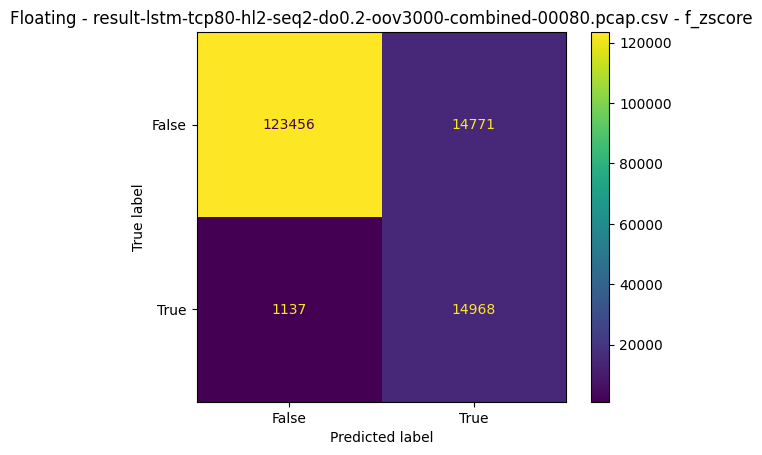

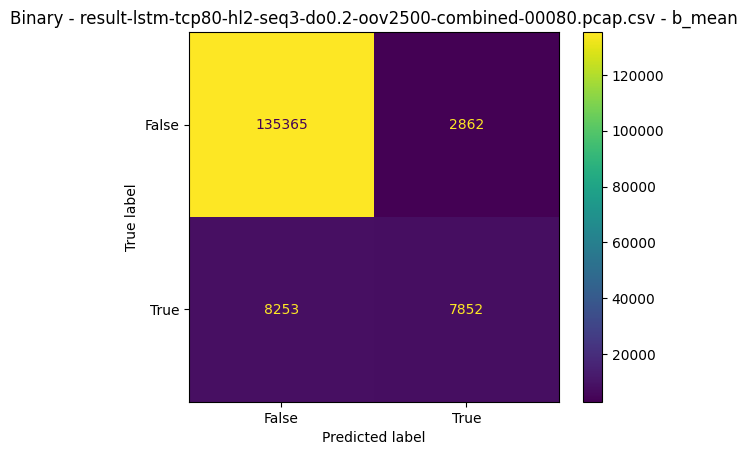

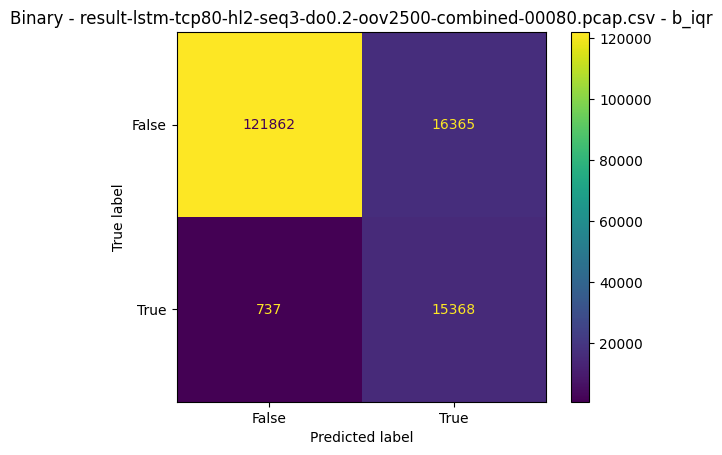

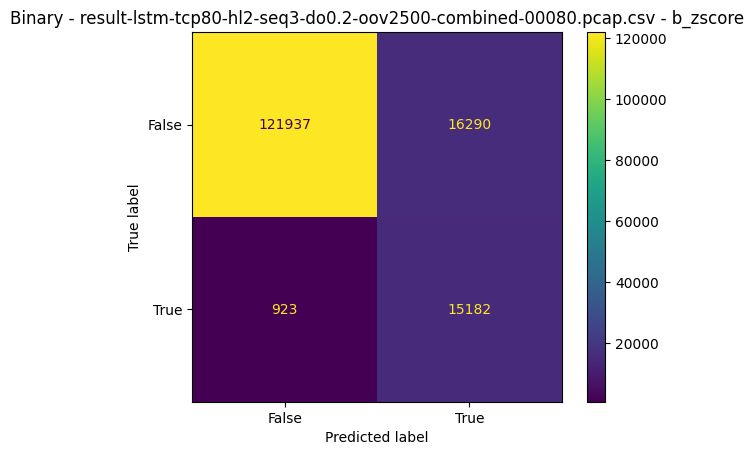

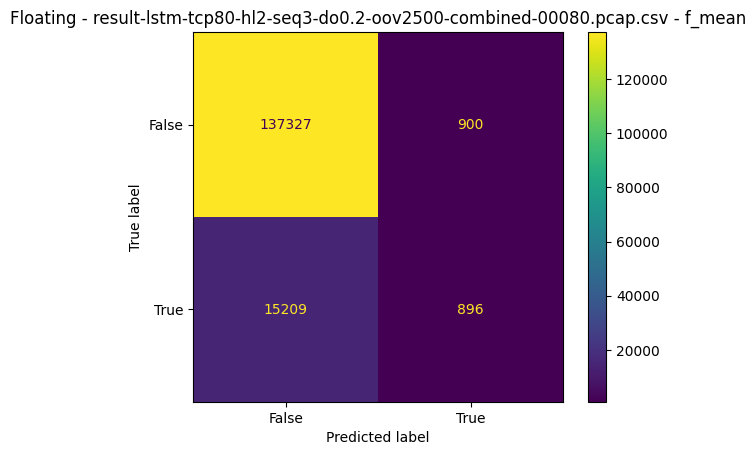

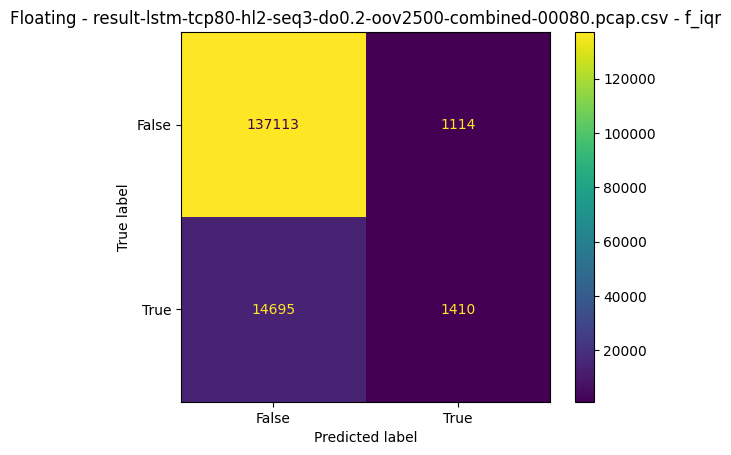

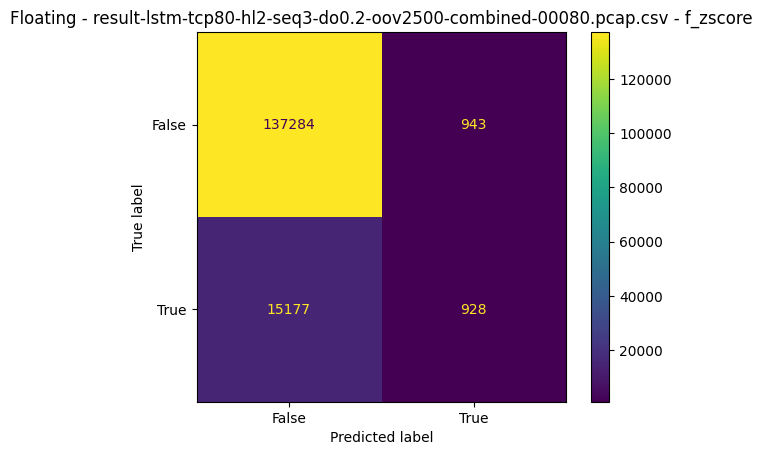

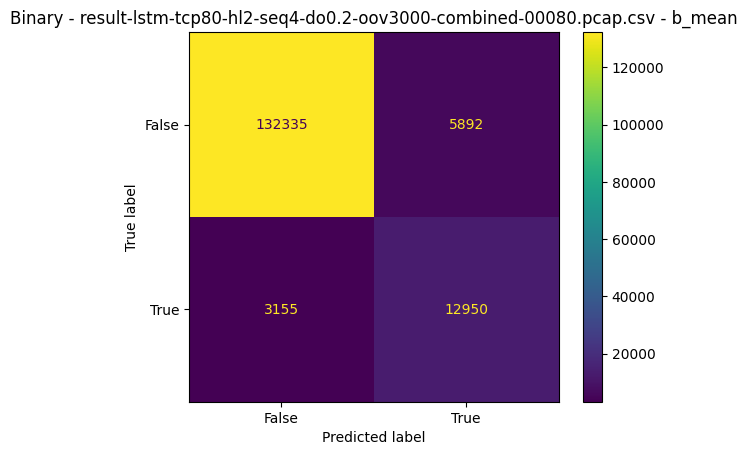

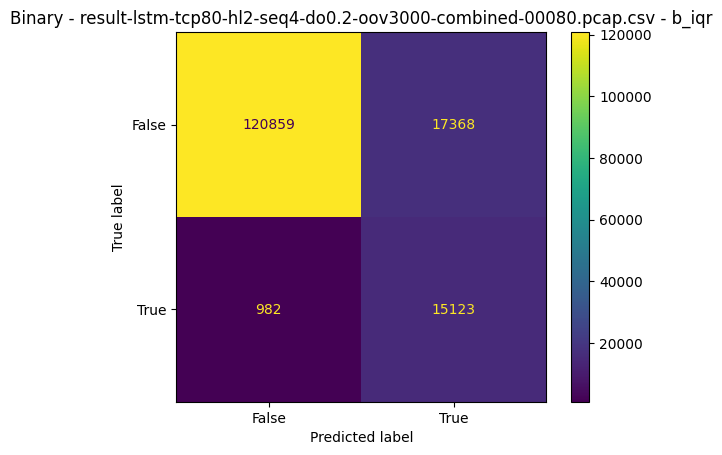

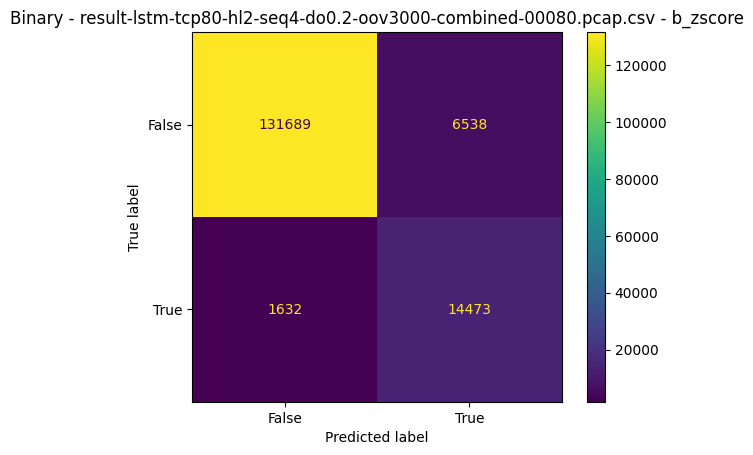

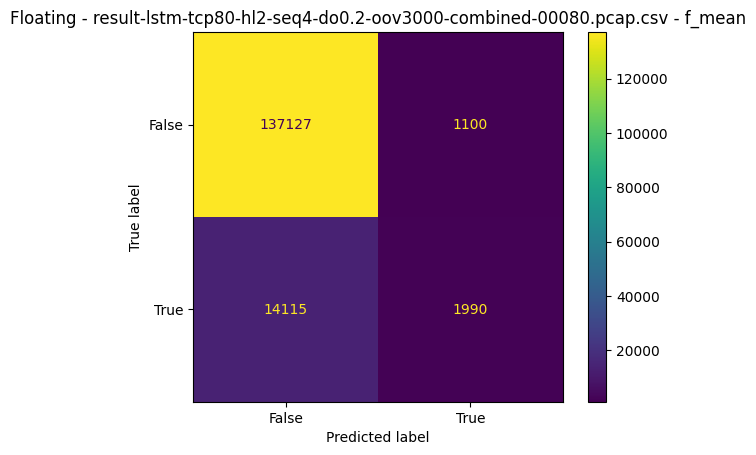

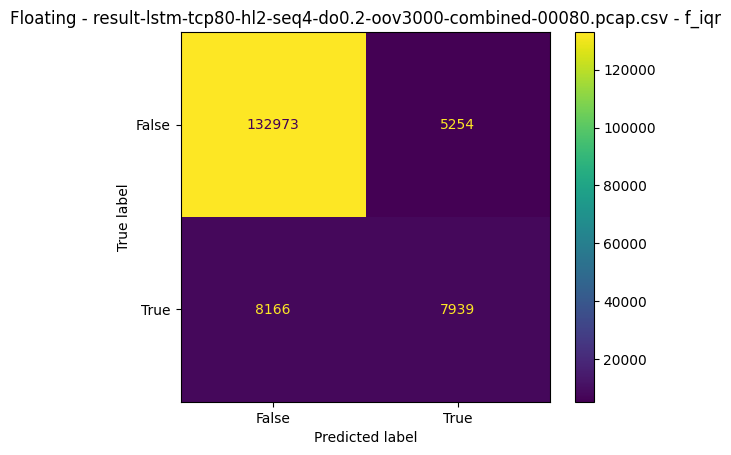

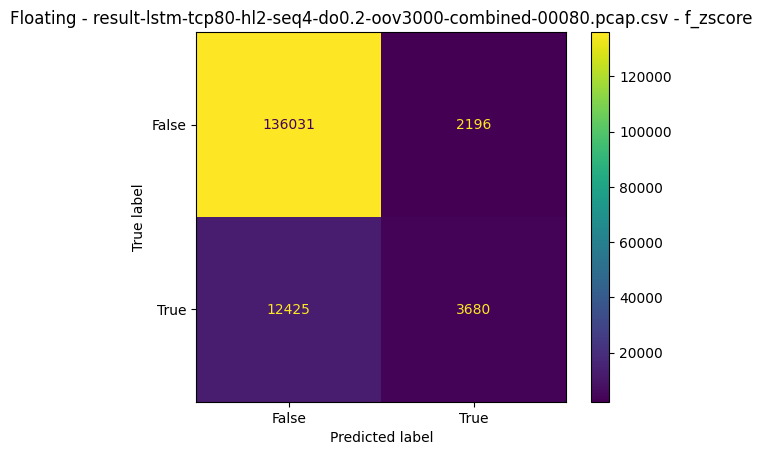

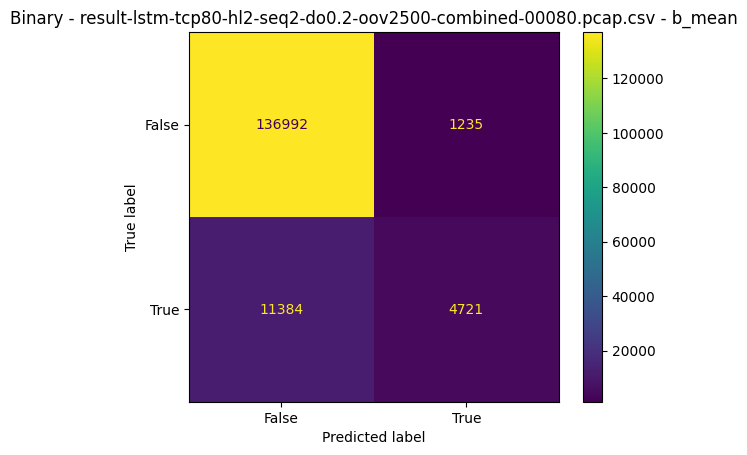

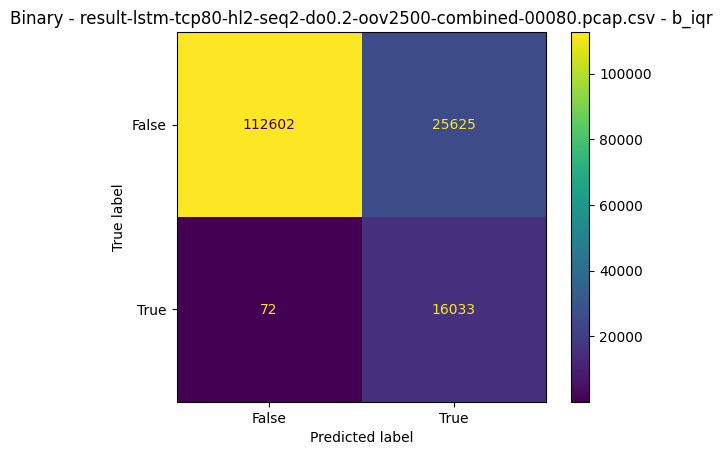

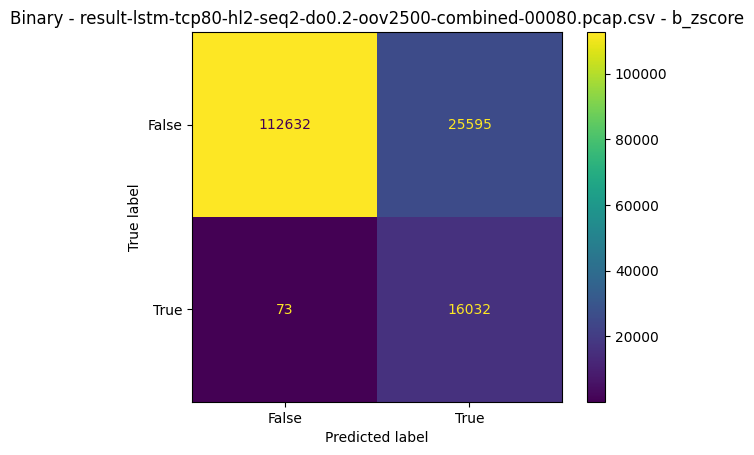

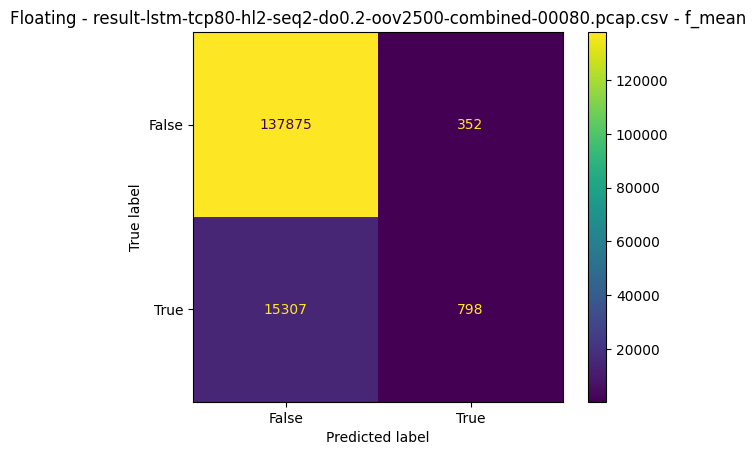

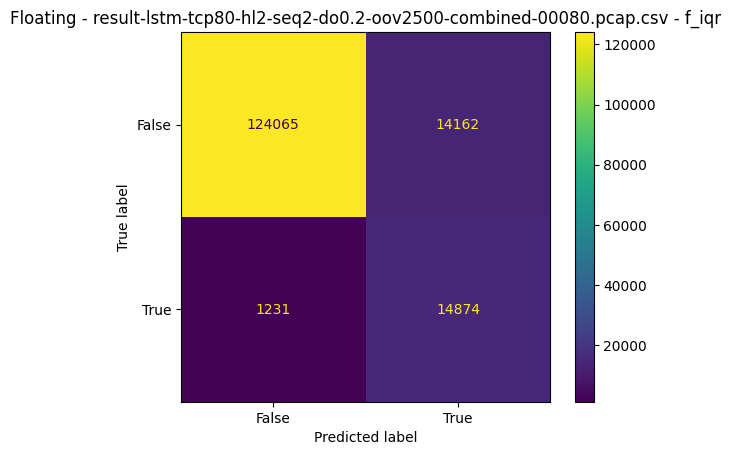

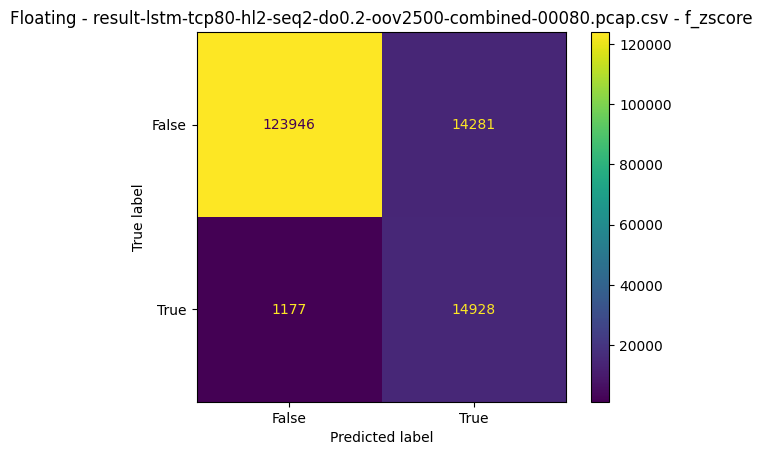

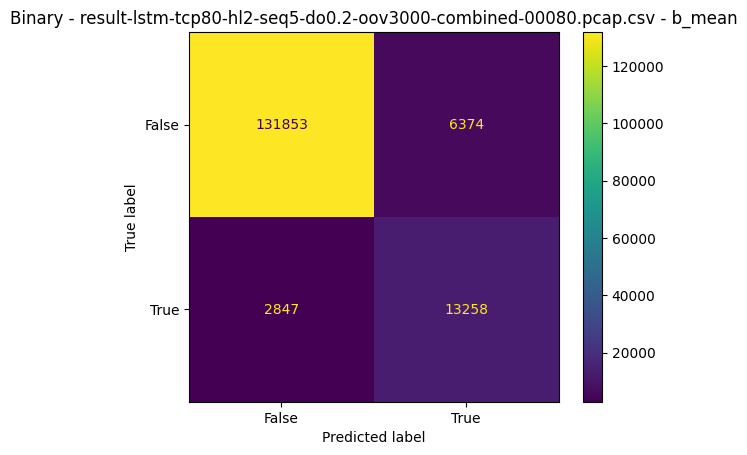

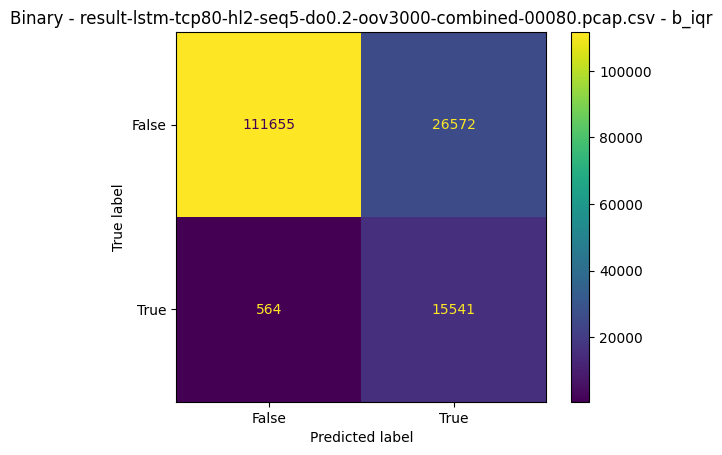

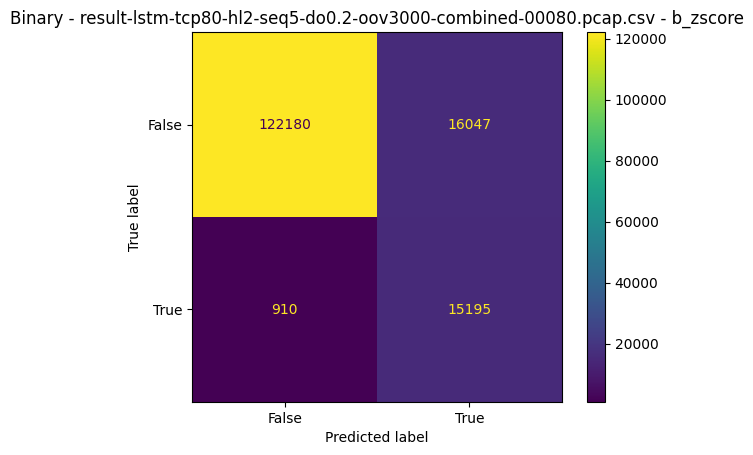

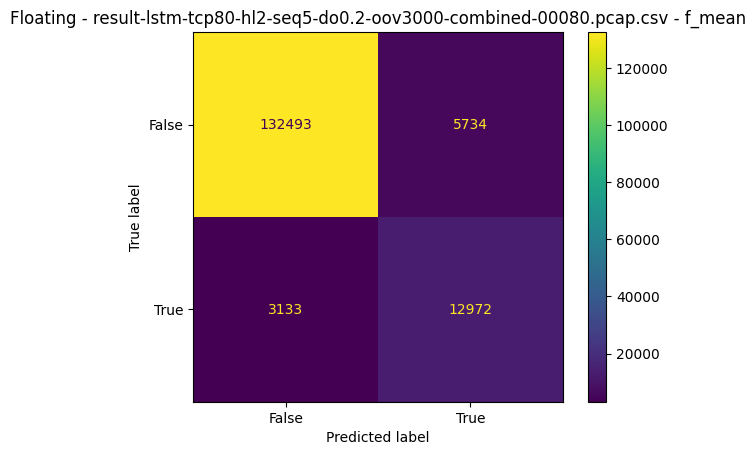

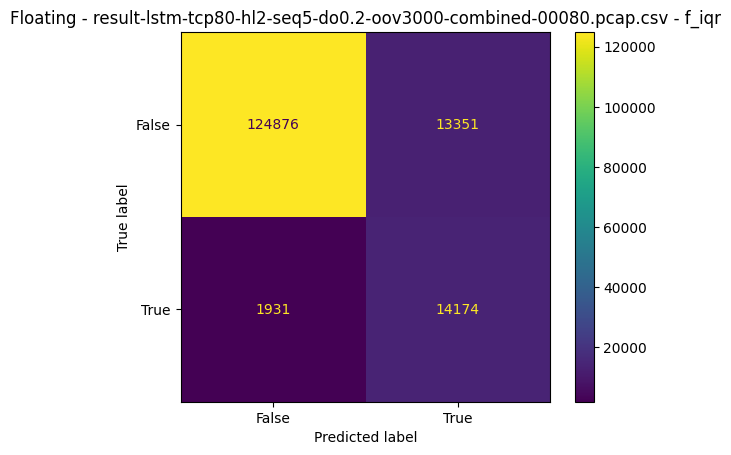

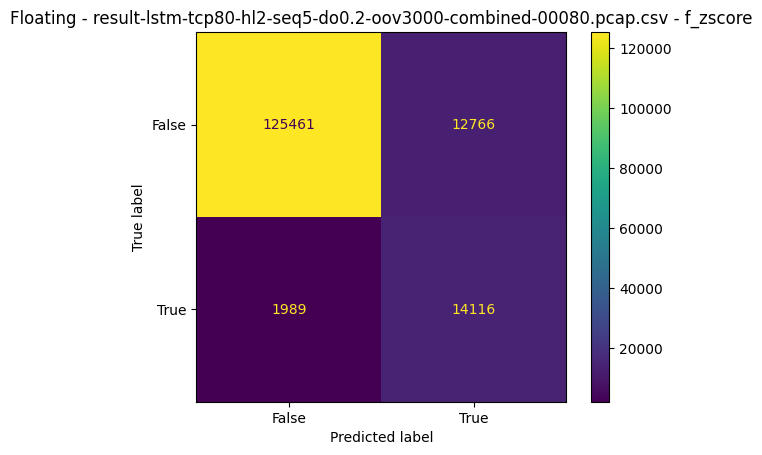

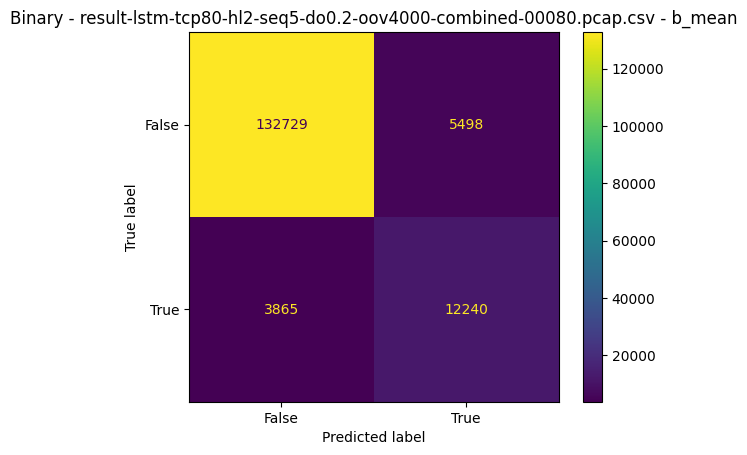

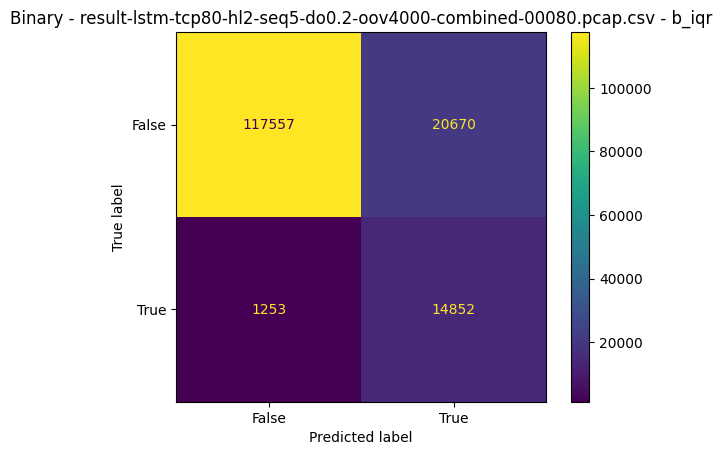

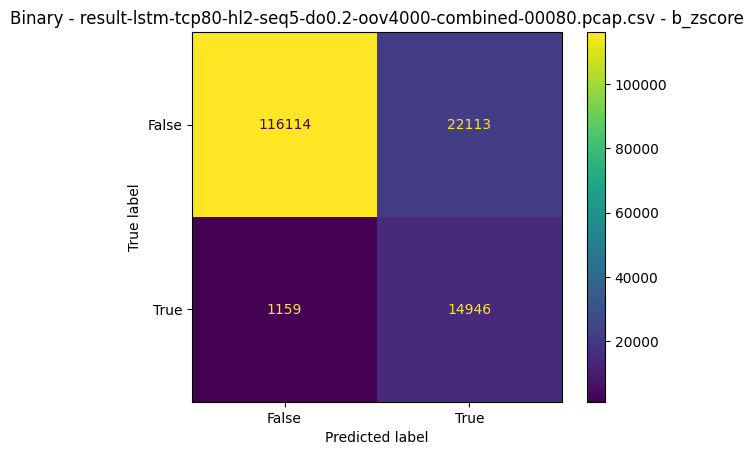

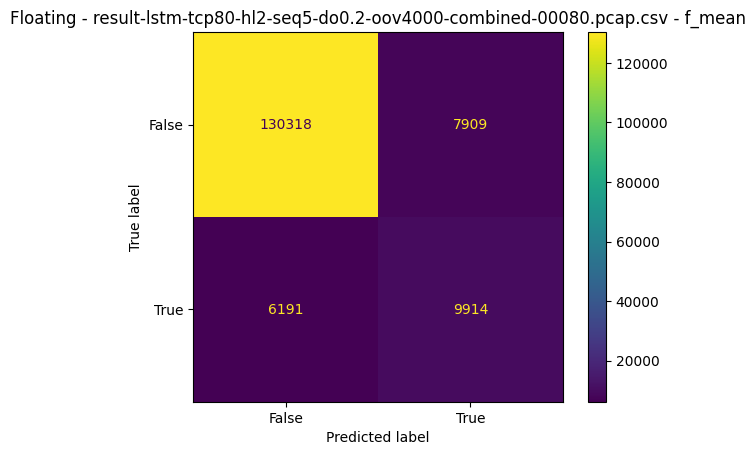

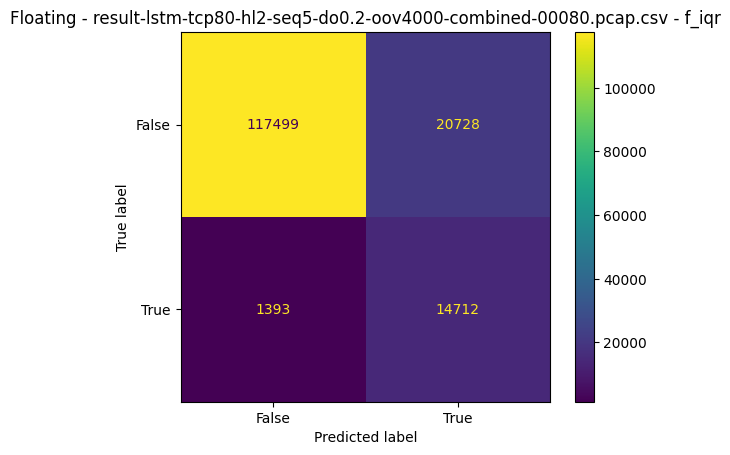

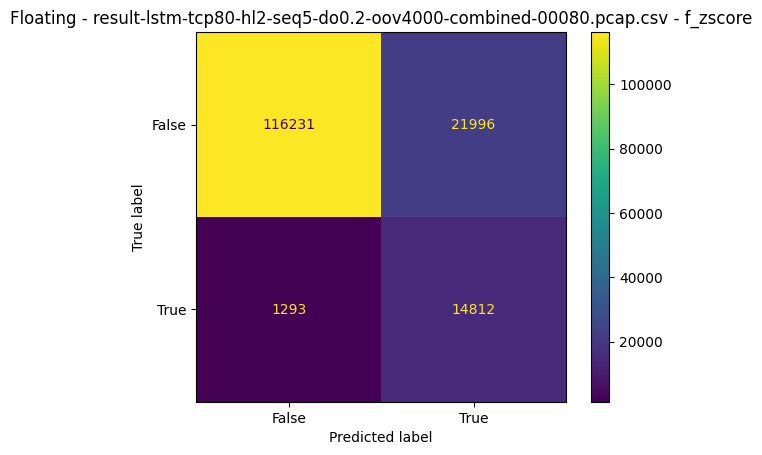

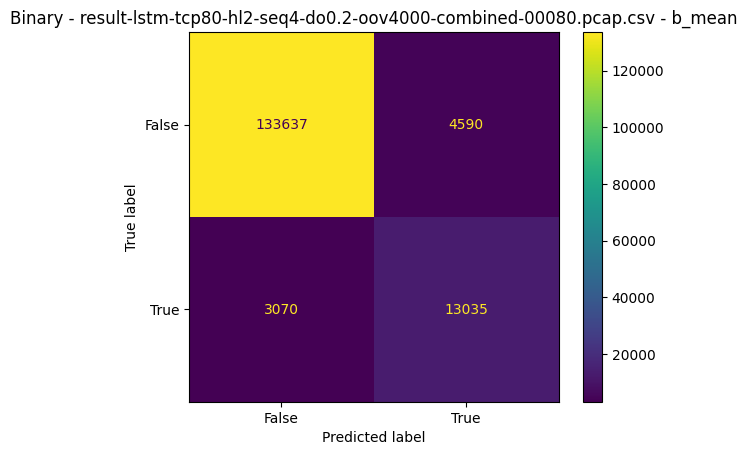

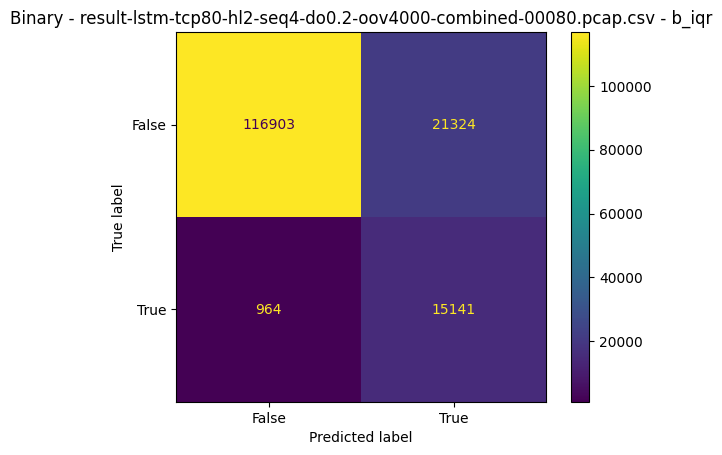

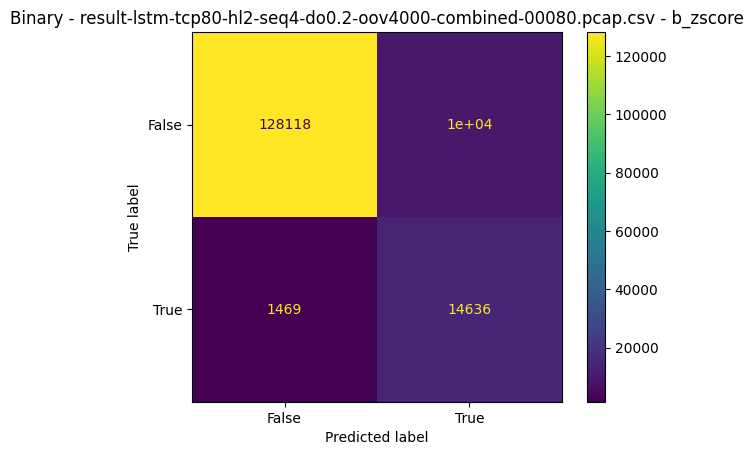

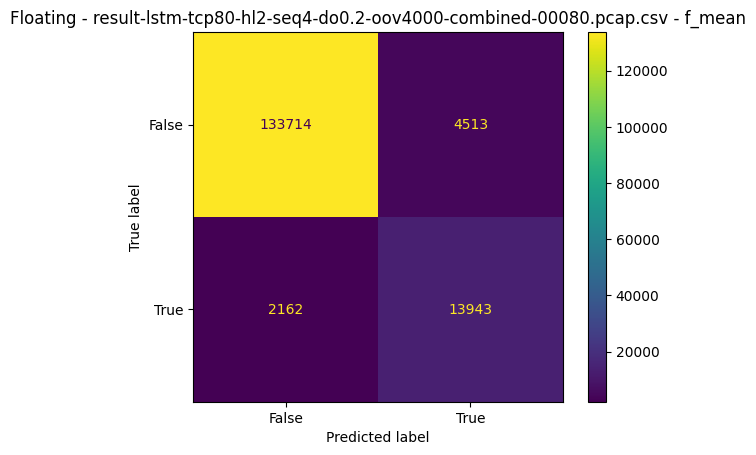

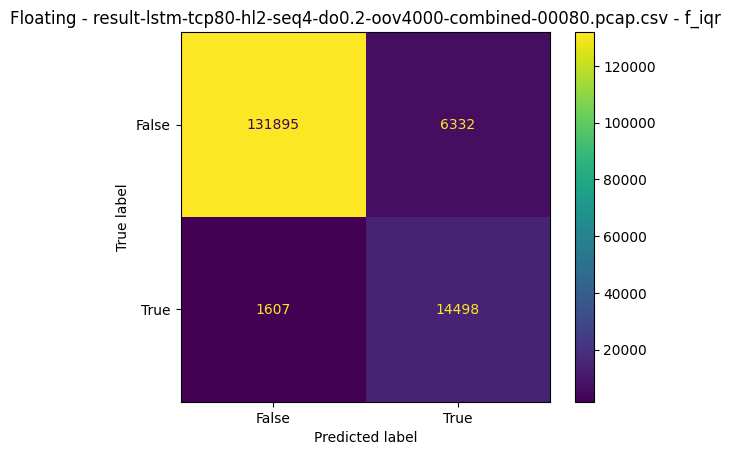

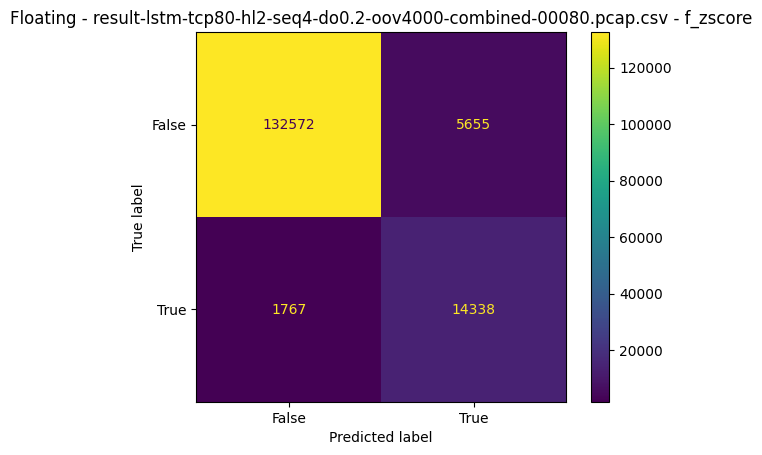

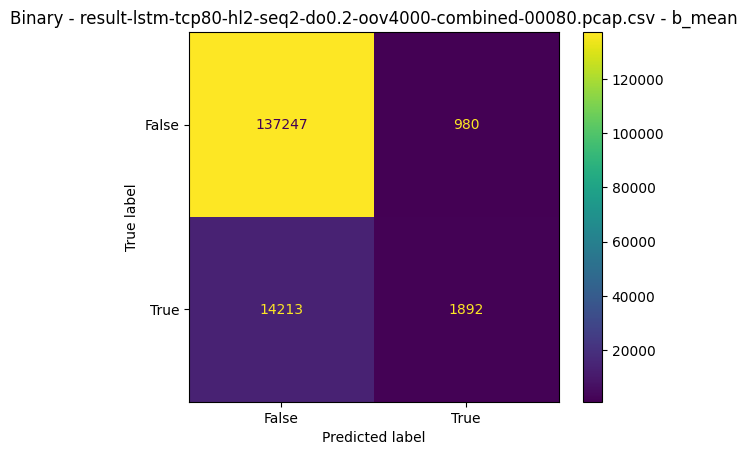

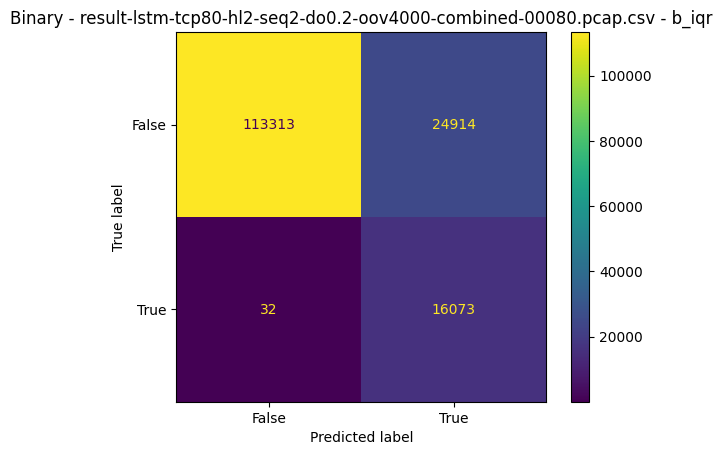

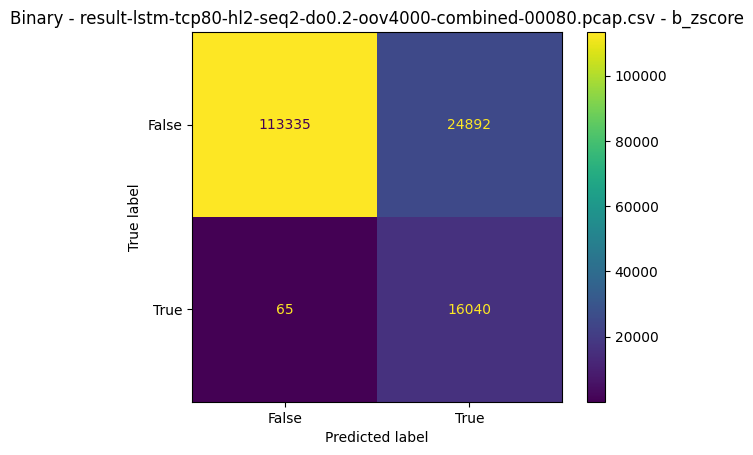

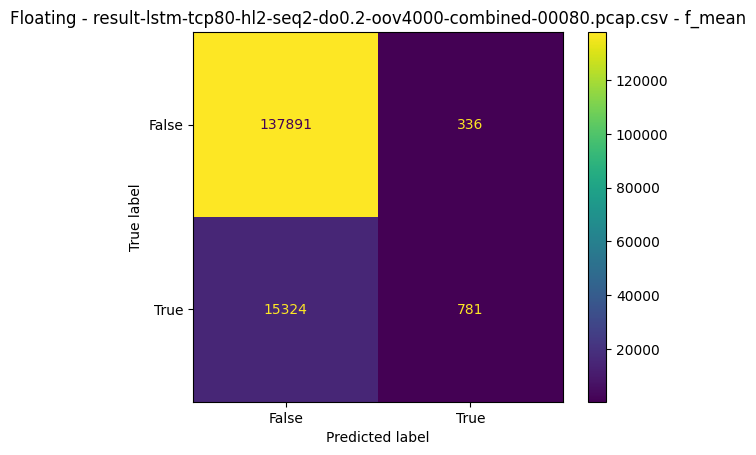

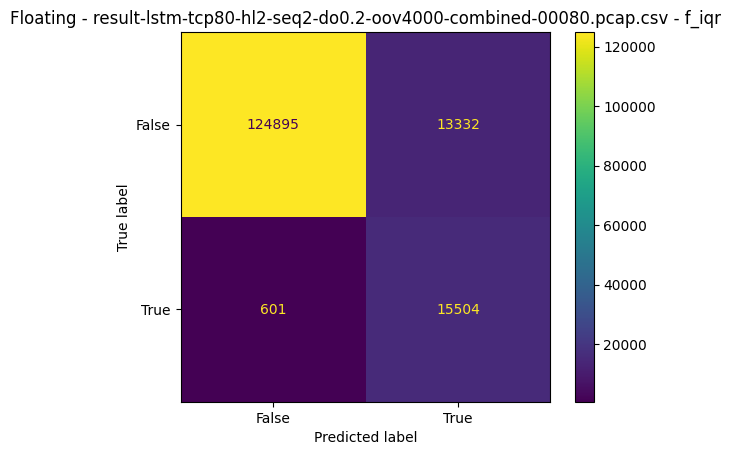

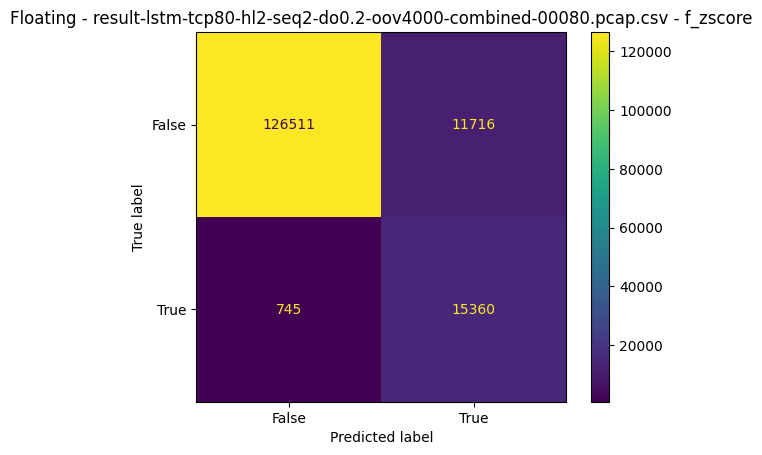

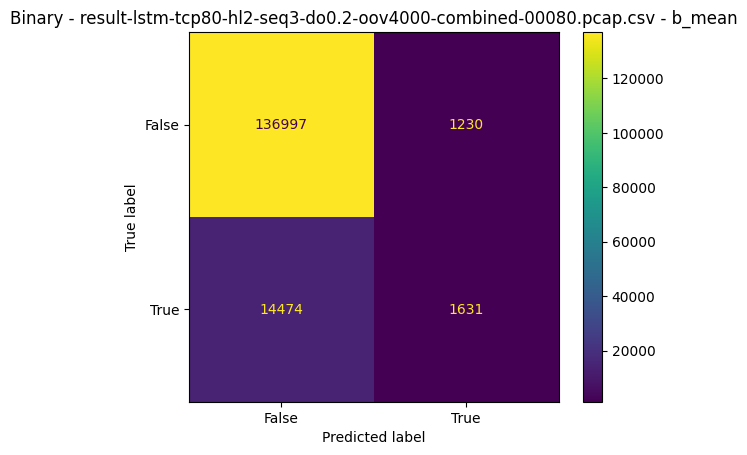

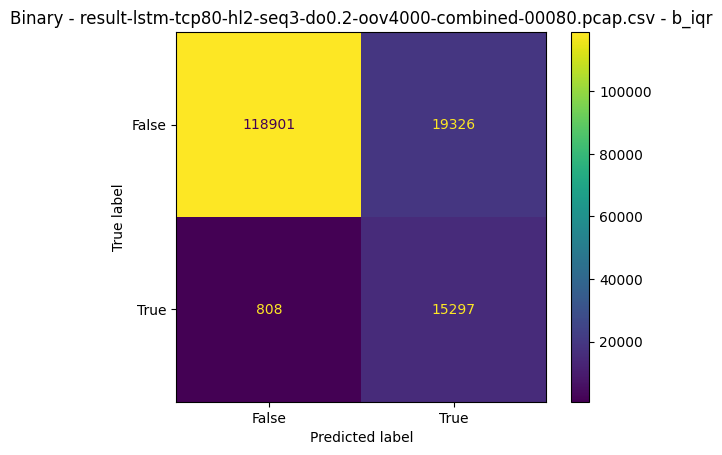

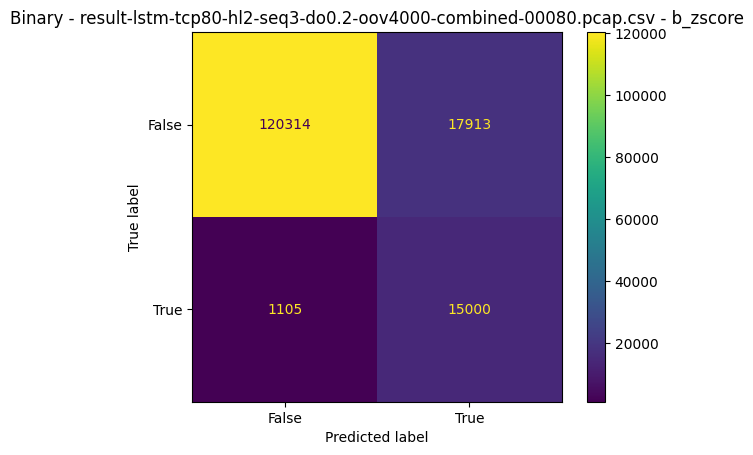

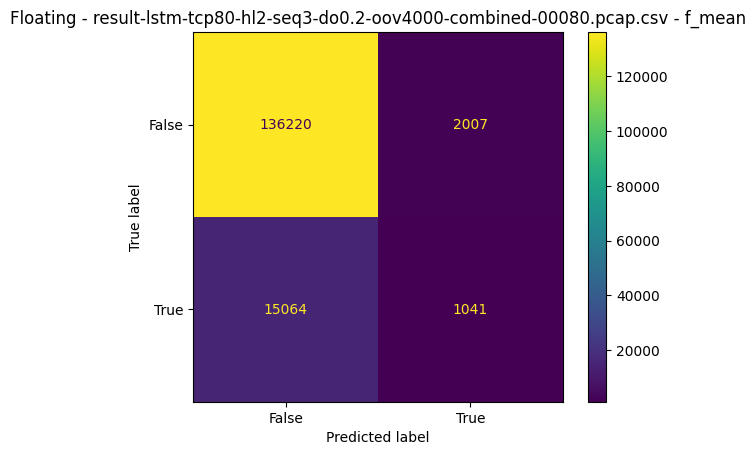

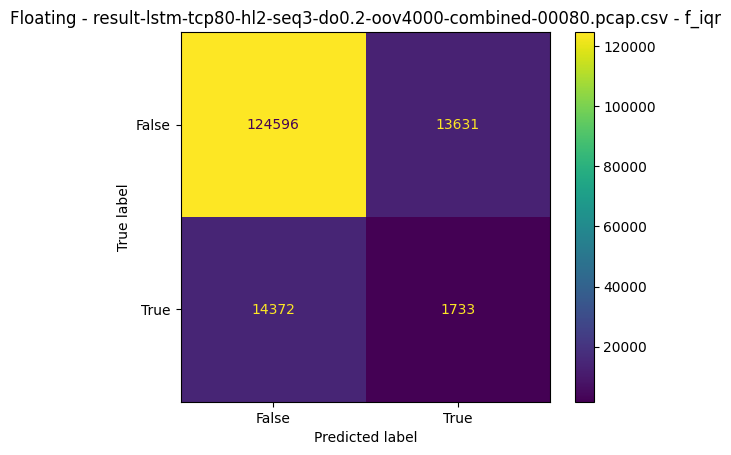

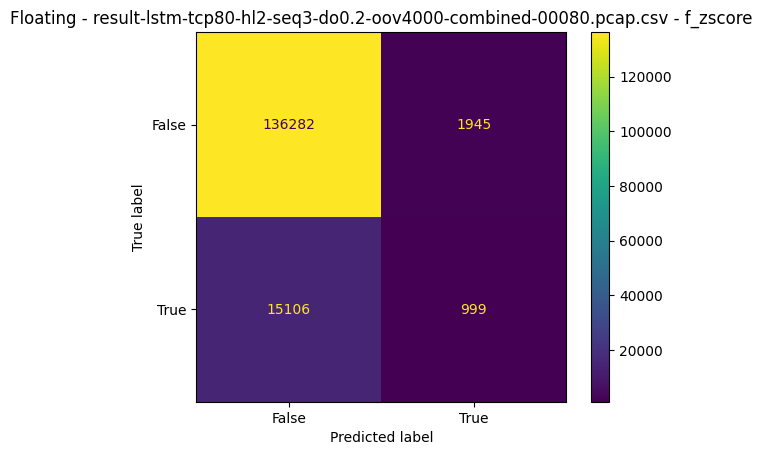

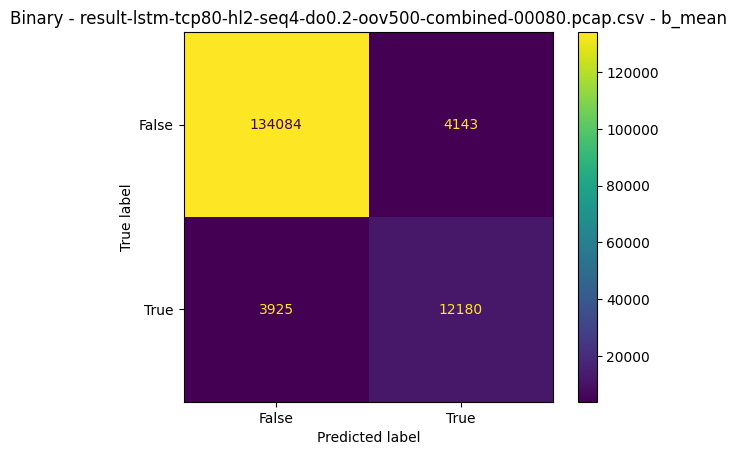

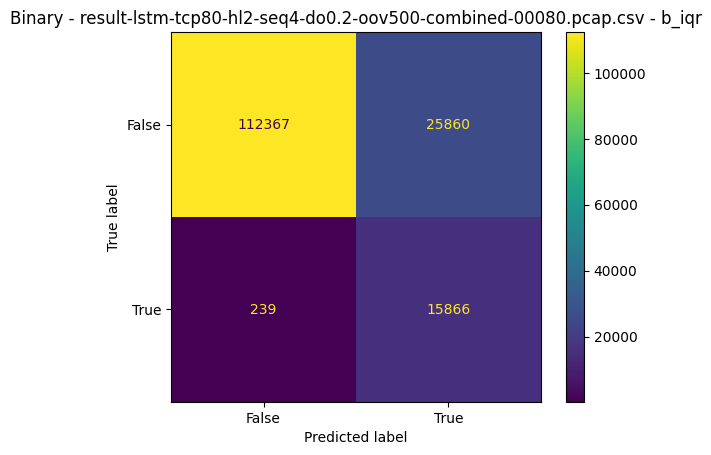

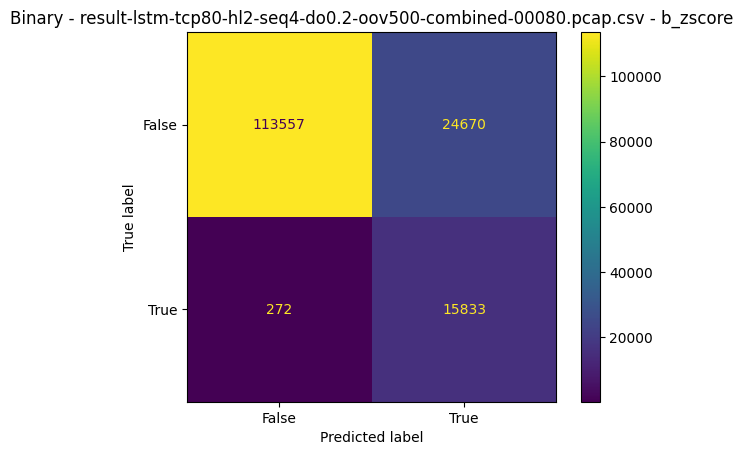

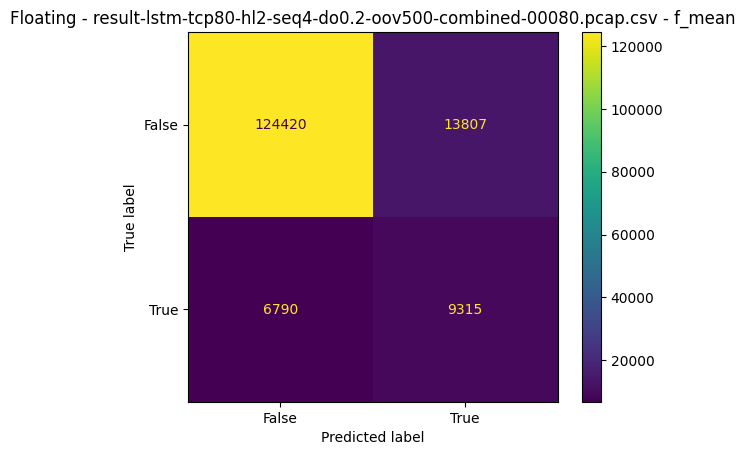

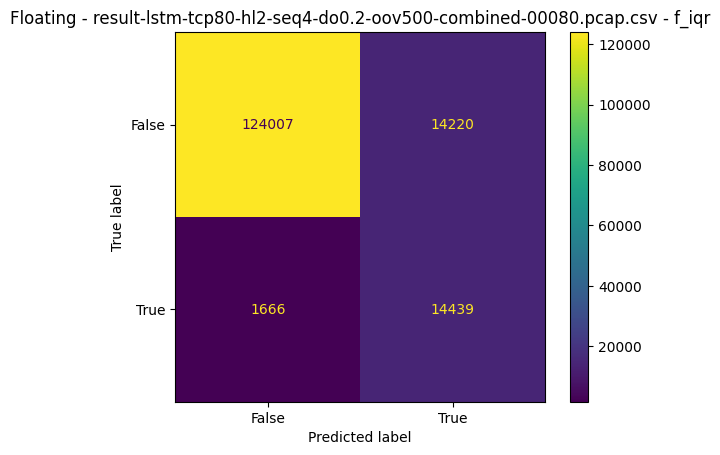

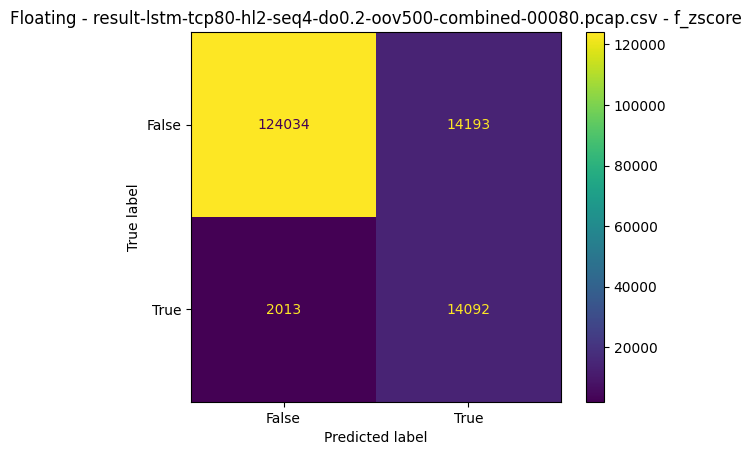

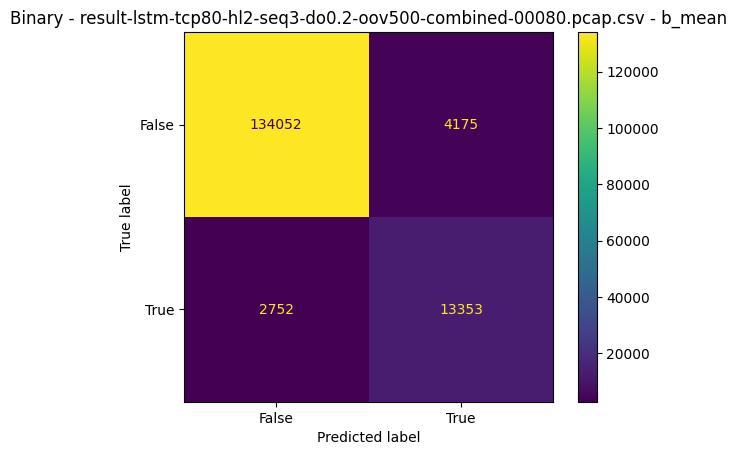

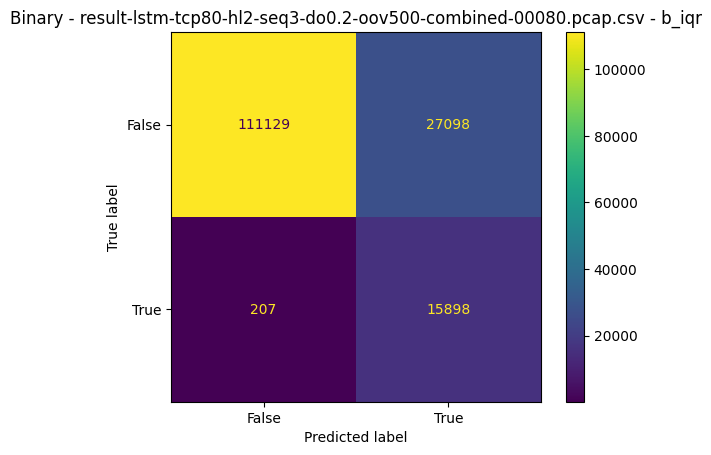

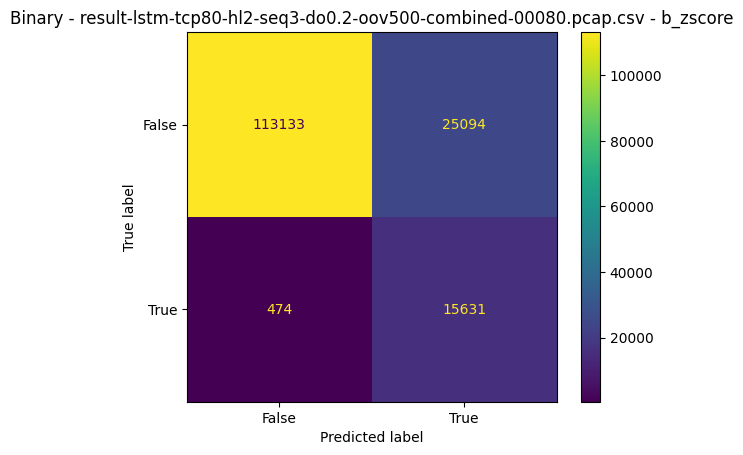

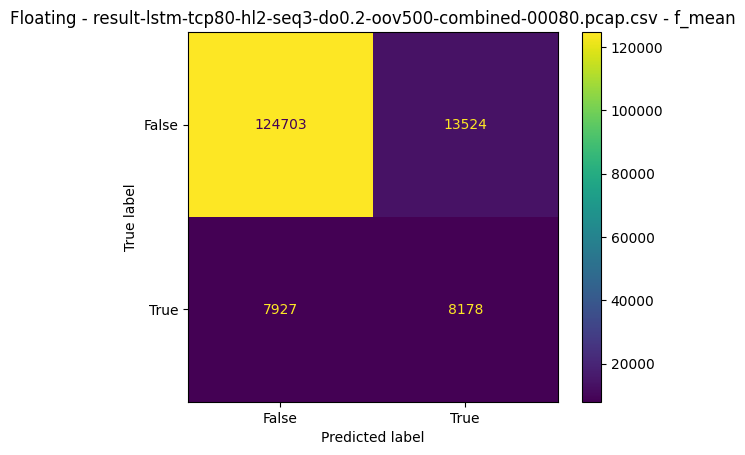

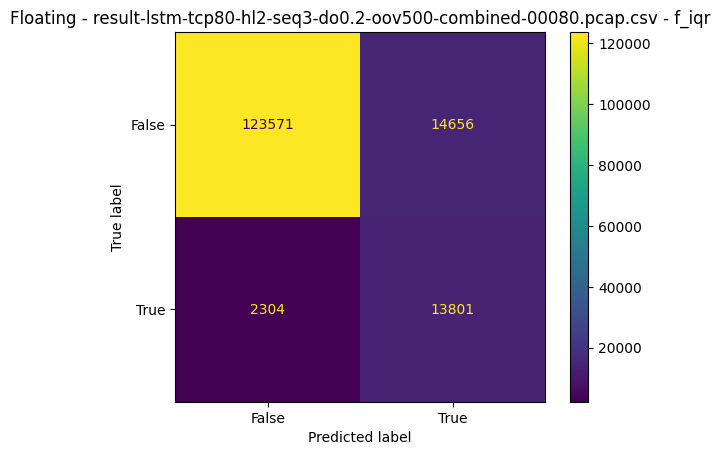

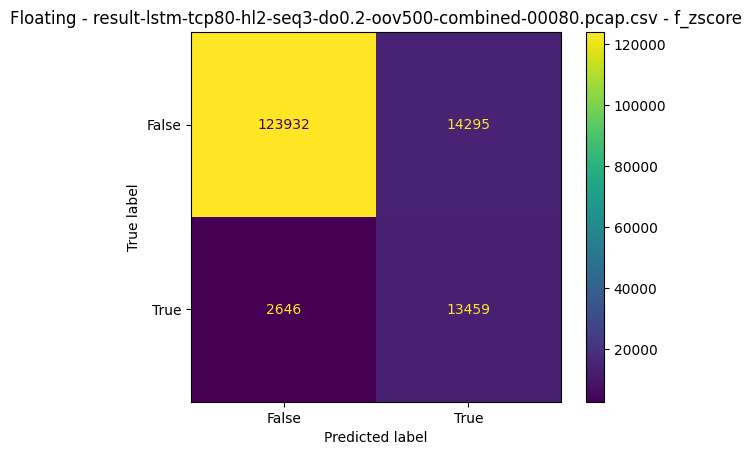

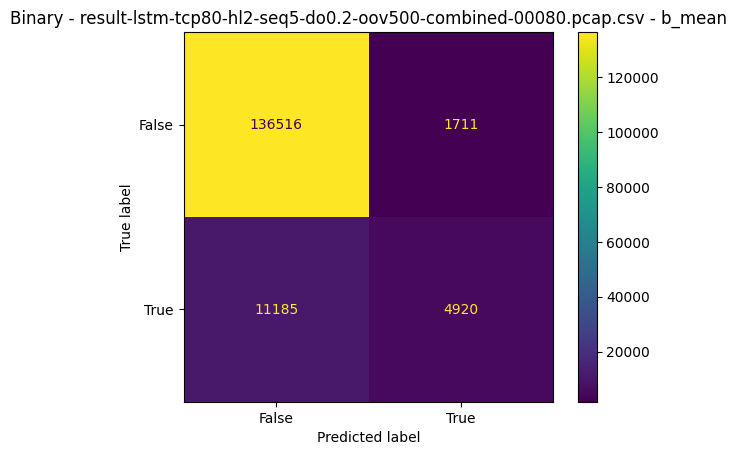

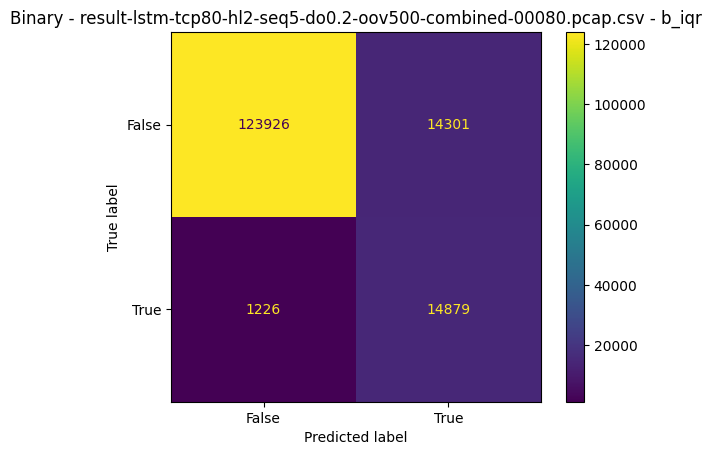

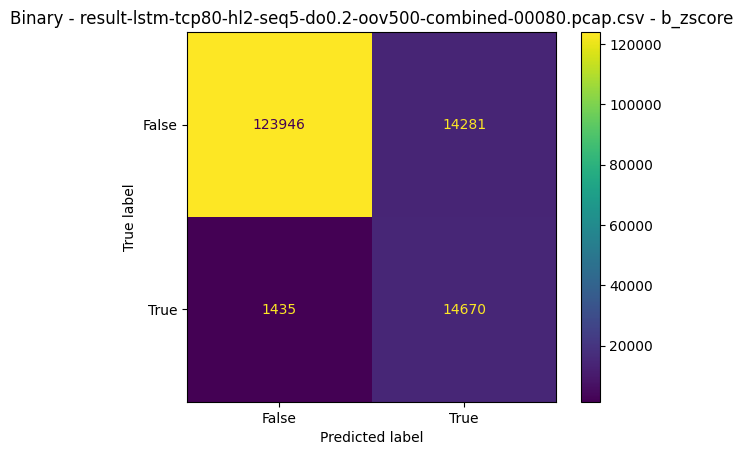

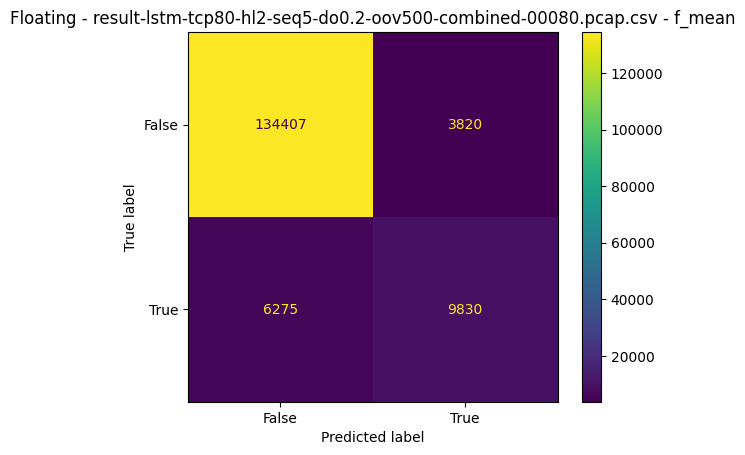

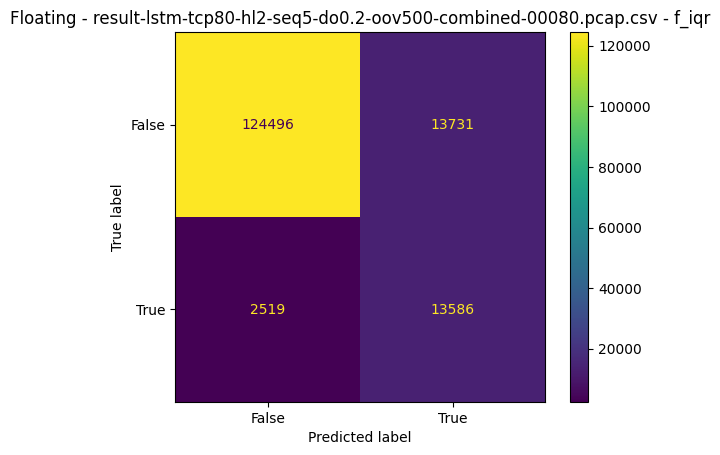

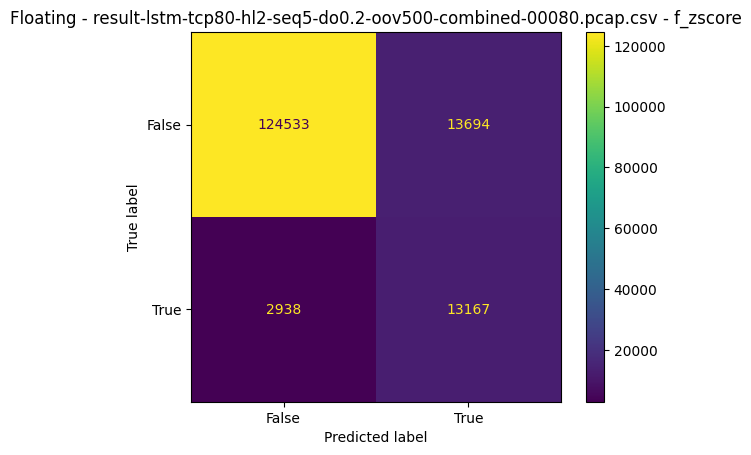

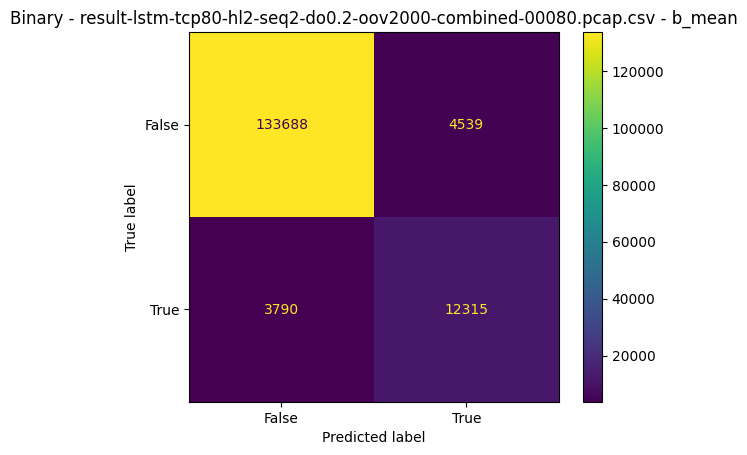

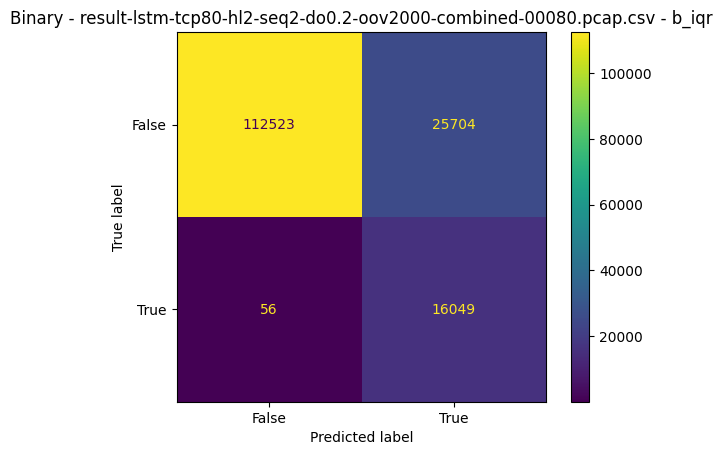

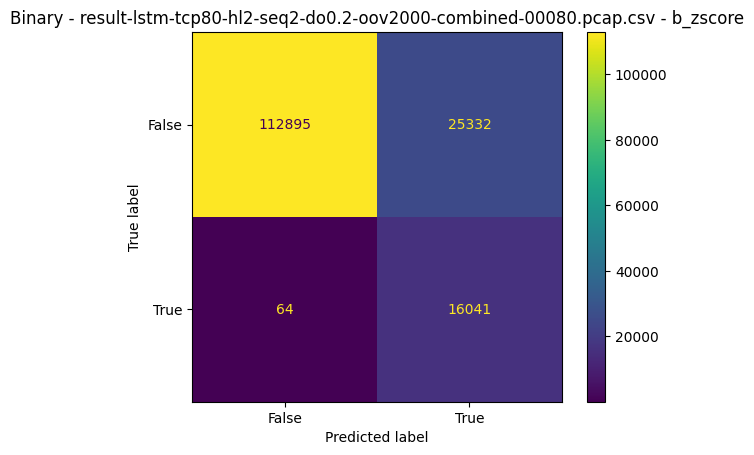

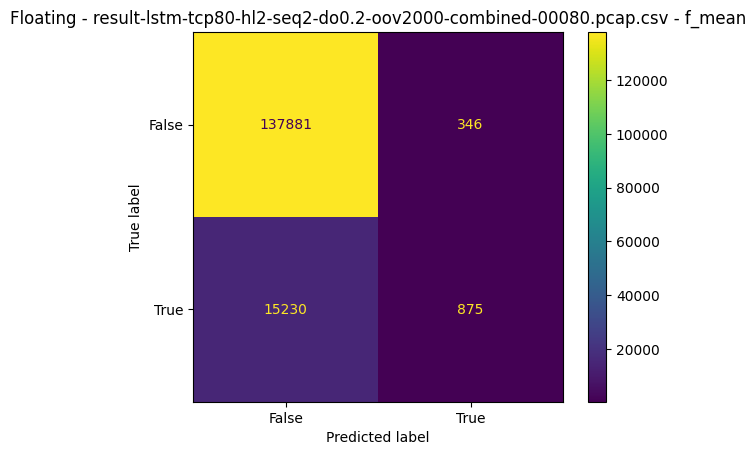

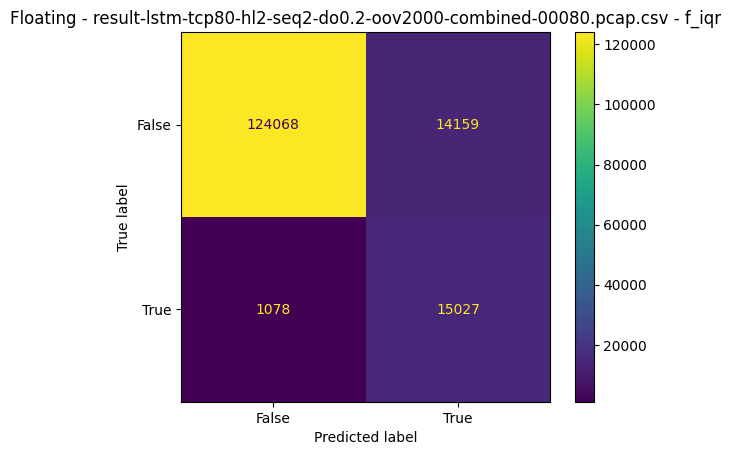

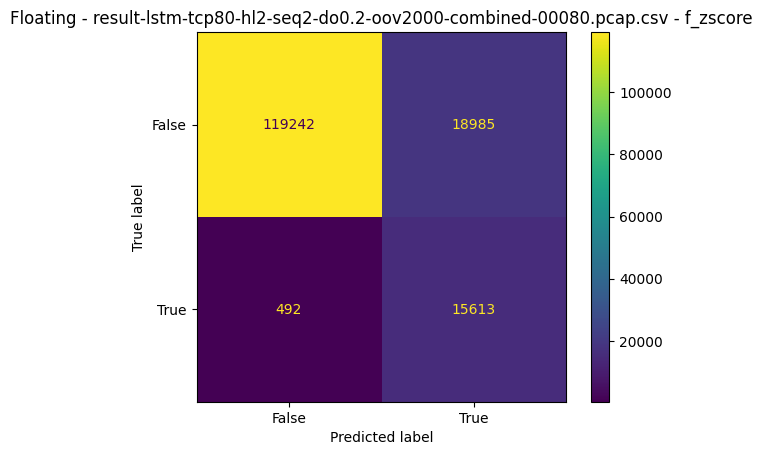

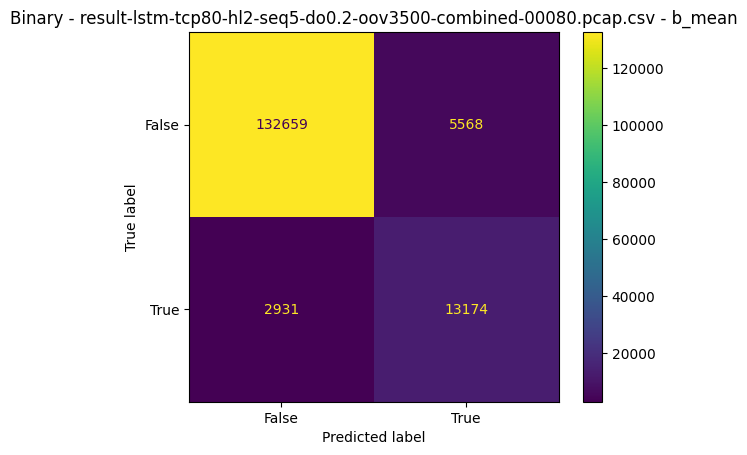

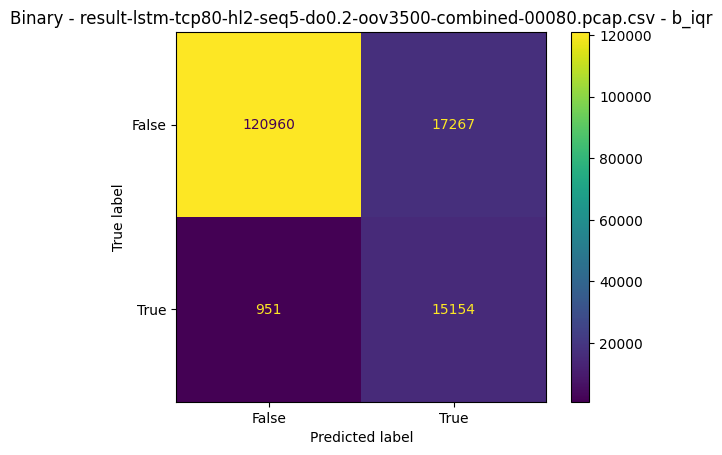

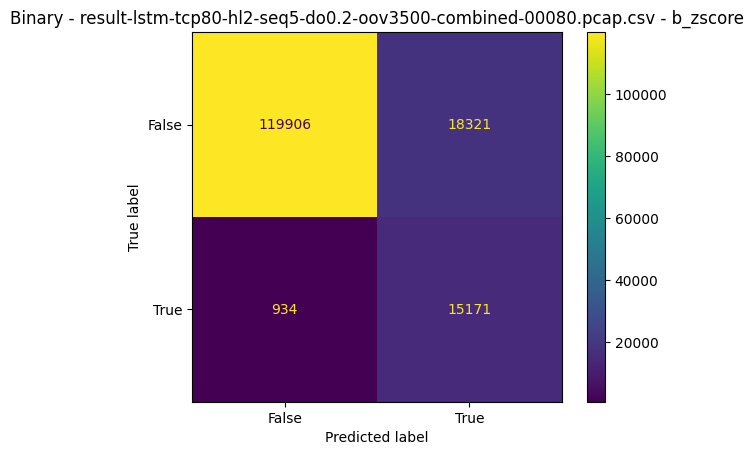

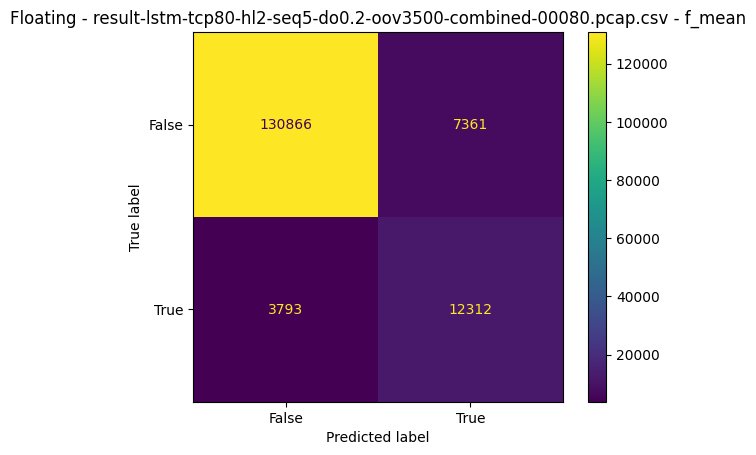

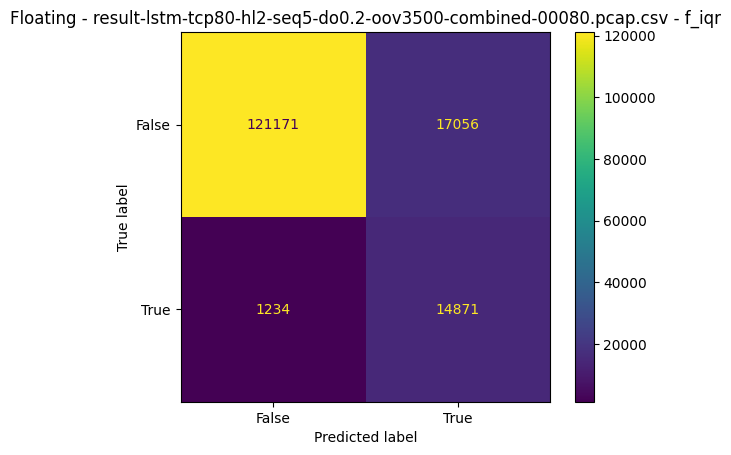

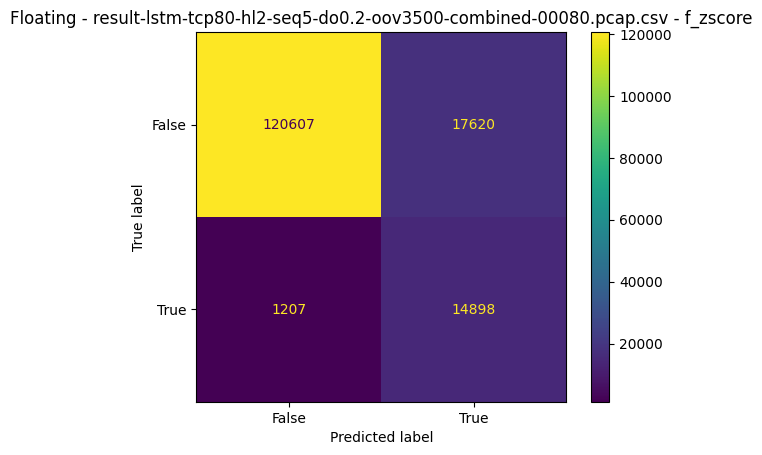

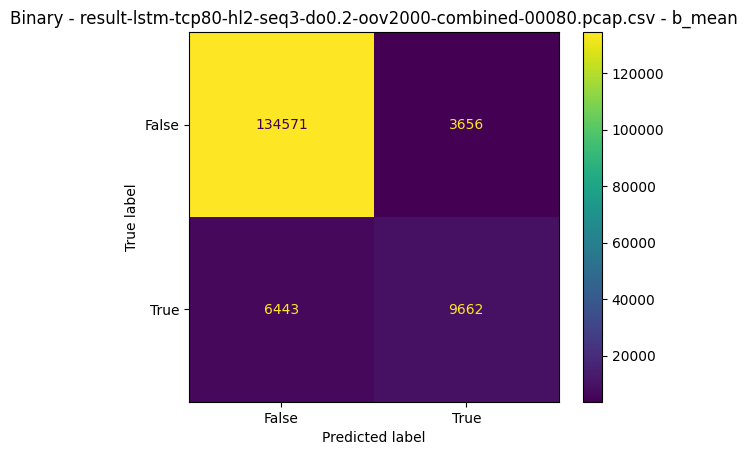

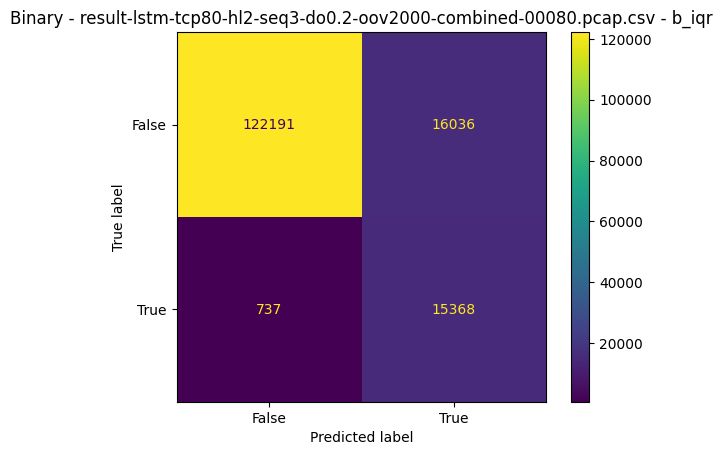

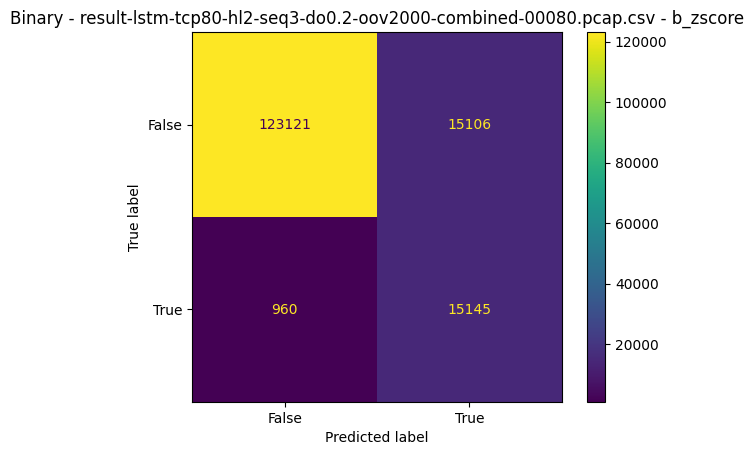

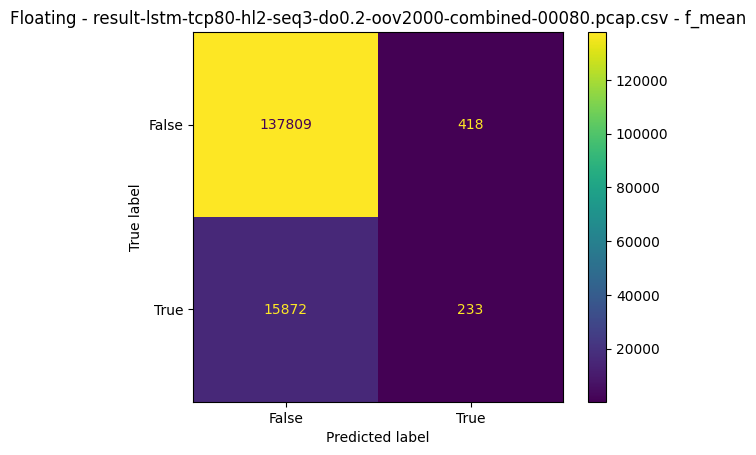

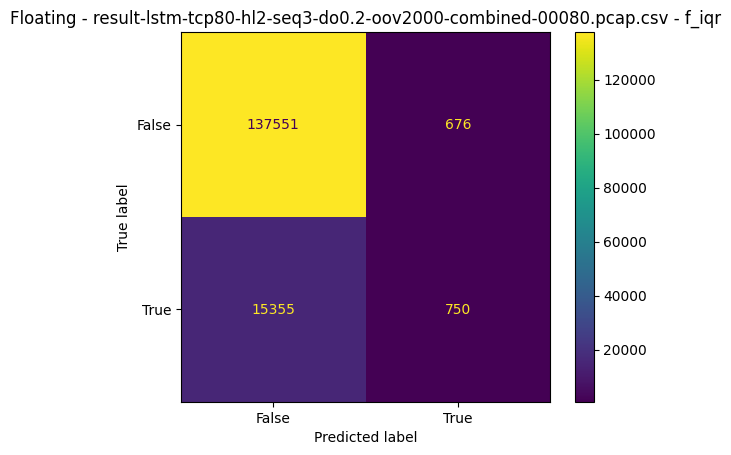

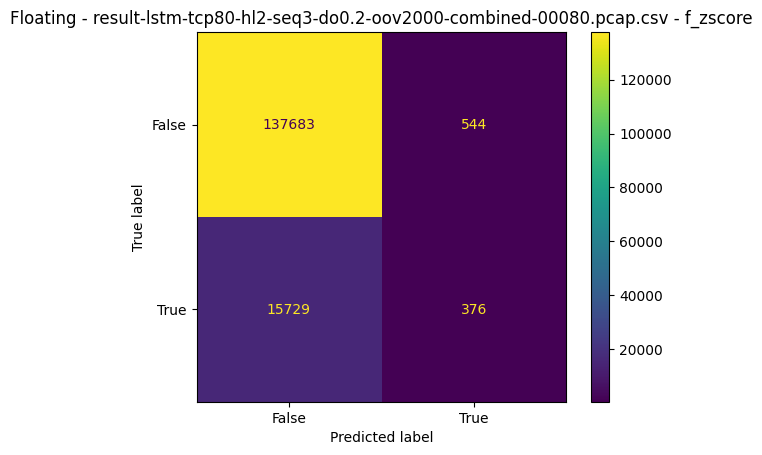

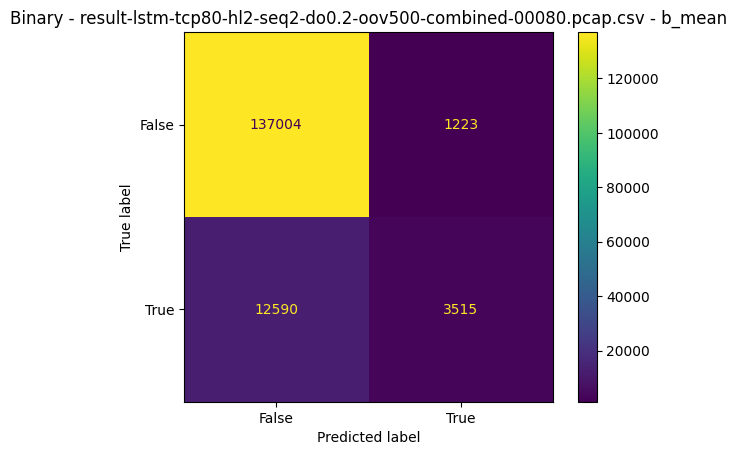

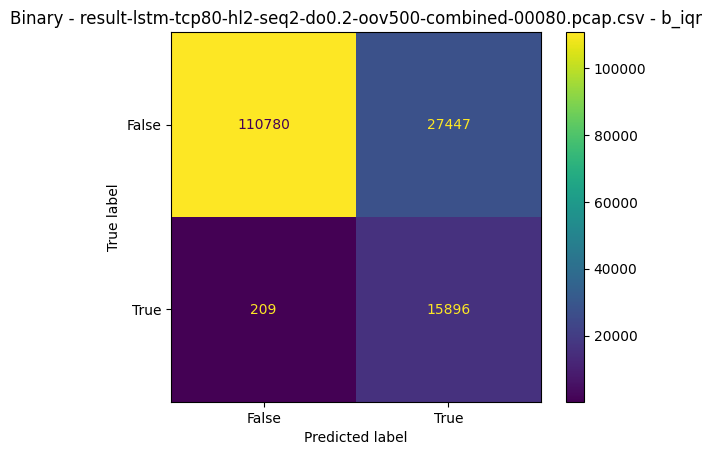

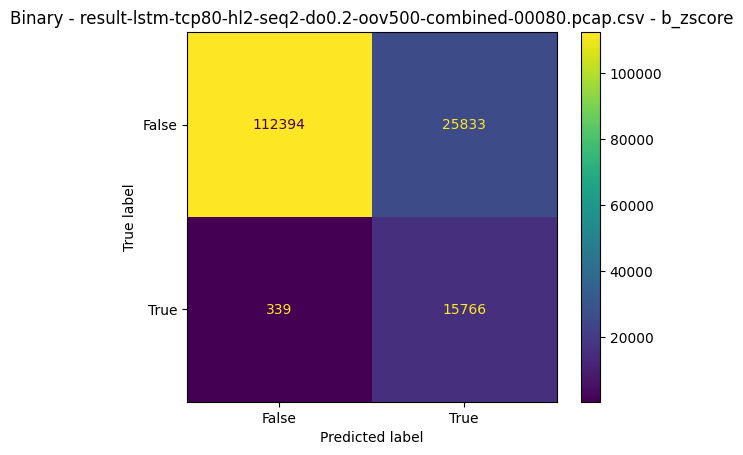

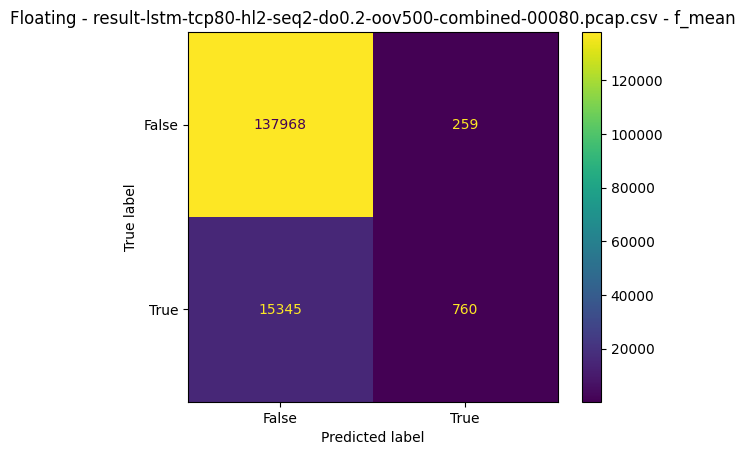

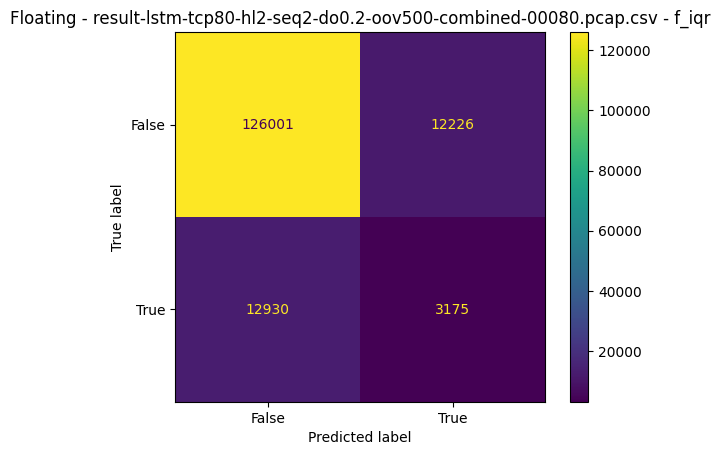

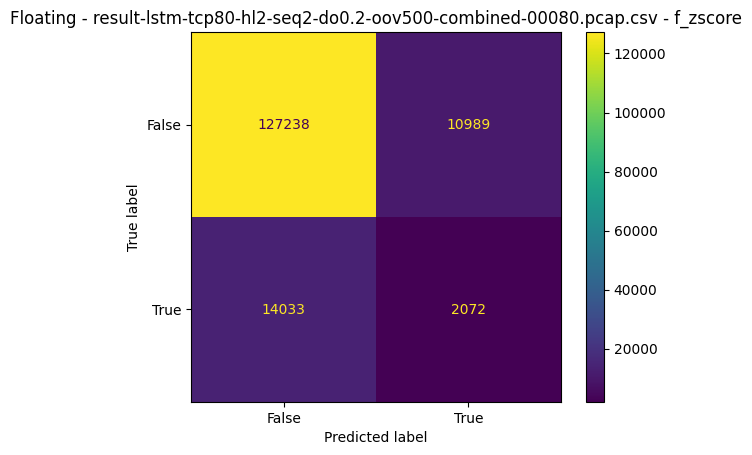

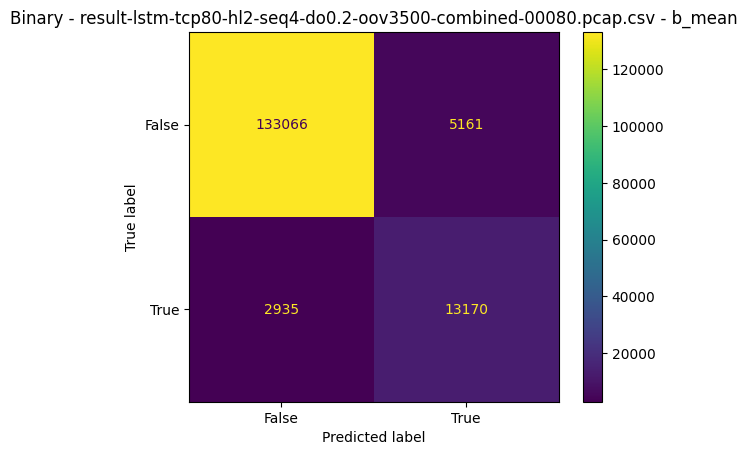

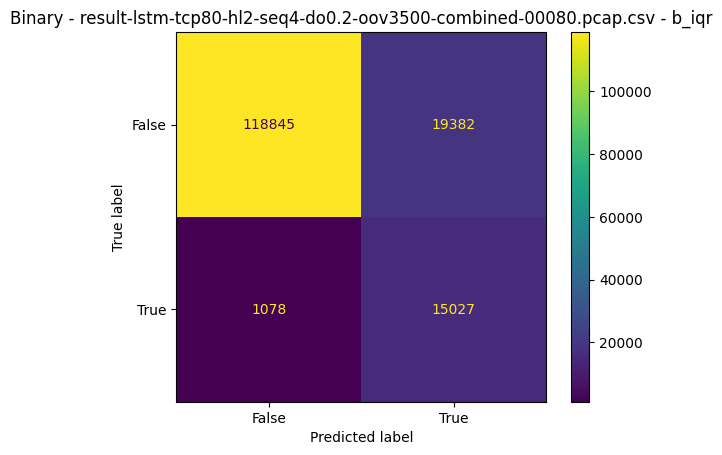

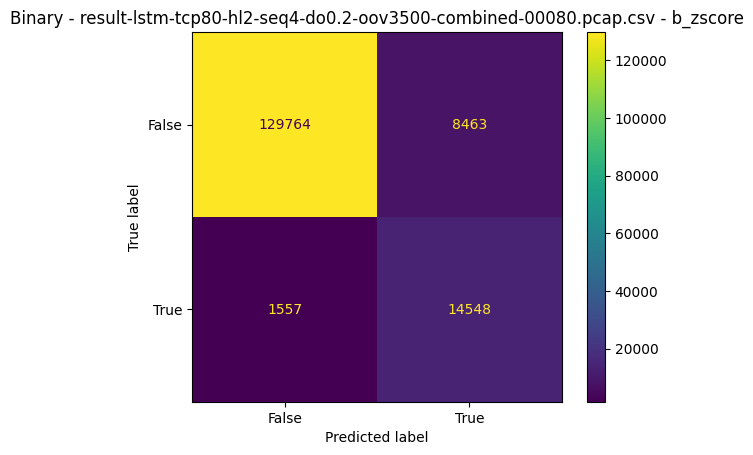

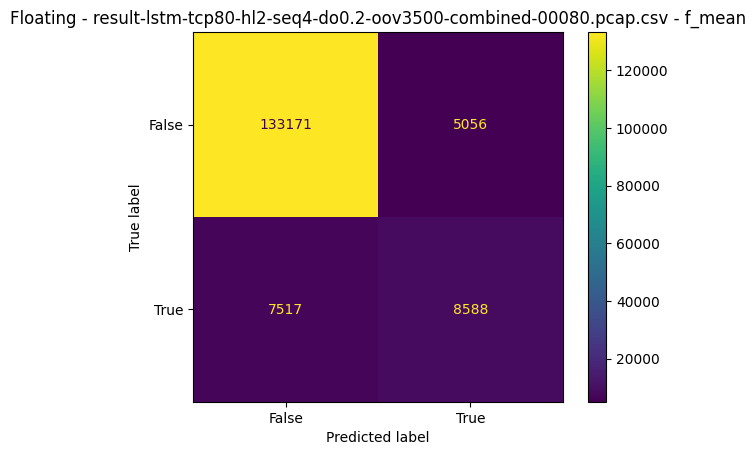

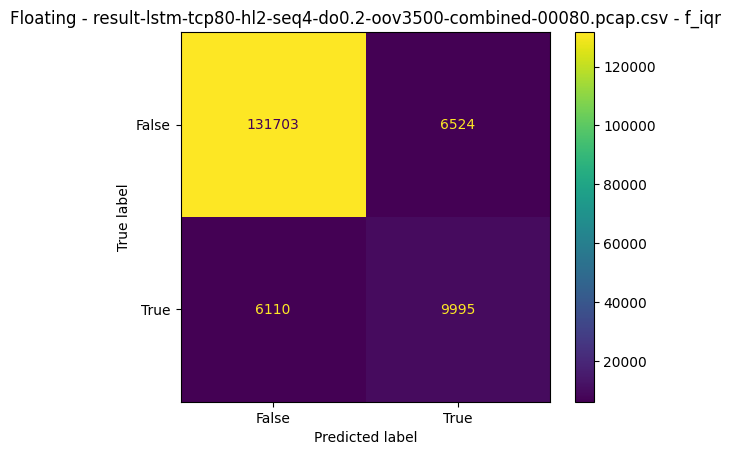

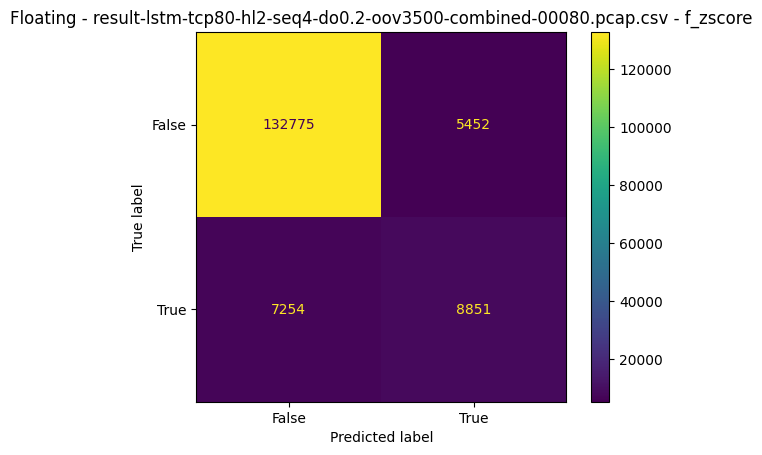

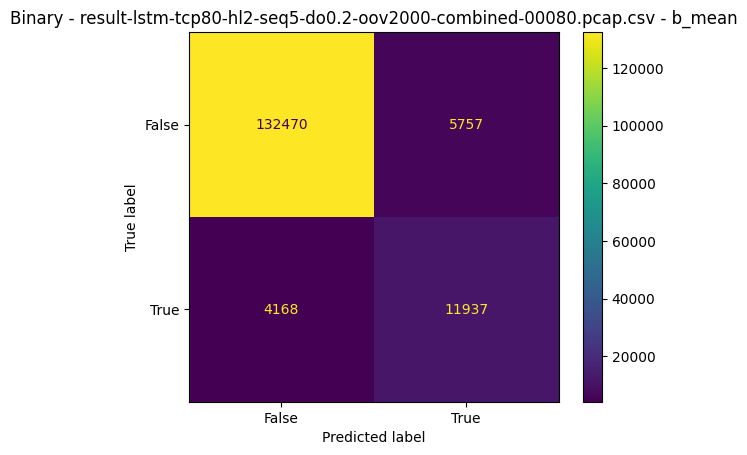

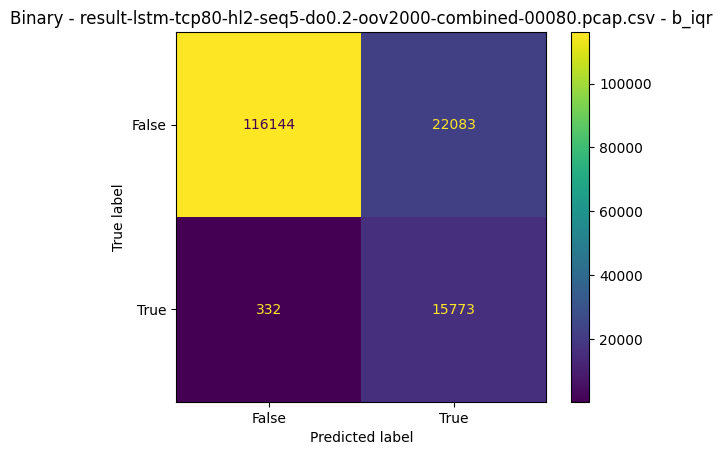

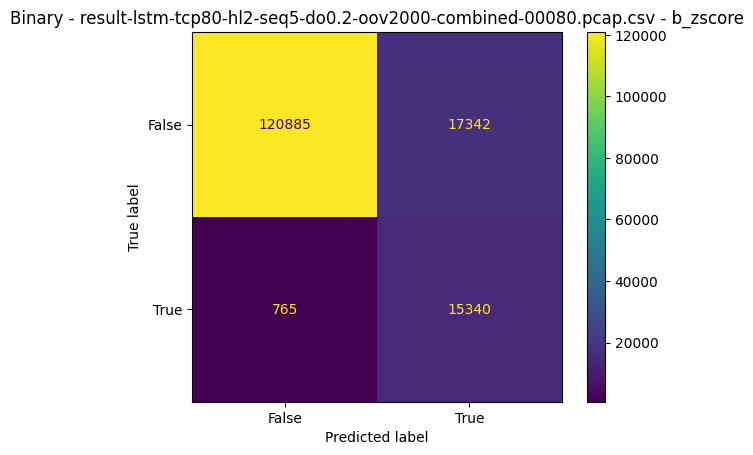

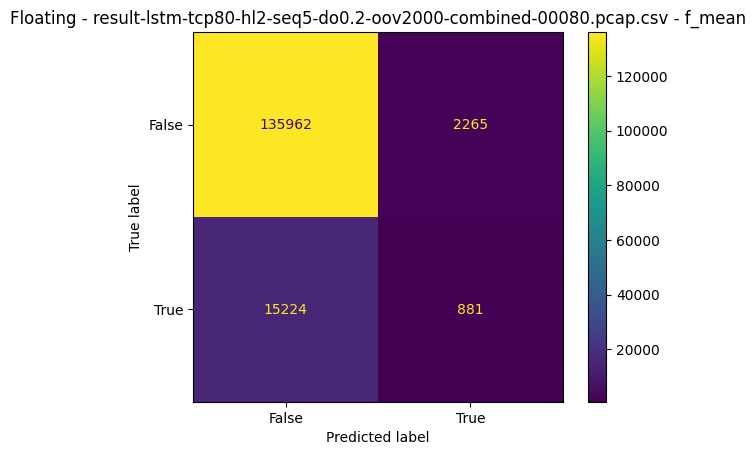

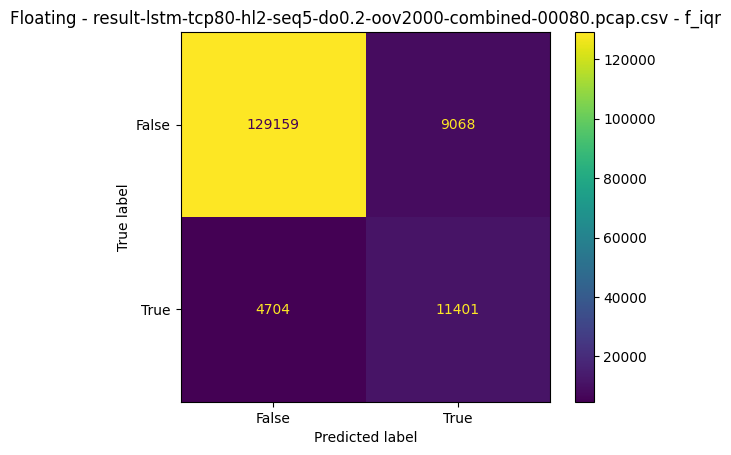

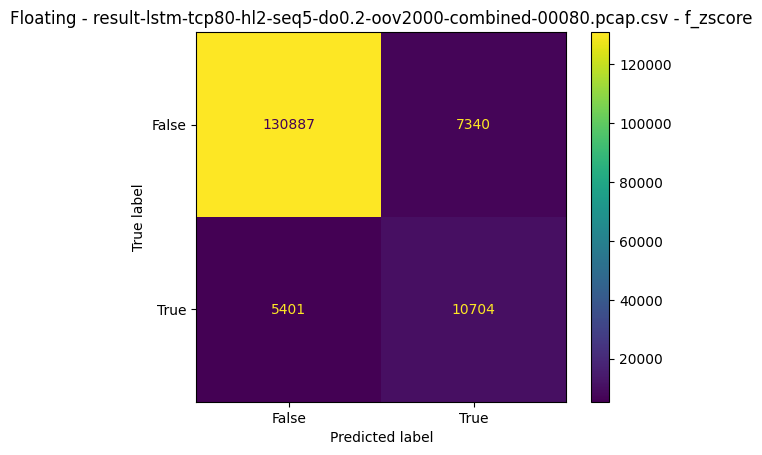

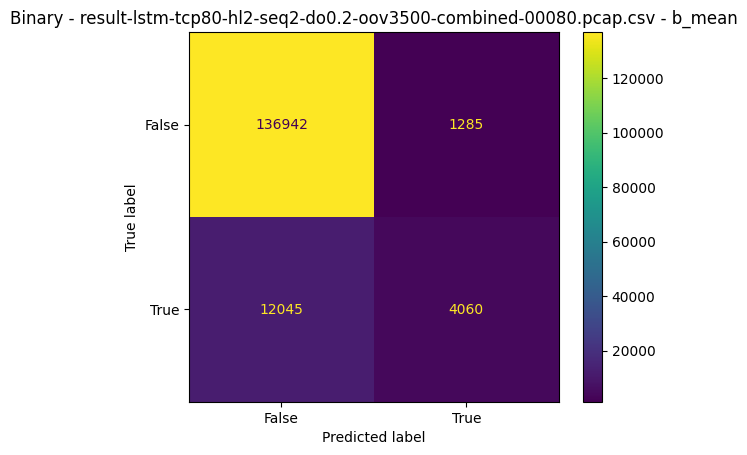

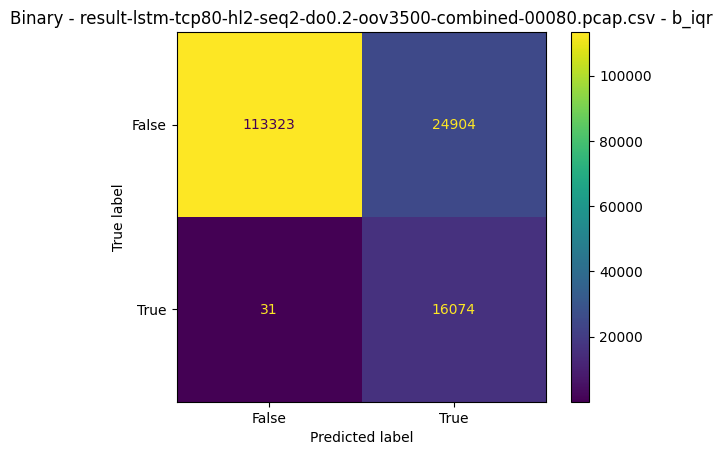

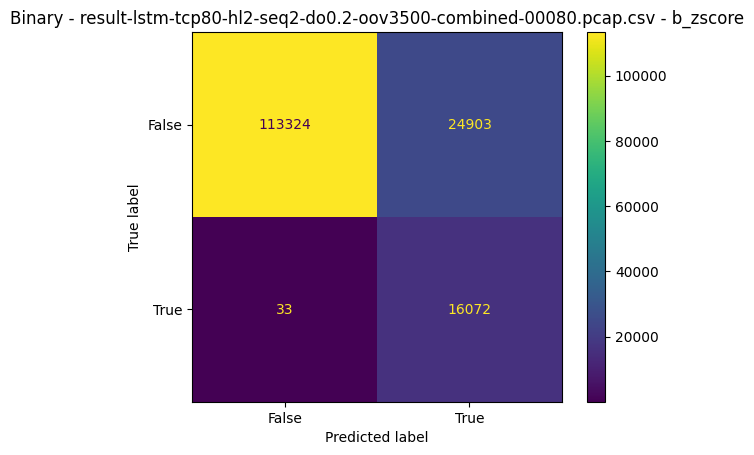

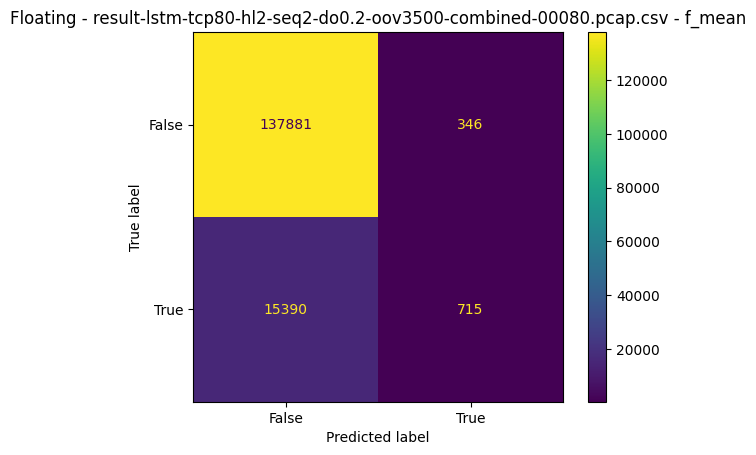

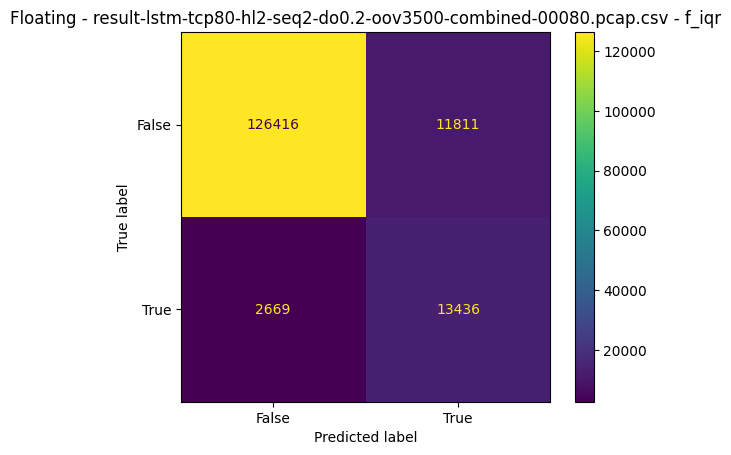

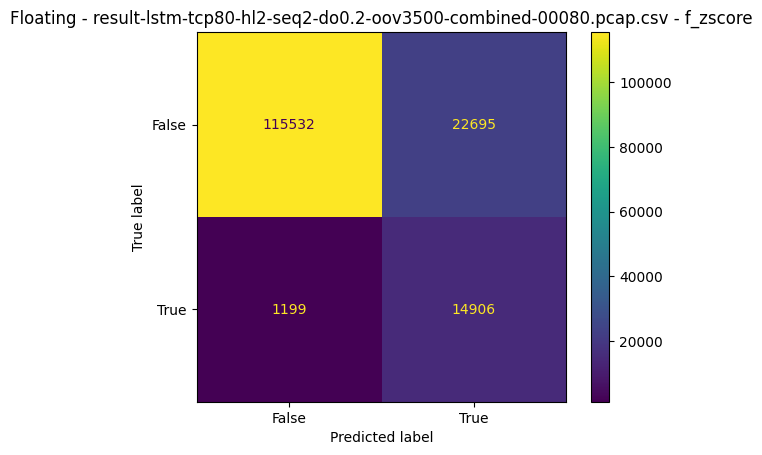

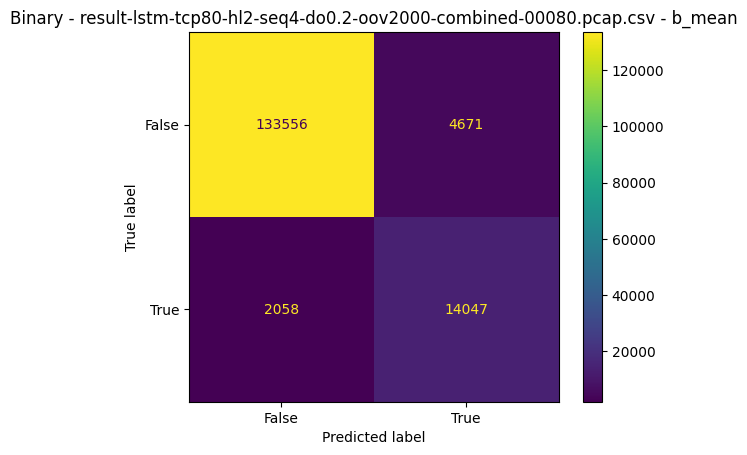

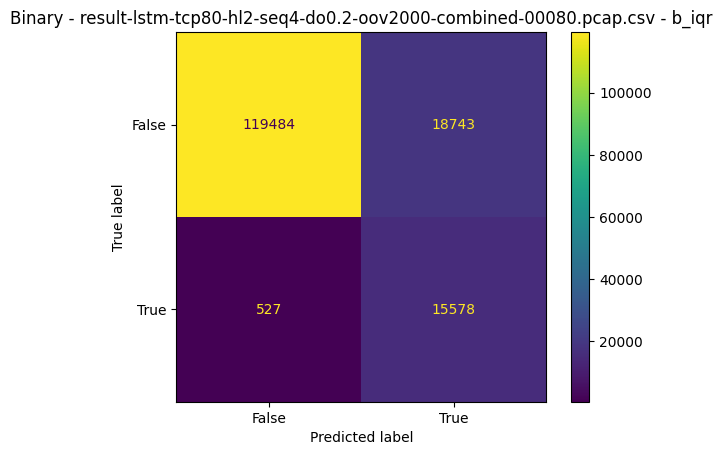

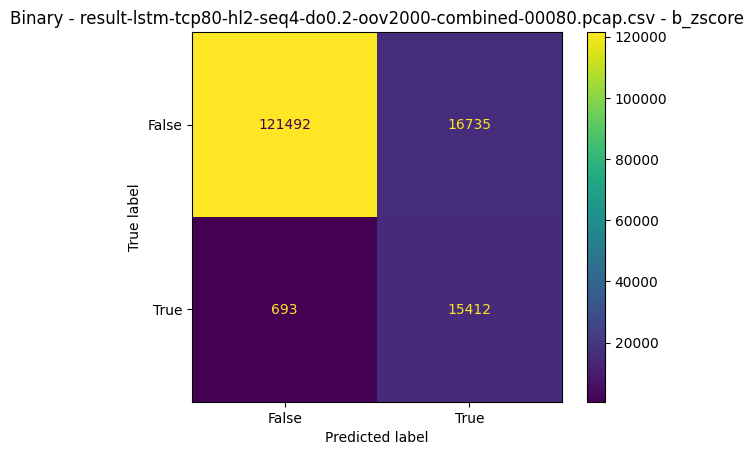

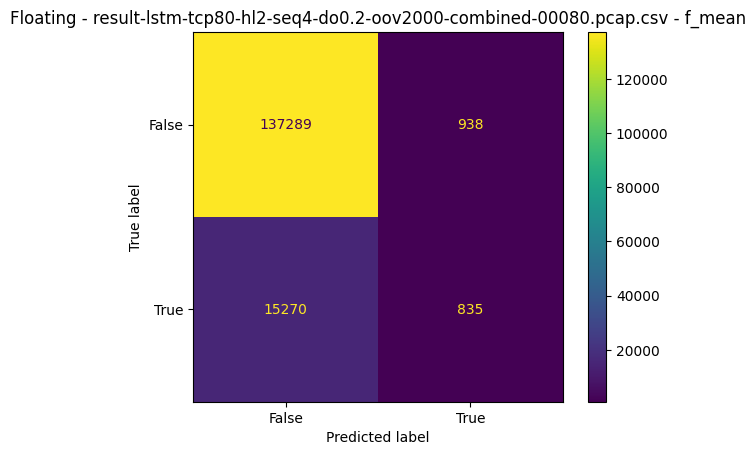

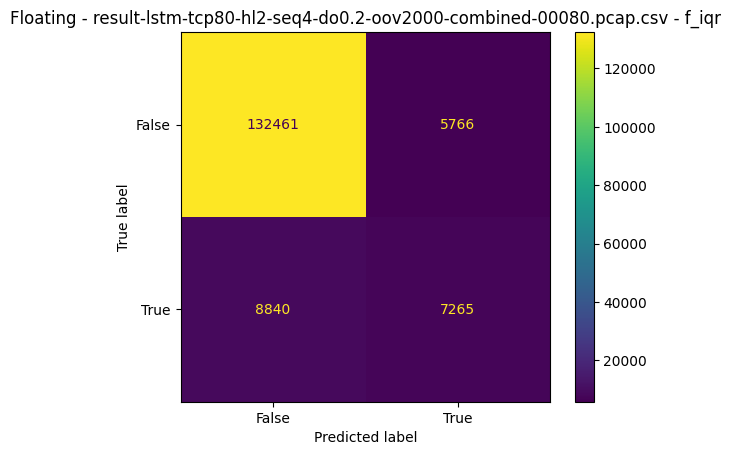

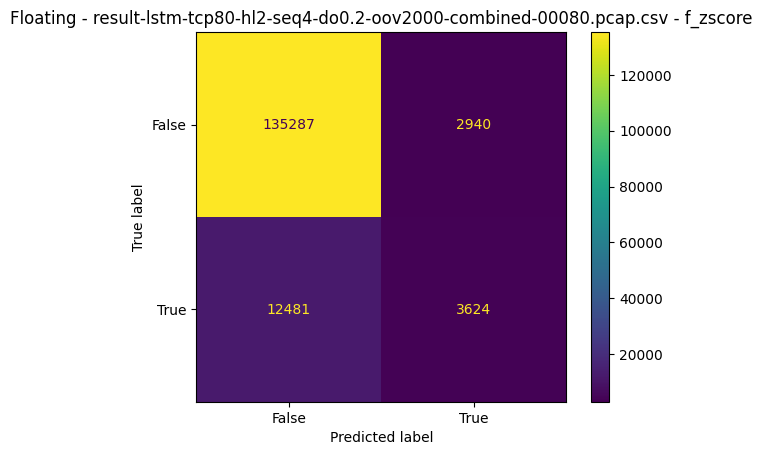

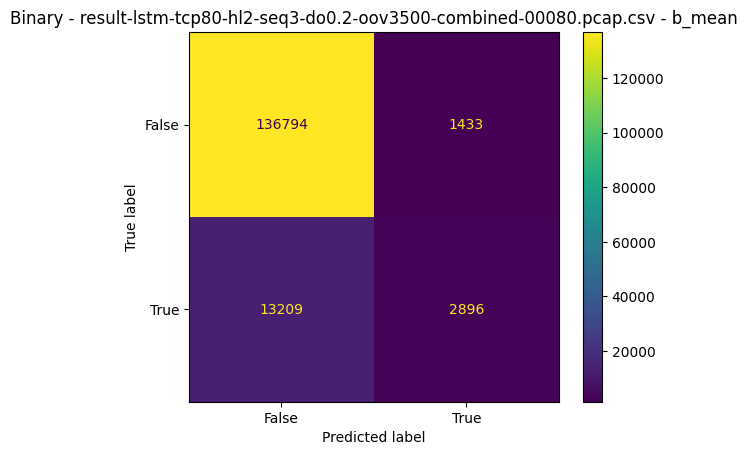

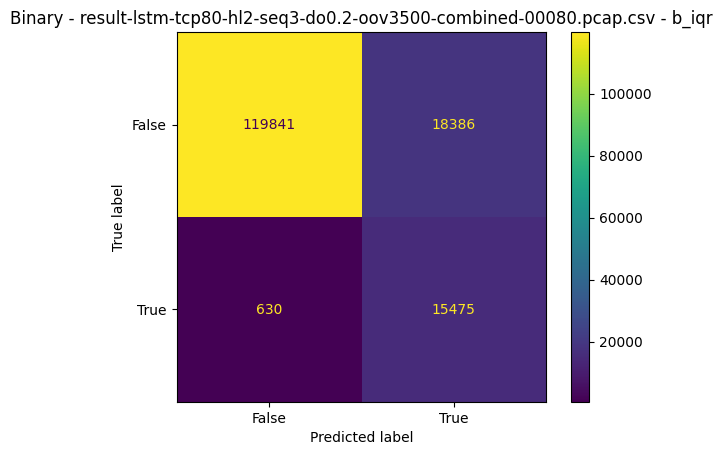

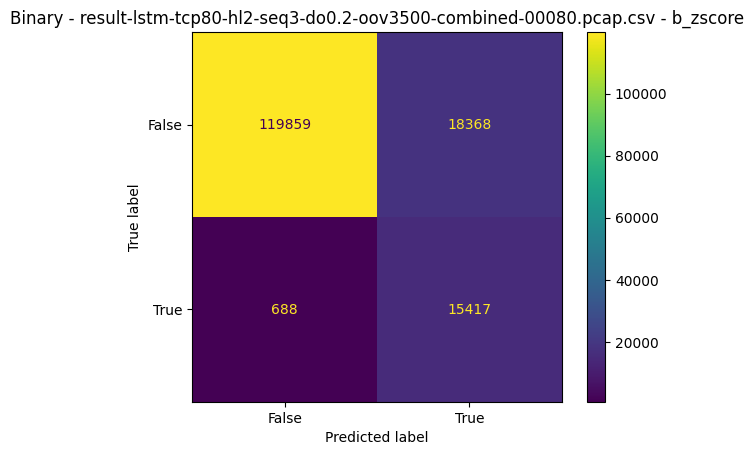

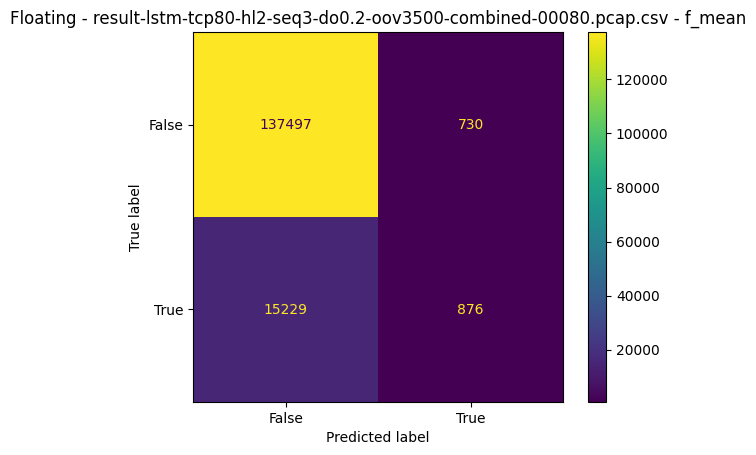

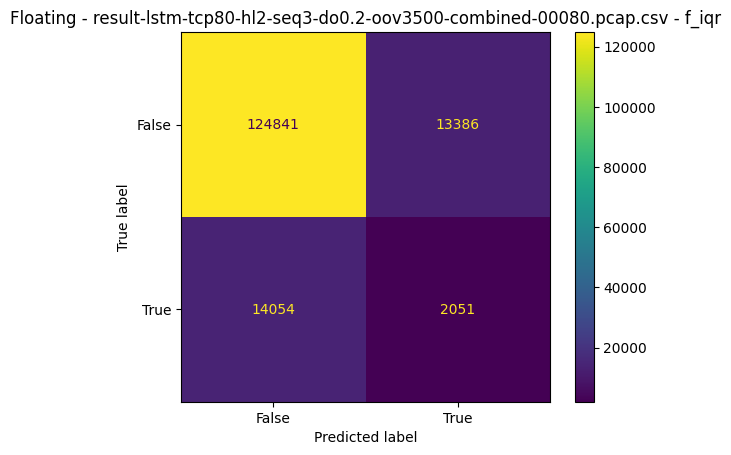

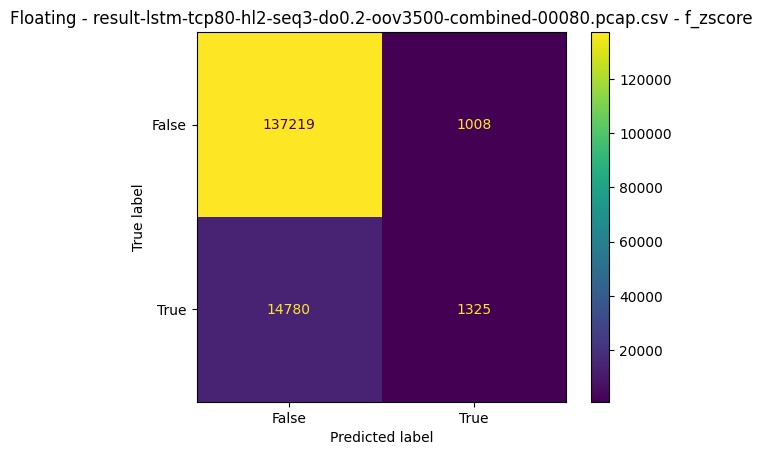

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


for key, val in df_preds.items():
    for method in methods:
        if method == 'binary':
            for i in threshold:
                conf_matrix = confusion_matrix(val['predicted'], val[i])
                cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
                cm_display.plot()
                plt.title(f'Binary - {key} - {i.strip()}')
                plt.show()
        else:
            for i in threshold_2:
                conf_matrix = confusion_matrix(val['predicted'], val[i])
                cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
                cm_display.plot()
                plt.title(f'Floating - {key} - {i.strip()}')
                plt.show()


### F2-Score

In [21]:
for key, val in df_preds.items():
    score[key]['F2 Score'] = dict()
    for method in methods:
        if method == 'binary':
            for i in threshold:
                tn, fp, fn, tp = confusion_matrix(val['predicted'], val[i]).ravel()
                f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
                score[key]['F2 Score'][i] = f2
                print(f'F2-Binary-{i}: {f2}')
        else:
            for i in threshold_2:
                tn, fp, fn, tp = confusion_matrix(val['predicted'], val[i]).ravel()
                f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
                score[key]['F2 Score'][i] = f2
                print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.7389052980214293
F2-Binary-b_iqr: 0.7824907999225257
F2-Binary-b_zscore: 0.8826846147454388
F2-Floating-f_mean: 0.06364581293403432
F2-Floating-f_iqr: 0.2685555117888695
F2-Floating-f_zscore: 0.19716556406433214
F2-Binary-b_mean: 0.8126492949036631
F2-Binary-b_iqr: 0.0668252693467489
F2-Binary-b_zscore: 0.36811092012873026
F2-Floating-f_mean: 0.030649993885288003
F2-Floating-f_iqr: 0.0029463302681160546
F2-Floating-f_zscore: 0.3824316170077304
F2-Binary-b_mean: 0.8425918124149885
F2-Binary-b_iqr: 0.786512941925472
F2-Binary-b_zscore: 0.8004282126240375
F2-Floating-f_mean: 0.3592701077740249
F2-Floating-f_iqr: 0.7751350716466996
F2-Floating-f_zscore: 0.7426721158393869
F2-Binary-b_mean: 0.7956788382912731
F2-Binary-b_iqr: 0.7612169608224348
F2-Binary-b_zscore: 0.7605061516750173
F2-Floating-f_mean: 0.06779583637691745
F2-Floating-f_iqr: 0.8039052762775238
F2-Floating-f_zscore: 0.8006842453051393
F2-Binary-b_mean: 0.8317954285025029
F2-Binary-b_iqr: 0.8102666807209866

### FPR Score

In [22]:
for key, val in df_preds.items():
    score[key]['FPR Score'] = dict()
    for method in methods:
        if method == 'binary':
            for i in threshold:
                tn, fp, fn, tp = confusion_matrix(val[i], val['predicted']).ravel()
                fpr = fp/(fp+tn)
                score[key]['FPR Score'][i] = fpr
                print(f'FPR-Binary-{i}: {fpr}')
        else:
            for i in threshold_2:
                tn, fp, fn, tp = confusion_matrix(val[i], val['predicted']).ravel()
                fpr = fp/(fp+tn)
                score[key]['FPR Score'][i] = fpr
                print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.030086697863387385
FPR-Binary-b_iqr: 0.00624093489702043
FPR-Binary-b_zscore: 0.009166672862038972
FPR-Floating-f_mean: 0.10015160564156751
FPR-Floating-f_iqr: 0.08320692363951566
FPR-Floating-f_zscore: 0.08940156207198359
FPR-Binary-b_mean: 0.019819343855709895
FPR-Binary-b_iqr: 0.09965370289148266
FPR-Binary-b_zscore: nan
FPR-Floating-f_mean: 0.1024156101633015
FPR-Floating-f_iqr: 0.10415194632612712
FPR-Floating-f_zscore: 0.0008451044307618013
FPR-Binary-b_mean: 0.015515017505067256
FPR-Binary-b_iqr: 0.002469845888383266
FPR-Binary-b_zscore: 0.0045475477780336174
FPR-Floating-f_mean: 0.07447811721924844
FPR-Floating-f_iqr: 0.021749543454180762
FPR-Floating-f_zscore: 0.028299325717388274
FPR-Binary-b_mean: 0.019156514711604657
FPR-Binary-b_iqr: 0.00045892206267816323


/var/folders/gk/9tqpj6f142gb1f8tmc0trqyh0000gn/T/ipykernel_79110/337298463.py:7: RuntimeWarning: invalid value encountered in long_scalars
  fpr = fp/(fp+tn)


FPR-Binary-b_zscore: 0.0004064645536400668
FPR-Floating-f_mean: 0.09941191845269211
FPR-Floating-f_iqr: 0.008103844521496808
FPR-Floating-f_zscore: 0.008645117909802604
FPR-Binary-b_mean: 0.01702650776240918
FPR-Binary-b_iqr: 0.005900776545422257
FPR-Binary-b_zscore: 0.009359297490809266
FPR-Floating-f_mean: 0.10077043213466552
FPR-Floating-f_iqr: 0.09831685638137251
FPR-Floating-f_zscore: 0.10238607471151966
FPR-Binary-b_mean: 0.01540321926545299
FPR-Binary-b_iqr: 0.004800756181284513
FPR-Binary-b_zscore: 0.007462504770643692
FPR-Floating-f_mean: 0.09343674158488974
FPR-Floating-f_iqr: 0.060972126430775875
FPR-Floating-f_zscore: 0.07122993040714559
FPR-Binary-b_mean: 0.029515629768496317
FPR-Binary-b_iqr: 0.0032691609153650564
FPR-Binary-b_zscore: 0.0038614123247818037
FPR-Floating-f_mean: 0.08058967716776691
FPR-Floating-f_iqr: 0.0032310177705977385
FPR-Floating-f_zscore: 0.0034873430476574344
FPR-Binary-b_mean: 0.04489682296090622
FPR-Binary-b_iqr: 0.00277334082252374
FPR-Binary-b_z

In [23]:
df_scores = dict()
for key, val in df_preds.items():
    df_scores[key] = pd.DataFrame.from_dict(score[key])
    print(df_scores[key])

          Detection Rate  F2 Score  FPR Score
b_mean          0.742502  0.738905   0.030087
b_iqr           0.953244  0.782491   0.006241
b_zscore        0.923440  0.882685   0.009167
f_mean          0.052468  0.063646   0.100152
f_iqr           0.237069  0.268556   0.083207
f_zscore        0.169140  0.197166   0.089402
          Detection Rate  F2 Score  FPR Score
b_mean          0.832288  0.812649   0.019819
b_iqr           0.054766  0.066825   0.099654
b_zscore        1.000000  0.368111        NaN
f_mean          0.024899  0.030650   0.102416
f_iqr           0.002360  0.002946   0.104152
f_zscore        0.999565  0.382432   0.000845
          Detection Rate  F2 Score  FPR Score
b_mean          0.869295  0.842592   0.015515
b_iqr           0.981869  0.786513   0.002470
b_zscore        0.965663  0.800428   0.004548
f_mean          0.318348  0.359270   0.074478
f_iqr           0.819559  0.775135   0.021750
f_zscore        0.760509  0.742672   0.028299
          Detection Rate  F2 Score

In [24]:
with pd.ExcelWriter("Hasil Eksperimen-3.xlsx") as writer:
    for key, val in df_scores.items():
        seq = key.split('-')[4]
        oov = key.split('-')[6]
        val.to_excel(writer, sheet_name=f'{seq}-{oov}', index=False)